# Project 2 - Ames Housing Price Prediction Challenge

## Problem Statement 

With house prices in Ames, Iowa <a href='https://datausa.io/profile/geo/ames-ia/#housing'>trending 7-9% upwards year-over-year</a>, there is a huge opportunity for both homeowners and investors participate in the booming real estate market. 

By thoroughly examining the Ames Housing Dataset to identify key housing features, including the exterior facade, housing characteristics as well as the surroundings of the houses, we determine which have of these the greatest impact on sale prices. We seek to develop a and iteratively refine a regression model that will accurately predict future housing prices and will share our business insights with future investors and homeowners to help them secure the best deals.

## Executive Summary


This project explores the <a href='https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview'>Ames Housing Dataset challenge launched on Kaggle</a> with the purpose of constructing a powerful regression model to accurately predict housing prices in the future. 

The data set contained information about 79 features for over 2000 homes sold in Ames, Iowa over the 2006-2010 period. Through a combination of extensive data cleaning and exploratory data analysis, we identified and interpeted missing values, before making use of heatmaps, histograms, scatter plots, bar plots and boxplots to obtain a complete statistical picture of the training data set. From this, we were able to identify several important features which had strong correlations to the sale price. 

To further fine-tune the data, feature engineering was also performed as there were many overlapping and correlated features which provided similar information to one another, and thus they were either re-factored or removed to prevent multicollinearity from affecting our prediction models. Some features were configured to be more interpretable and one-hot encoding was performed on categorical data to be compatible for our machine learning models. 

The given training set was partitioned into a smaller training set and a validation set to allow for model assessment before performance evaluation on the test set. 3 regression models were selected for this purpose - the linear, ridge and lasso regression models. These models were assessed based on the root-mean-squared error estimates using a 10-fold cross validation method. The ridge regression model marginally overperformed the linear and lasso regression models, with a root-mean-squared-error of 27972. 

The top features predicting sale prices were: combined house quality, combined area and the neighborhood of Stonebrook. Features expected to be among influencers were the house age and the years since the house was remodelled / added on to. However, we noted that perhaps the overall quality of the house was a bigger factor than the age of the house. 

We do recommend homeowners and investors pay close attention to the above features, as well as having awareness of external economic conditions, such as the 2007-2008 housing market crash. Those were extenuating circumstances that caused a capitulation in housing prices over the period when the data was collected. Thus it is equally important to be wary of external economic conditions and recessions which are massive influence in housing prices.

### Contents:
- [1. Import libraries and data](#1.-Import-libraries-and-data)
- [2. Data Cleaning](#2.-Data-Cleaning)
- [3. EDA & Feature Engineering](#3.-EDA-&-Feature-Engineering)
- [4. Preprocessing](#4.-Preprocessing)
- [5. Modelling](#5.-Modelling)
- [6. Test Set Data Cleaning](#6.-Test-Set-Data-Cleaning)
- [7. Preprocessing Test Set Data](#7.-Preprocessing-Test-Set-Data)
- [8. Predicting Target SalePrice & Kaggle Submission](#8.-Predicting-Target-SalePrice-&-Kaggle-Submission)
- [9. Conclusion and Recommendations](#9.-Conclusion-&-Recommendations)
- [10. Interpretations & Reflections on Kaggle Results](#10.-Interpretations-&-Reflections-on-Kaggle-Results)

## 1. Import libraries and data 

In [1]:
#Import statements
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import (train_test_split, cross_val_score, KFold)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/train.csv")
pd.pandas.set_option('display.max_columns', None)
df.head(5)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [3]:
df.shape

(2051, 81)

In [4]:
#Shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## 2. Data Cleaning
Here we will explore the data to identify the following: 
1. Missing Values 
2. Numerical variables
3. Categorical variables

### 2.1 Check for missing values / wrong data types

In [5]:
print(df.isna().values.any())
print(df.isna().values.mean())

True
0.059122018166386764


In [6]:
# Get features with nan values 
# Make list of features which have missing values 
features_with_na = [feature for feature in df.columns if df[feature].isna().values.sum() > 0]

# Find proportion of missing values in each feature
for feature in features_with_na: 
    percentage_missing = round(df[feature].isnull().mean()*100, 2)
    print(f"{feature}, {percentage_missing}% -> proportion of values missing")
    

Lot Frontage, 16.09% -> proportion of values missing
Alley, 93.17% -> proportion of values missing
Mas Vnr Type, 1.07% -> proportion of values missing
Mas Vnr Area, 1.07% -> proportion of values missing
Bsmt Qual, 2.68% -> proportion of values missing
Bsmt Cond, 2.68% -> proportion of values missing
Bsmt Exposure, 2.83% -> proportion of values missing
BsmtFin Type 1, 2.68% -> proportion of values missing
BsmtFin SF 1, 0.05% -> proportion of values missing
BsmtFin Type 2, 2.73% -> proportion of values missing
BsmtFin SF 2, 0.05% -> proportion of values missing
Bsmt Unf SF, 0.05% -> proportion of values missing
Total Bsmt SF, 0.05% -> proportion of values missing
Bsmt Full Bath, 0.1% -> proportion of values missing
Bsmt Half Bath, 0.1% -> proportion of values missing
Fireplace Qu, 48.76% -> proportion of values missing
Garage Type, 5.51% -> proportion of values missing
Garage Yr Blt, 5.56% -> proportion of values missing
Garage Finish, 5.56% -> proportion of values missing
Garage Cars, 0

Since a significant number of variables are missing (5.9%), we need to determine the relationship between these missing values and SalesPrice. 

We note that for the columns 'alley', 'fireplace', 'pool QC', 'fence' and 'misc feature', there is a significant proportion of NaN values. This does not mean that these values are missing, and we need to take a closer look to understand that they values represent. 

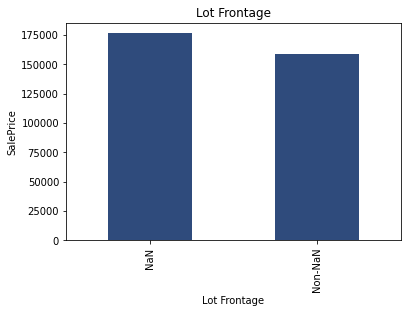

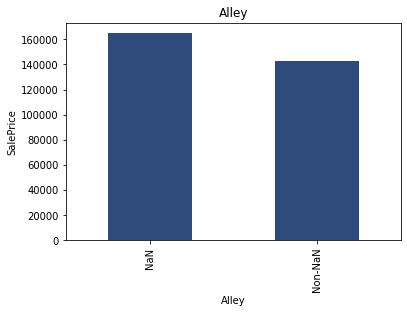

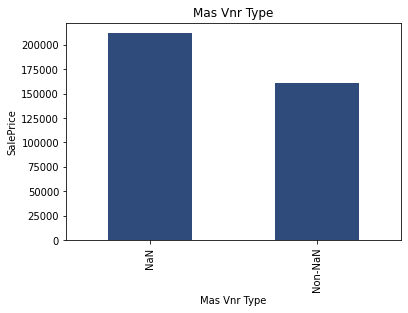

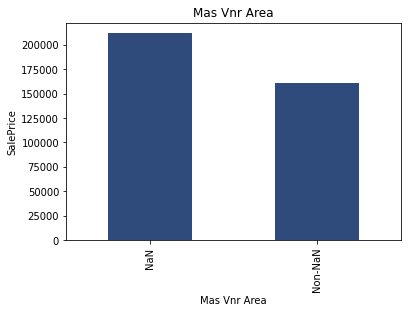

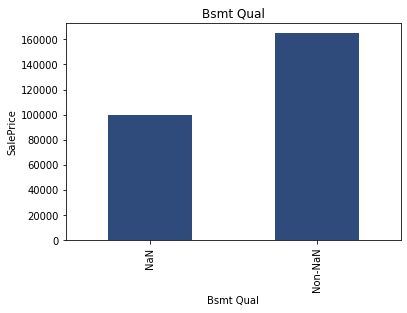

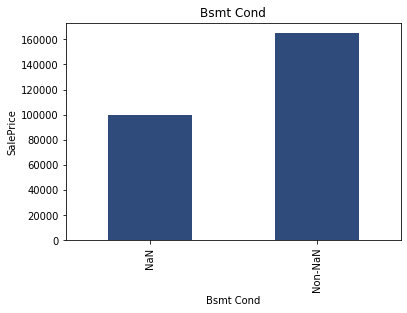

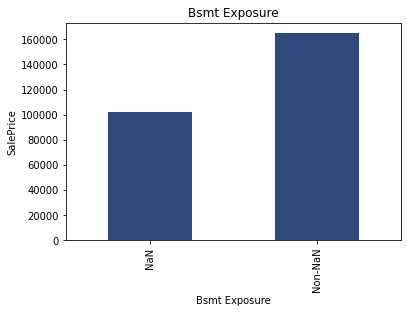

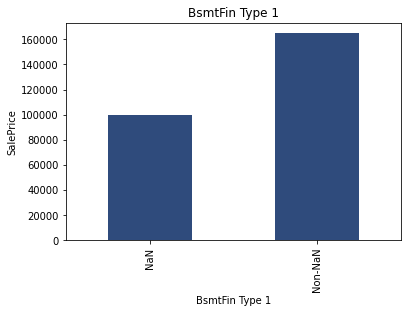

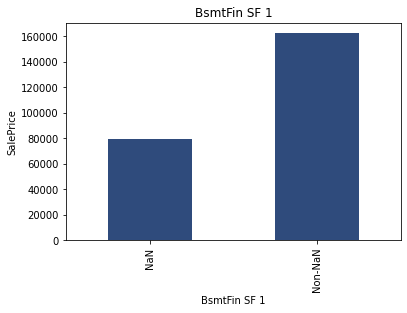

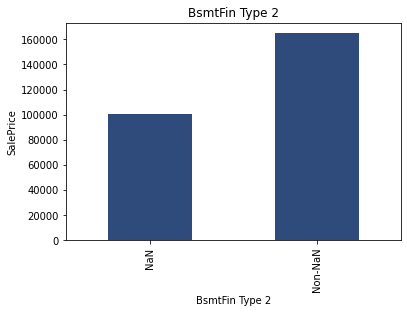

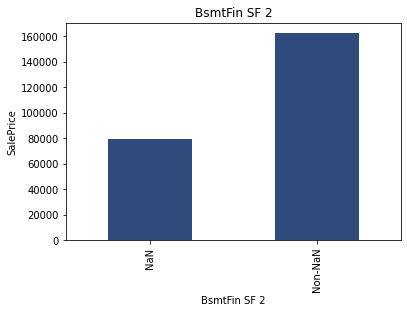

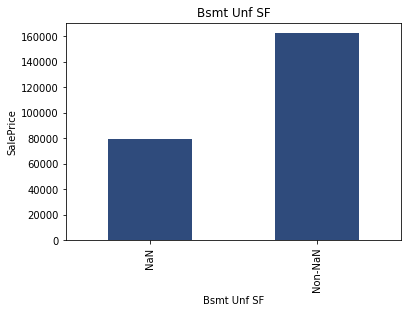

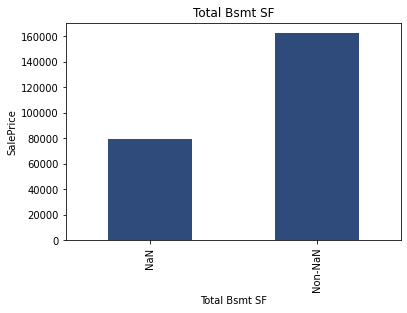

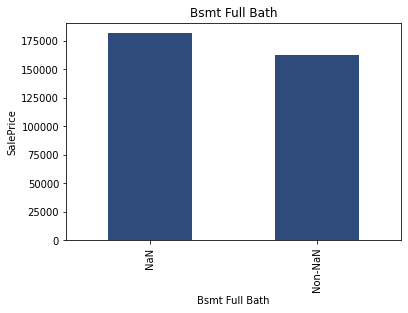

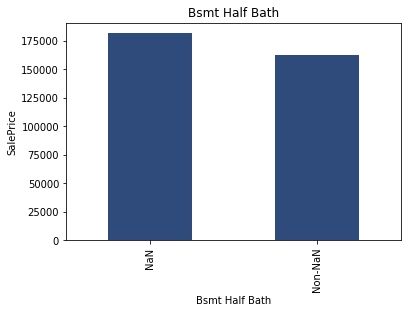

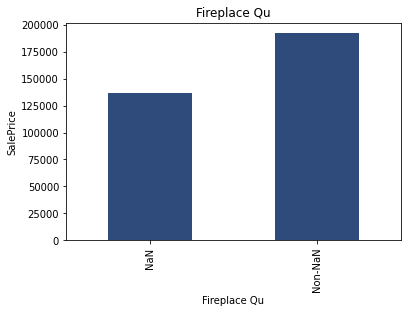

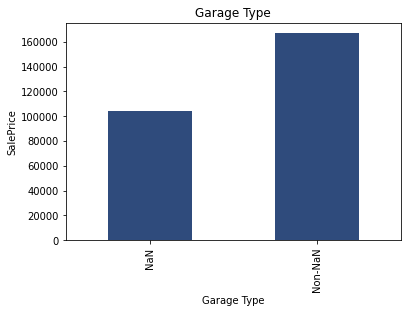

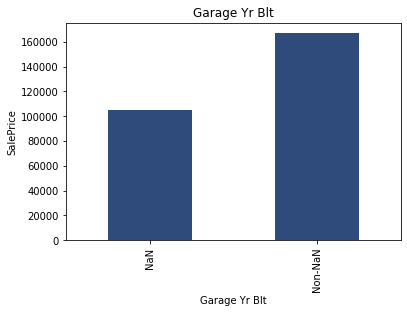

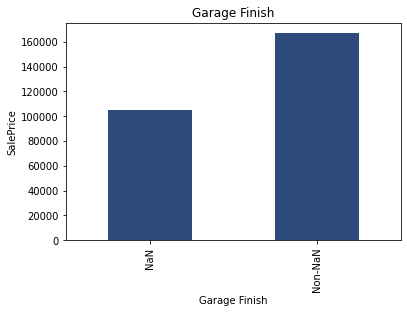

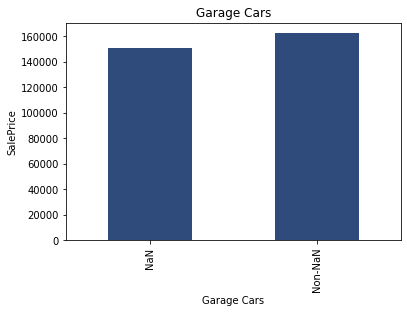

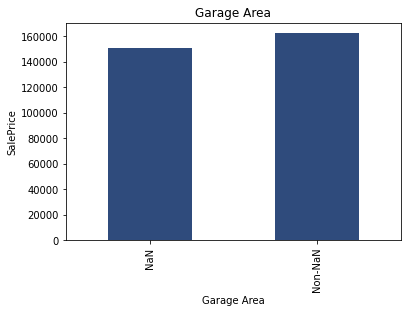

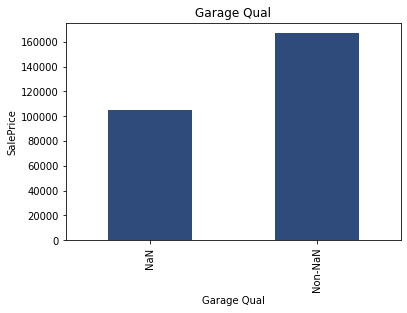

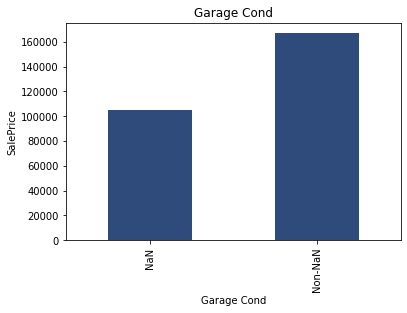

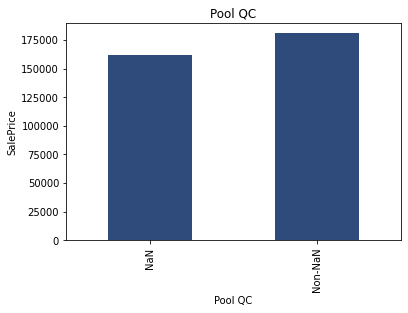

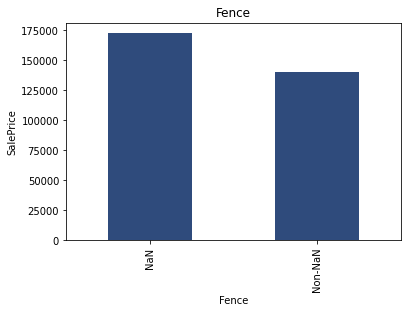

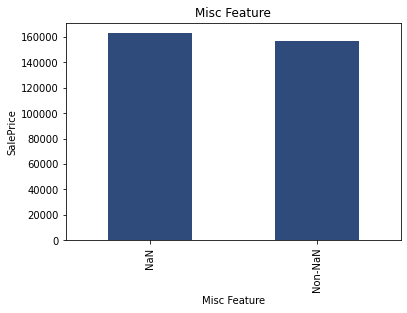

In [7]:
for feature in features_with_na: 
    df_with_na = df.copy()
    df_with_na[feature] = np.where(df_with_na[feature].isnull(), "NaN", "Non-NaN") # replaces NaN values with 0 and non-NaN values with 1
    
    # Calculate mean SalePrice for both NaN and non-Nan values
    df_with_na.groupby(feature)['SalePrice'].median().plot.bar(color='#2f4b7c')
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

From the above plots, there is clearly visible relation between the NaN values and the sale price. For instance, in the columns of Lot Frontage, Alley, MasVnrType, MasVnrArea, those with missing values tended to have a higher sale price. In contrast, there were also columns where NaN values had a lower median sale price (eg. Total Bsmt SF). 

Thus, these columns cannot be dropped directly and we'll be making meaningful replacements in the feature engineering process. 

### 2.2 Numerical Variables

With the 3 data types (object, int, float) in the housing data set, we first split them up into numerical and non-numerical variables by considering only integer and floats data types. Numerical variables will be further sub-divided into continuous, discrete and temporal (year) variables 

In [8]:
# create list of numerical variables
numerical_variables = [feature for feature in df.columns if df[feature].dtypes != "O"]
print(f"No. of numerical variables = {len(numerical_variables)}")

No. of numerical variables = 39


In [9]:
# Missing numerical variables 
df[numerical_variables].isnull().sum().sort_values(ascending=False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Kitchen AbvGr        0
3Ssn Porch           0
Screen Porch         0
Enclosed Porch       0
Open Porch SF        0
Wood Deck SF         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
Fireplaces           0
TotRms AbvGrd        0
Id                   0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
PID                  0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Overall Qual         0
Lot Area             0
MS SubClass          0
SalePrice            0
dtype: int64

#### Observations: 

11 of the features here contain null variables and we need to explore the meaning behind them by looking through the data dictionary.

- Lot Frontage: Represents linear feet of street connected to property, NA most likely means there is no street connected to the property and should be replaced with 0
- Garage Yr Blt: Represents year garage was built, NA most likely means the house has no garage 
- Mas Vnr Area: Represents year garage was built, NA most likely means the house has no garage and should be replaced with 0
- Bsmt Half Bath: Represents basement half bathrooms, NA most likely means there is no basement and should be replaced with 0  
- Bsmt Full Bath: Represents basement full bathrooms, NA most likely means there is no basement and should be replaced with 0       
- BsmtFin SF 1: Represents year garage was built, NA most likely means the house has no garage and should be replaced with 0                 
- Garage Cars: Represents size of garage in car capacity, NA most likely means the house has no garage and should be replaced with 0      
- Garage Area: Represents size of garage in square feet, NA most likely means the house has no garage and should be replaced with 0       
- Total Bsmt SF: Represents total square feet of basement area, NA most likely means there is no basementand should be replaced with 0
- Bsmt Unf SF: Represents unfinished square feet of basement area, NA most likely means there is no basementand should be replaced with 0     
- BsmtFin SF 2: Represents type 2 finished square feet, NA most likely means there is no basementand should be replaced with 0


With this in mind, we'll replace all null values with 0 (with the exception of garage yr blt)

In [10]:
df[['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath', 'BsmtFin SF 1', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2']] = df[['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath', 'BsmtFin SF 1', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2']].fillna(0)

In [11]:
df[numerical_variables].isnull().sum().sort_values(ascending=False)

Id                 0
Wood Deck SF       0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Open Porch SF      0
Full Bath          0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
Half Bath          0
Bsmt Half Bath     0
PID                0
Mas Vnr Area       0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
BsmtFin SF 1       0
Bsmt Full Bath     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
SalePrice          0
dtype: int64

##### Temporal (time) variables

In [12]:
# Temporal variables - how do the changes in the years affect the housing price? 
# For this, we pick out the 4 "year" columns 
temporal_variables = [feature for feature in numerical_variables if "Yr" in feature or "Year" in feature]
temporal_variables

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

In [13]:
# Examine temporal variables
for feature in temporal_variables: 
    print(feature, df[feature].unique())

Year Built [1976 1996 1953 2006 1900 1966 2005 1959 1952 1969 1971 1880 1999 2007
 2004 1916 1963 1977 2009 1968 2000 1992 1955 1961 1965 1937 1895 1949
 1981 1929 1995 1958 1973 1994 1978 1954 1935 1941 1931 2003 1928 1970
 1951 1920 1930 1924 1927 1960 1925 1910 2008 1915 1997 1956 1979 1964
 2001 1972 1957 1939 1962 1947 1940 1932 1967 1993 1875 1912 2010 1987
 1918 1988 1922 1926 1984 1942 1890 2002 1975 1998 1936 1938 1985 1923
 1948 1950 1980 1991 1917 1986 1946 1885 1914 1896 1983 1921 1945 1901
 1990 1974 1913 1905 1982 1919 1872 1892 1934 1879 1893 1898 1911 1908
 1989]
Year Remod/Add [2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977
 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954
 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957
 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989
 1991 1986 1982 1983 1974]
Garage Yr Blt [1976. 1997. 1953. 2007. 1957. 1966. 2005. 1959. 1952. 1969. 1971. 1900.
 

In [14]:
df[temporal_variables].describe()

Year Built  Year Remod/Add  Garage Yr Blt      Yr Sold
count  2051.000000     2051.000000    2051.000000  2051.000000
mean   1971.708922     1984.190151    1868.725987  2007.775719
std      30.177889       21.036250     454.133654     1.312014
min    1872.000000     1950.000000       0.000000  2006.000000
25%    1953.500000     1964.500000    1957.000000  2007.000000
50%    1974.000000     1993.000000    1978.000000  2008.000000
75%    2001.000000     2004.000000    2001.000000  2009.000000
max    2010.000000     2010.000000    2207.000000  2010.000000

In [15]:
# We note an error where the garage year built was incorrectly labelled as 2207
print(df[df["Garage Yr Blt"] > 2010]["Garage Yr Blt"])
print(df.iloc[1699][temporal_variables])

1699    2207.0
Name: Garage Yr Blt, dtype: float64
Year Built          2006
Year Remod/Add      2007
Garage Yr Blt     2207.0
Yr Sold             2007
Name: 1699, dtype: object


In [16]:
# Since the house was built in 2006, we can safely assume that the "Garage Yr Blt" should be 2007 instead. 
df.loc[1699, 'Garage Yr Blt'] = 2007
df.iloc[1699]['Garage Yr Blt']

2007.0

In [17]:
# Need to fill the 114 rows where the garage year built was filled with 0 earlier. 
df[df['Garage Yr Blt'] == 0]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
28    2243  911103060          190   C (all)          75.0      8250   Pave   
53     330  923226250          160        RM          21.0      1476   Pave   
65    2278  923202134           20        RL          70.0      8402   Pave   
79    2235  910201050           50        RM          50.0      7288   Pave   
101   2084  905476170           30        RL          58.0      9098   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
1991   325  923204150           90        RL          94.0      9400   Pave   
2010  2880  911175410           30   C (all)          69.0     12366   Pave   
2027  2628  535456010           90        RL          75.0      8512   Pave   
2039  2288  923228220          160        RM          21.0      1495   Pave   
2042  2842  909101080           50        RL          45.0      8248   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
28     NaN       Reg          Lvl    AllPub     Inside        Gtl   
53     NaN       Reg          Lvl    AllPub     Inside        Gtl   
65     NaN       Reg          Lvl    AllPub     Inside        Gtl   
79     NaN       Reg          Lvl    AllPub     Inside        Gtl   
101    NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
1991   NaN       Reg          Low    AllPub     Corner        Gtl   
2010   NaN       Reg          Lvl    AllPub     Inside        Gtl   
2027   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2039   NaN       Reg          Lvl    AllPub     Inside        Gtl   
2042  Grvl       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
28         IDOTRR       Feedr        Norm    2fmCon      2Story             5   
53        MeadowV        Norm        Norm     Twnhs      2Story             4   
65        Mitchel       Feedr        Norm      1Fam      1Story             5   
79         IDOTRR      Artery        Norm      1Fam      1.5Fin             5   
101       Edwards        Norm        Norm      1Fam      1Story             4   
...           ...         ...         ...       ...         ...           ...   
1991      Mitchel        Norm        Norm    Duplex      2Story             6   
2010       IDOTRR       Feedr        Norm      1Fam      1Story             3   
2027        NAmes        Norm        Norm    Duplex      1Story             5   
2039      MeadowV        Norm        Norm    TwnhsE      2Story             4   
2042      Edwards        Norm        Norm      1Fam      1.5Fin             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
28               6        1895            2006      Gable   CompShg   
53               7        1970            1970      Gable   CompShg   
65               5        2007            2007      Gable   CompShg   
79               7        1925            2003      Gable   CompShg   
101              7        1920            2002      Gable   CompShg   
...            ...         ...             ...        ...       ...   
1991             5        1971            1971    Mansard   CompShg   
2010             5        1945            1950      Gable   CompShg   
2027             5        1960            1960        Hip   CompShg   
2039             6        1970            1970      Gable   CompShg   
2042             4        1922            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
28        VinylSd      VinylSd         None           0.0         TA   
53        CemntBd      CmentBd         None           0.0         TA   
65        VinylSd      VinylSd         None           0.0         TA   
79        VinylSd      VinylSd         None           0.0         Gd   
101       Wd Sdng      Wd Sdng         None 

In [18]:
# Fill with year house was built 
for index in df[df['Garage Yr Blt'] == 0].index:
    year_built = df.loc[index, 'Year Built']
    df.loc[index, 'Garage Yr Blt'] = year_built

In [19]:
df['Garage Yr Blt'].describe()

count    2051.000000
mean     1976.610434
std        26.615416
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2002.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

##### Discrete Variables 

In [20]:
# Split numerical variables into continuous and discrete variables 
# We determine discrete variables by setting a threshold of having less than 30 unique values 

discrete_variables = [feature for feature in numerical_variables if df[feature].nunique() < 25 and feature not in temporal_variables+['Id']+['PID']]
print(f"No. of discrete variables = {len(discrete_variables)}")

No. of discrete variables = 15


##### Continuous Variables 
The last numerical variable we explore will be the continuous variables

In [21]:
continuous_variables = [feature for feature in numerical_variables if feature not in temporal_variables+discrete_variables+['Id']+['PID']]
continuous_variables

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Misc Val',
 'SalePrice']

### 2.3 Categorical Variables

In [22]:
categorical_variables = [feature for feature in df.columns if feature not in numerical_variables]
categorical_variables

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

#### Missing values in categorical variables

In [23]:
df[categorical_variables].isnull().sum().sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
BsmtFin Type 1      55
Bsmt Qual           55
Mas Vnr Type        22
Paved Drive          0
Functional           0
Kitchen Qual         0
Electrical           0
Central Air          0
Heating QC           0
Heating              0
MS Zoning            0
Street               0
Condition 2          0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Bldg Type            0
Foundation           0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Sale Type            0
dtype: int64

#### Observations
15 of the features here contain null variables and we need to explore the meaning behind them by looking through the data dictionary.  

- Pool QC: Represents pool quality, NA means no pool
- Misc Feature: Represents miscellaneous features, NA means none
- Alley: Represents type of alley access to property, NA means no alley access
- Fence: Represents fence quality, NA means no fence
- Fireplace quality: Represents fireplace quality, NA means no fireplace
- Garage Finish: Represents interior finish of garage, NA means no garage 
- Garage Cond: Represents garage condition, NA means no garage.
- Garage Qual: Represents garage quality, NA means no garage
- Garage Type: Represents garage location, NA means no garage
- Bsmt Exposure: Represents walkout or garden level basement walls, NA means no basement
- BsmtFin Type 2: Represents quality of second finished area (if present), NA means no basement
- Bsmt Cond: Represents condition of basement, NA means no basement
- BsmtFin Type 1: Represents quality of basement finished area, NA means no basement
- Bsmt Qual: Represents height  of basement, NA means no basement
- Mas Vnr Type: Represents Masonry veneer type, NA means none


The features Pool QC, Misc Feature, Alley, Fence, Fireplace Qu have more than 40% of their values missing and thus, we will be dropping these columns since the remaining data with non-NaN values will be a relatively small segment to build a model upon. 

As for the remaining columns dealing with the specifics of the garage, basement, and masonry veneer type, NaN values will be filled with '0'

In [24]:
# drop the features with a high over 40% missing values from our variables lists 
features_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
for feature in features_to_drop:
    if feature in categorical_variables:
        categorical_variables.remove(feature)
len(categorical_variables)

37

In [25]:
# Fill NaN with 0 
df[categorical_variables] = df[categorical_variables].fillna(0)

In [26]:
# We can further split categorical variables up into ordinal and norminal variables
df[categorical_variables].isnull().sum().sort_values(ascending=False)

MS Zoning         0
Foundation        0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Bsmt Qual         0
Exter Cond        0
Street            0
Exter Qual        0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Sale Type         0
dtype: int64

In [27]:
print(len(categorical_variables))

37


In [28]:
# We can further sub-divide categorical variables into nominal and ordinal variables 
nominal_variables = ['MS Zoning', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Street', 'Land Contour',
                      'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 
                     'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Sale Type']
len(nominal_variables)

19

In [29]:
ordinal_variables = []
for feature in categorical_variables:
    if feature not in nominal_variables:
        ordinal_variables.append(feature)
print(len(ordinal_variables))
ordinal_variables

18


['Lot Shape',
 'Utilities',
 'Land Slope',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

With ordinal variables, we assign values according to their descriptions
i.e external quality: Po, Fa, Ta, Gd, Ex -> convert to a scale of 1-5 

In [30]:
# Create dictionary of ordinal variables
ord_dict = {'Lot Shape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, 
            'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
            'Land Slope': {'Sev': 1, 'Mod': 2, 'Gtl': 3}, 
            'Exter Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Exter Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Bsmt Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Bsmt Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Bsmt Exposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
            'BsmtFin Type 1': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
            'BsmtFin Type 2': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
            'Heating QC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}, 
            'Kitchen Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
            'Garage Finish': {'Unf': 1, 'RFn': 2, 'Fin': 3},
            'Garage Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Garage Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Paved Drive': {'N': 1, 'P': 2, 'Y': 3}
}

In [31]:
# map to each ordinal variable in the dataframe
for feature in df[ordinal_variables]:
    df[feature] = df[feature].map(ord_dict[feature])

In [32]:
df[ordinal_variables].head()

Lot Shape  Utilities  Land Slope  Exter Qual  Exter Cond  Bsmt Qual  \
0          3          4           3           4           3        3.0   
1          3          4           3           4           3        4.0   
2          4          4           3           3           4        3.0   
3          4          4           3           3           3        4.0   
4          3          4           3           3           3        2.0   

   Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Heating QC  \
0        3.0            1.0             6.0             1.0           5   
1        3.0            1.0             6.0             1.0           5   
2        3.0            1.0             6.0             1.0           3   
3        3.0            1.0             1.0             1.0           4   
4        4.0            1.0             1.0             1.0           3   

   Electrical  Kitchen Qual  Functional  Garage Finish  Garage Qual  \
0           5             4           8            2.0          3.0   
1           5             4           8            2.0          3.0   
2           5             4           8            1.0          3.0   
3           5             3           8            3.0          3.0   
4           5             3           8            1.0          3.0   

   Garage Cond  Paved Drive  
0          3.0            3  
1          3.0            3  
2          3.0            3  
3          3.0            3  
4          3.0            1

In [33]:
df[ordinal_variables].dtypes

Lot Shape           int64
Utilities           int64
Land Slope          int64
Exter Qual          int64
Exter Cond          int64
Bsmt Qual         float64
Bsmt Cond         float64
Bsmt Exposure     float64
BsmtFin Type 1    float64
BsmtFin Type 2    float64
Heating QC          int64
Electrical          int64
Kitchen Qual        int64
Functional          int64
Garage Finish     float64
Garage Qual       float64
Garage Cond       float64
Paved Drive         int64
dtype: object

In [34]:
df[ordinal_variables] = df[ordinal_variables].fillna(0)

In [35]:
df[ordinal_variables].isnull().sum().sort_values(ascending=False)

Lot Shape         0
Utilities         0
Garage Cond       0
Garage Qual       0
Garage Finish     0
Functional        0
Kitchen Qual      0
Electrical        0
Heating QC        0
BsmtFin Type 2    0
BsmtFin Type 1    0
Bsmt Exposure     0
Bsmt Cond         0
Bsmt Qual         0
Exter Cond        0
Exter Qual        0
Land Slope        0
Paved Drive       0
dtype: int64

# 3. EDA & Feature Engineering

In this section, we'll continue our exploratory data analysis, identify the relevant features for our prediction model and prepare the data set to be compatible with our machine learning algorithm requirements. 

Through these explorations, we'll be able to identify glaring outliers and conduct a preliminary investigation of the relationship between the independent features and dependent variable (SalesPrice)

In [36]:
# Also identified a column "Mo Sold": Month Sold <-- we don't need this since all other temporal variables are in years
discrete_variables.remove("Mo Sold")
features_to_drop.append("Mo Sold")
features_to_drop


['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Mo Sold']

## Data Visualisation

Due to the huge number of features, we will explore and analyse each of the 3 categories individually.
- A) Numerical 
- B) Ordinal 
- C) Nominal 

#### A) Numerical Variables

With 38 numerical variables left to explore, we first begin by studying the correlation heatmap. 

In [37]:
df[numerical_variables].dtypes.value_counts()

int64      28
float64    11
dtype: int64

In [38]:
df[numerical_variables].corr()

Id       PID  MS SubClass  Lot Frontage  Lot Area  \
Id               1.000000  0.175793     0.026543     -0.013538  0.032872   
PID              0.175793  1.000000    -0.003632     -0.038402  0.024135   
MS SubClass      0.026543 -0.003632     1.000000     -0.216259 -0.245484   
Lot Frontage    -0.013538 -0.038402    -0.216259      1.000000  0.135586   
Lot Area         0.032872  0.024135    -0.245484      0.135586  1.000000   
Overall Qual    -0.061483 -0.265863     0.035763      0.114469  0.105824   
Overall Cond    -0.026096  0.106861    -0.070141     -0.032452 -0.019185   
Year Built      -0.064444 -0.347039     0.035983      0.020571  0.036002   
Year Remod/Add  -0.090040 -0.176666     0.044836      0.058942  0.050771   
Mas Vnr Area    -0.035808 -0.242482    -0.002763      0.101672  0.167520   
BsmtFin SF 1    -0.045794 -0.086951    -0.060425      0.056742  0.215648   
BsmtFin SF 2     0.000745 -0.013283    -0.068129      0.001322  0.041799   
Bsmt Unf SF      0.008649 -0.111835    -0.139292      0.147324  0.041544   
Total Bsmt SF   -0.038115 -0.204623    -0.224700      0.204375  0.277478   
1st Flr SF      -0.022650 -0.145862    -0.246212      0.230839  0.381593   
2nd Flr SF      -0.008388 -0.005598     0.305771     -0.014954  0.029398   
Low Qual Fin SF  0.011719  0.072268     0.031091      0.011487  0.001273   
Gr Liv Area     -0.023881 -0.112936     0.068210      0.171320  0.327427   
Bsmt Full Bath  -0.033323 -0.031341     0.025727      0.009850  0.113283   
Bsmt Half Bath   0.014396 -0.002195    -0.017030     -0.018886  0.029157   
Full Bath       -0.059086 -0.179370     0.142087      0.055042  0.125601   
Half Bath       -0.042054 -0.163975     0.179404     -0.031017  0.049995   
Bedroom AbvGr    0.010605  0.009122    -0.003516      0.097450  0.139060   
Kitchen AbvGr   -0.002400  0.068416     0.252111      0.015079 -0.013484   
TotRms AbvGrd   -0.009092 -0.084999     0.034490      0.185083  0.238724   
Fireplaces      -0.037560 -0.120710    -0.055118      0.038556  0.289467   
Garage Yr Blt   -0.054488 -0.291014     0.030316      0.024602  0.032323   
Garage Cars     -0.049616 -0.229187    -0.049426      0.118258  0.214839   
Garage Area     -0.046105 -0.201717    -0.108423      0.173790  0.263145   
Wood Deck SF    -0.009045 -0.041221     0.001622      0.011388  0.155623   
Open Porch SF    0.001382 -0.081129    -0.020289      0.095295  0.140864   
Enclosed Porch   0.033747  0.150179    -0.039842      0.009207  0.014139   
3Ssn Porch      -0.022791 -0.024679    -0.030088      0.008076  0.019553   
Screen Porch     0.009758 -0.042030    -0.038819      0.036598  0.067714   
Pool Area        0.055696  0.005825    -0.004585      0.092288  0.115102   
Misc Val        -0.012683  0.004223    -0.027485      0.026066  0.093922   
Mo Sold          0.127723 -0.032735     0.013027     -0.006382  0.003197   
Yr Sold         -0.975747  0.008476    -0.032870      0.007713 -0.029454   
SalePrice       -0.051398 -0.255052    -0.087335      0.181456  0.296566   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                  -0.061483     -0.026096   -0.064444       -0.090040   
PID                 -0.265863      0.106861   -0.347039       -0.176666   
MS SubClass          0.035763     -0.070141    0.035983        0.044836   
Lot Frontage         0.114469     -0.032452    0.020571        0.058942   
Lot Area             0.105824     -0.019185    0.036002        0.050771   
Overall Qual         1.000000     -0.082770    0.602964        0.584654   
Overall Cond        -0.082770      1.000000   -0.370988        0.042614   
Year Built           0.602964     -0.370988    1.000000        0.629116   
Year Remod/Add       0.584654      0.042614    0.629116        1.000000   
Mas Vnr Area         0.430041     -0.131908    0.320780        0.204234   
BsmtFin SF 1         0.279223     -0.046348    0.275728        0.167296   
BsmtFin SF 2        -0.027973      0.047605   -0.020906       -0.056894   
Bsmt Un

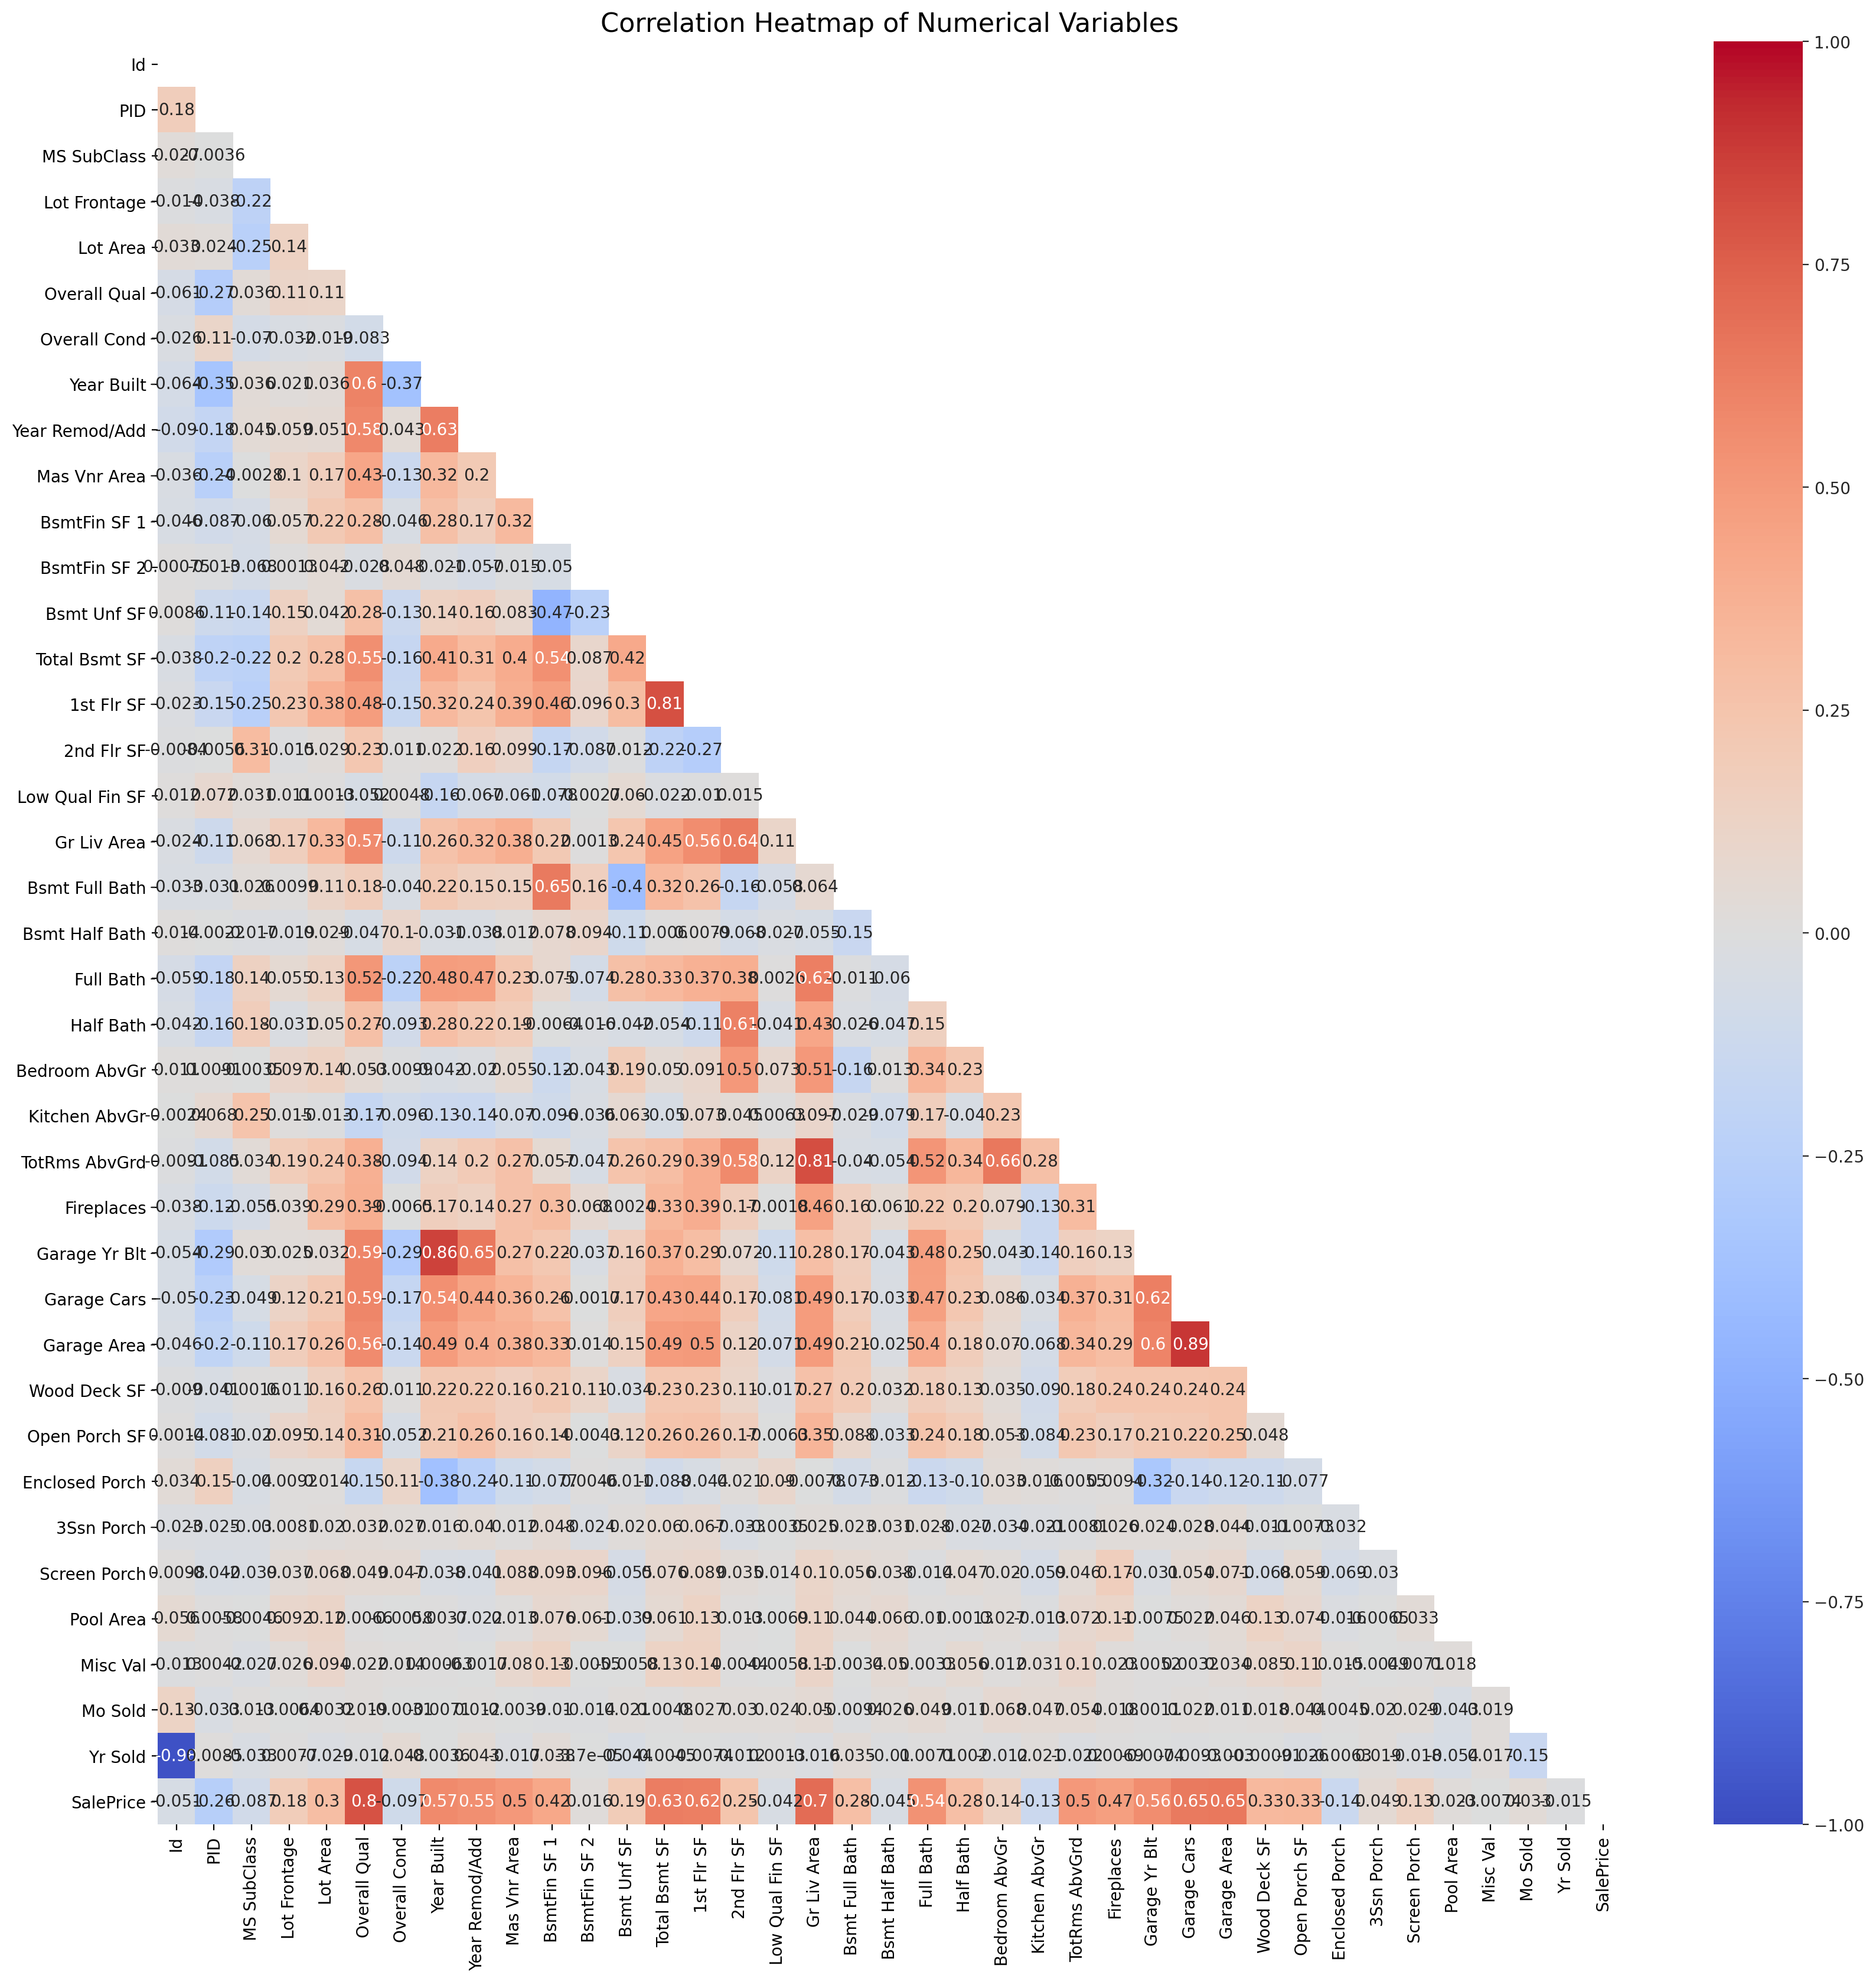

In [39]:
plt.figure(figsize=(20, 20), dpi=200)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)

matrix = np.triu(df[numerical_variables].corr())

with sns.axes_style("white"):
    sns.heatmap(df[numerical_variables].corr(), vmin=-1, vmax=1, center=0, linecolor='black', cmap="coolwarm", annot=True, mask=matrix)
    
plt.show()

#### Correlation Heatmap Observations: 

With the overwhelming number of variables, we narrow down our focus to the features which have the strongest correlations (i.e correlation coefficient 0.8 and above). The key observations are: 

- Sales Price vs Overall quality (0.8) 

We would expect this to be the case as it's only natural that higher overall material and finish quality have a strong positive correlation with the sales price of a home. 
 

- 1st floor area vs Total Bsmt SF (0.81) 
- TotsRms AbvGrd vs Gr Liv Area (0.81)
- Garage Area vs Garage Cars (0.89) 
- Garage year build vs Year built (0.84)

The above correlations do make sense as well, since basement areas of homes tend to follow the flooring of the first floor. The total number of rooms above grade would also likely increase as the above grade living area increases, and a bigger garage area would probably be able to fit more cars. Lastly, we would expect that most garages be built at the same time as the house. 

Although the above 4 variables have strong positive correlations, we should be wary of putting these in our prediction models as they provide similar information to each other which could result in multicollinearity. 


In [40]:
# Total built up area of house, including Gr Liv Area, Basement and garage area as these 
# have a correlation coefficient between 0.63 - 0.70
df['Combined Area'] = df['Gr Liv Area'] + df['Total Bsmt SF'] + df['Garage Area']
df['Combined Area'].describe()

count     2051.000000
mean      3030.242808
std        951.389832
min        334.000000
25%       2384.000000
50%       2917.000000
75%       3548.500000
max      13170.000000
Name: Combined Area, dtype: float64

In [41]:
df[['Combined Area', 'SalePrice']].corr()

Combined Area  SalePrice
Combined Area       1.000000   0.811892
SalePrice           0.811892   1.000000

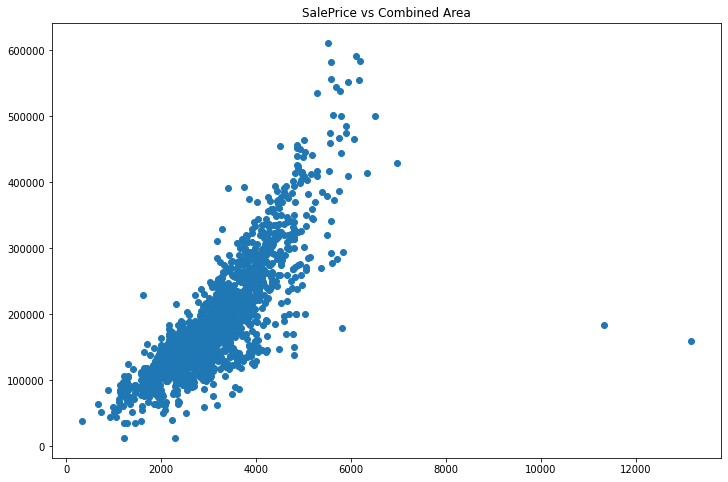

In [42]:
plt.figure(figsize=(12,8))
plt.title('SalePrice vs Combined Area')
plt.scatter(x='Combined Area', y='SalePrice', data=df)
plt.show()

In [43]:
# 2 glaring outliers spotted 
df[df["Combined Area"] > 10000]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     Alley  Lot Shape Land Contour  Utilities Lot Config  Land Slope  \
960    NaN          1          Bnk          4     Corner           3   
1885   NaN          3          Bnk          4     Inside           3   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1885      Edwards        Norm        Norm      1Fam      1Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CmentBd        Stone        1224.0           5   

      Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
960            3      PConc        5.0        3.0            4.0   
1885           3      PConc        5.0        3.0            4.0   

      BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
960              6.0        5644.0             1.0           0.0        466.0   
1885             6.0        4010.0             1.0           0.0       1085.0   

      Total Bsmt SF Heating  Heating QC Central Air  Electrical  1st Flr SF  \
960          6110.0    GasA           5           Y           5        4692   
1885         5095.0    GasA           5           Y           5        5095   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
960              0.0          2          1              3              1   
1885             1.0          2          1              2              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
960              5             12           8           3           Gd   
1885             5             15           8           2           Gd   

     Garage Type  Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  \
960       Attchd         2008.0            3.0          2.0       1418.0   
1885      Attchd         2008.0            3.0          3.0       1154.0   

      Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
960           3.0          3.0            3           214            292   
1885          3.0          3.0            3           546            484   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC Fence  \
960                0           0             0        480      Gd   NaN   
1885               0           0             0          0     NaN   NaN   

     Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  \
960           NaN         0        1     2008       New     160000   
1885         Elev     17000       10     2007       New     183850   

      Combined Area  
960         13170.0  
1885        11344.0

In [44]:
# Since these 2 outliers are statistically insignificant compared to the entire dataset (2 out of 2051 = 0.01%), 
# we can assume that they would not have a big impact on our model
df.drop(index=[960, 1885], inplace=True)

In [45]:
df[['Combined Area', 'SalePrice']].corr()

Combined Area  SalePrice
Combined Area       1.000000   0.853743
SalePrice           0.853743   1.000000

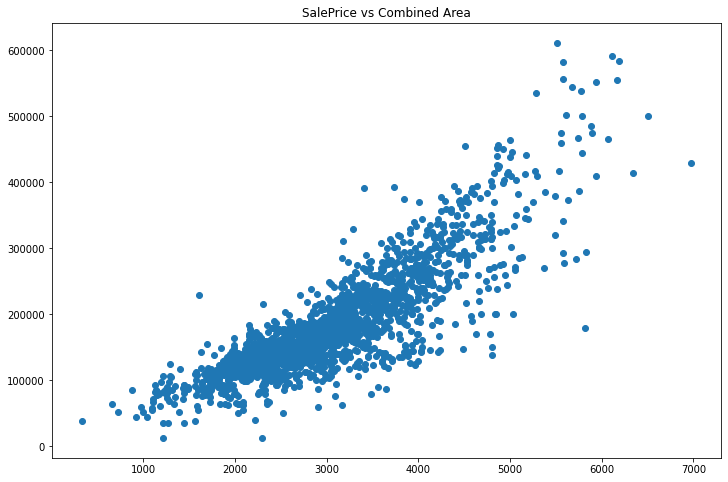

In [46]:
plt.figure(figsize=(12,8))
plt.title('SalePrice vs Combined Area')
plt.scatter(x='Combined Area', y='SalePrice', data=df)
plt.show()

Our correlation improves from 0.811 to 0.854, just by removing 2 outliers

In [47]:
removed_continuous_variables = ['Gr Liv Area', 'Total Bsmt SF' , 'Garage Area']

## Overview of Sale Price by Year 

2006 - 2010 was a period of both extreme euphoria and calamities for the US housing market. Let's explore how the median sale price was affected over that timeframe. 

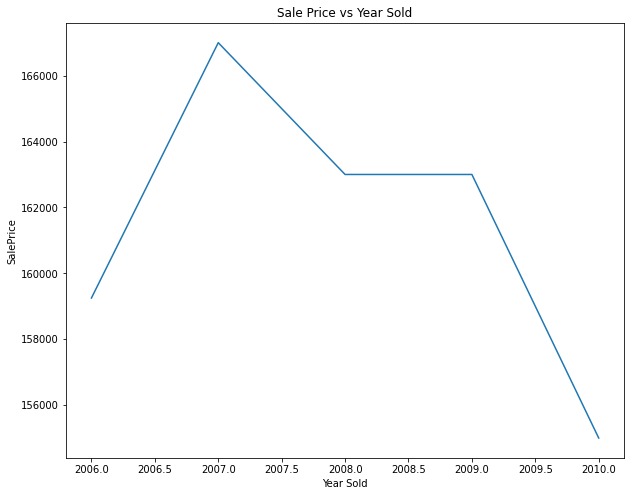

In [48]:
# Since homes were only sold from 2006 - 2010, we'll analyse the relationship between the year sold and the sale price
plt.figure(figsize=(10, 8))
df.groupby("Yr Sold")["SalePrice"].median().plot()
plt.ylabel("SalePrice")
plt.xlabel("Year Sold")
plt.title("Sale Price vs Year Sold")
plt.show()

We observe that the mean and median house prices peaked around 2006-2007 before making a sharp decline towards 2010, which is most likely a result of the United States housing bubble bursting during that period, resulting in significant drops in home prices. This is clearly a black swan event and as such, making inferences on the yearly charts would not be appropriate for this data set. 

### Scatter Plots (Temporal variables)

In [49]:
# Rename variables to make more sense 
renamed_temporal_variables = ['House Age', 'Garage Age', 'Years since Remod/Add']
df['House Age'] = df['Yr Sold'] - df['Year Built']
df['Garage Age'] = df['Yr Sold'] - df['Garage Yr Blt']
df['Years since Remod/Add']  = df['Yr Sold'] - df['Year Remod/Add']

In [50]:
renamed_temporal_variables.append('SalePrice')

In [51]:
removed_temporal_variables = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

In [52]:
df[renamed_temporal_variables].corr()

House Age  Garage Age  Years since Remod/Add  SalePrice
House Age               1.000000    0.857651               0.629442  -0.572441
Garage Age              0.857651    1.000000               0.650442  -0.556550
Years since Remod/Add   0.629442    0.650442               1.000000  -0.552226
SalePrice              -0.572441   -0.556550              -0.552226   1.000000

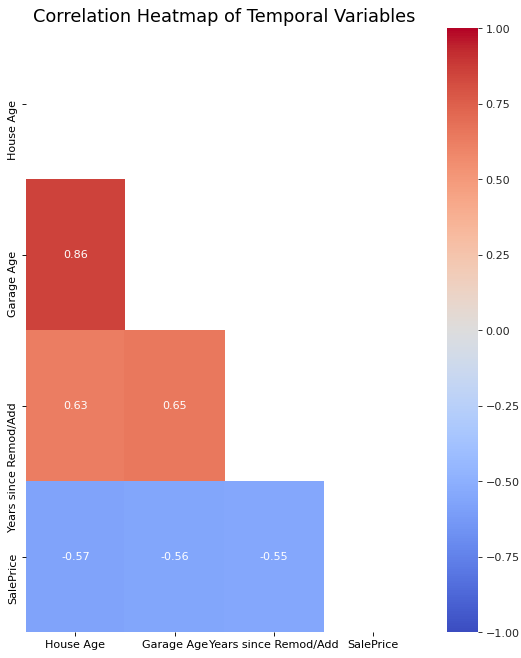

In [53]:
plt.figure(figsize=(8, 10), dpi=80)
plt.title("Correlation Heatmap of Temporal Variables", fontsize=16)

matrix = np.triu(df[renamed_temporal_variables].corr())

with sns.axes_style("white"):
    sns.heatmap(df[renamed_temporal_variables].corr(), vmin=-1, vmax=1, center=0, linecolor='black', cmap="coolwarm", annot=True, mask=matrix)
    
plt.show()

In [54]:
df['Garage Age'].describe()

count    2049.000000
mean       31.196193
std        26.651992
min         0.000000
25%         6.000000
50%        30.000000
75%        49.000000
max       136.000000
Name: Garage Age, dtype: float64

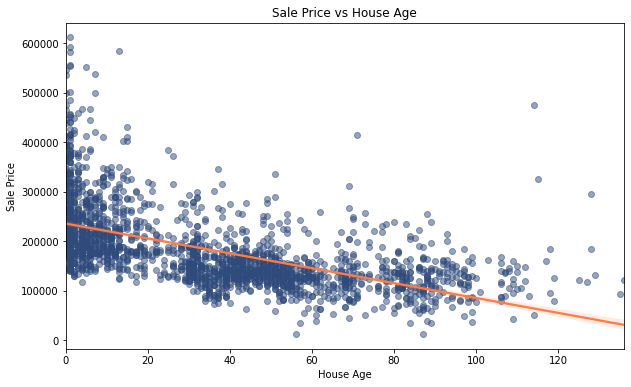

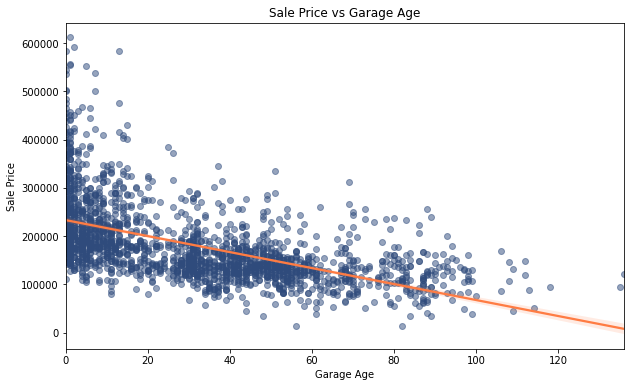

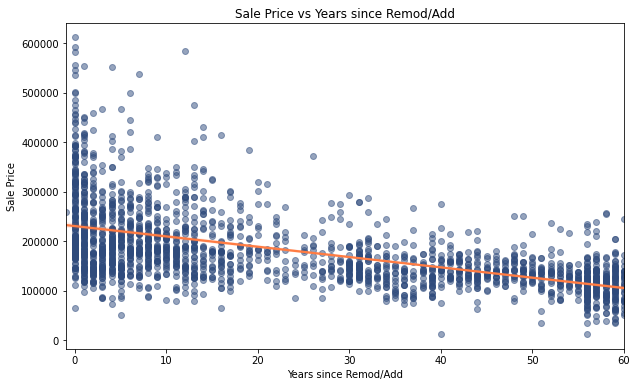

In [55]:
# compare the sale price of the house against the year features
for feature in renamed_temporal_variables: 
    if feature == "SalePrice":
        pass
    else:
        plt.figure(figsize=(10,6))
        sns.regplot(x=df[feature], y=df['SalePrice'], scatter_kws={'alpha': 0.5}, color ="#2f4b7c", line_kws={'color': '#ff7c43'})
        plt.ylabel('Sale Price')
        plt.xlabel(feature)

        plt.title(f"Sale Price vs {feature}")
        plt.show()

#### Observations & Intepretations: 

From the scatter plot, we do see correlations between the sale price and the years that have passed since the feature occuring (i.e lower sale prices for homes built a long time ago) 

We observe that sale prices tend to be higher for newer homes, homes which recently had remodelling or additions, and homes which recently had garages built. This appears logical as new homes or home upgrades would increase the value of a house. This mainly applies to timeframes within 10 years of the house being sold and the features compared against. 


### Continuous variables 

#### Correlation Heatmap (Top 10 Continuous Variables)

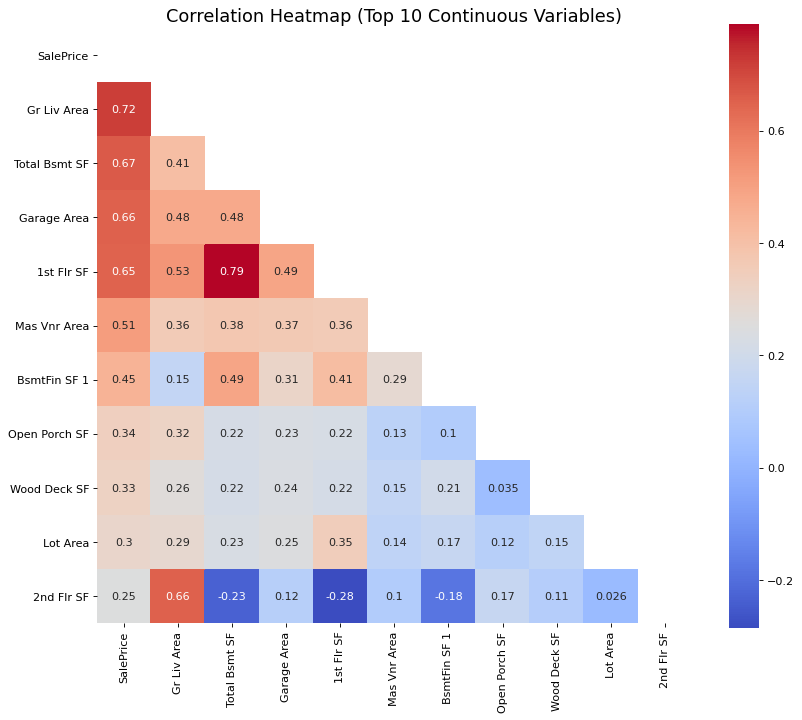

In [56]:
top_cont_features = abs(df[continuous_variables].corr()).nlargest(11, 'SalePrice').index   # extract the columns for the top 8
corrmat = df[top_cont_features].corr()
mask_matrix = np.triu(corrmat)

plt.figure(figsize=(12,10), dpi=80)
plt.title('Correlation Heatmap (Top 10 Continuous Variables)', fontsize=16)
sns.heatmap(corrmat, cmap='coolwarm', mask=mask_matrix, square=True, annot=True);

We take a closer look at the continuous variables by considering only the top 10 features. Having already observed the highest correlations in the earlier segment, we note other features with at least 0.5 correlation coefficient and identified 'Mas Vnr Area' as a suitable feature. 

#### Scatter Plots (Continuous variables)

In [57]:
def subplot_scatter(list_of_columns):
    fig   = plt.figure(figsize = (20, 80))  
    count = 0                                          
    for column in list_of_columns:
        count += 1                                     
        ax = fig.add_subplot(13, 3, count)
        plt.title(column, size = 18)
        plt.ylabel("Sale Price", size = 14)
        plt.xlabel(column, size = 14)
        plt.xticks(size = 12)
        sns.scatterplot(x = column, y = "SalePrice", data = df, sizes = (15,20))

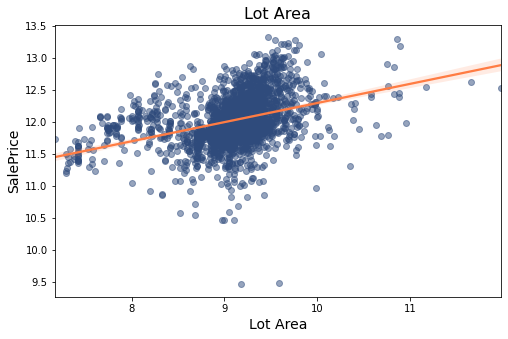

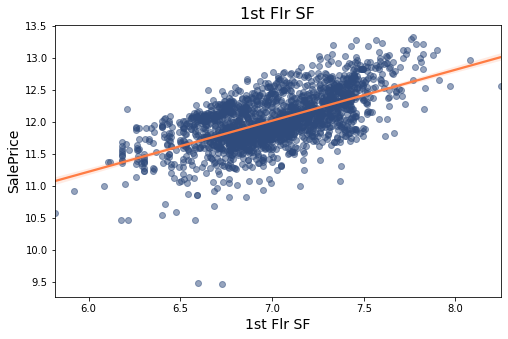

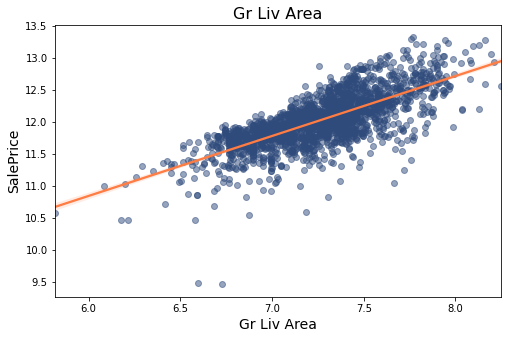

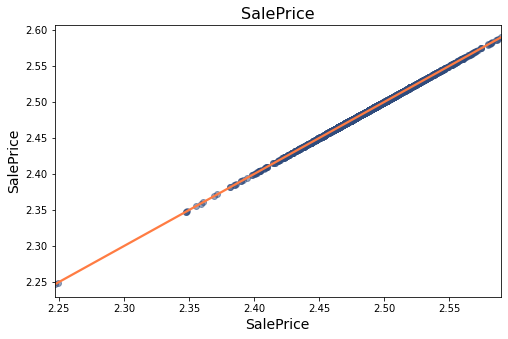

In [58]:
for i, col in enumerate(continuous_variables):
    df_cont = df.copy()
    if 0 in df_cont[col].unique():         # pass over columns with '0' counts   
        pass
    else:
        ax = plt.figure(figsize=(8,5))
        df_cont[col] = np.log(df_cont[col]+1)
        df_cont['SalePrice'] = np.log(df_cont['SalePrice'])
        sns.regplot(x=df_cont[col], y=df_cont['SalePrice'], scatter_kws={'alpha': 0.5}, color ="#2f4b7c", line_kws={'color': '#ff7c43'})
        plt.xlabel(xlabel=col, fontsize=14)
        plt.ylabel(ylabel= 'SalePrice' , fontsize=14)
        plt.title(col, fontsize=16)
        plt.show()


#### Scatter Plot Observations & Intepretations: 


With the features containing a significant number of '0' values removed, we observe that the scatter plots indicate a strong positive correlation between their respective feature and the sale price. This makes sense as these features refer to the lot size, the 1st floor area and above grade (ground square feet area) of the houses, and larger areas would naturally corresponding to a higher sale price. 

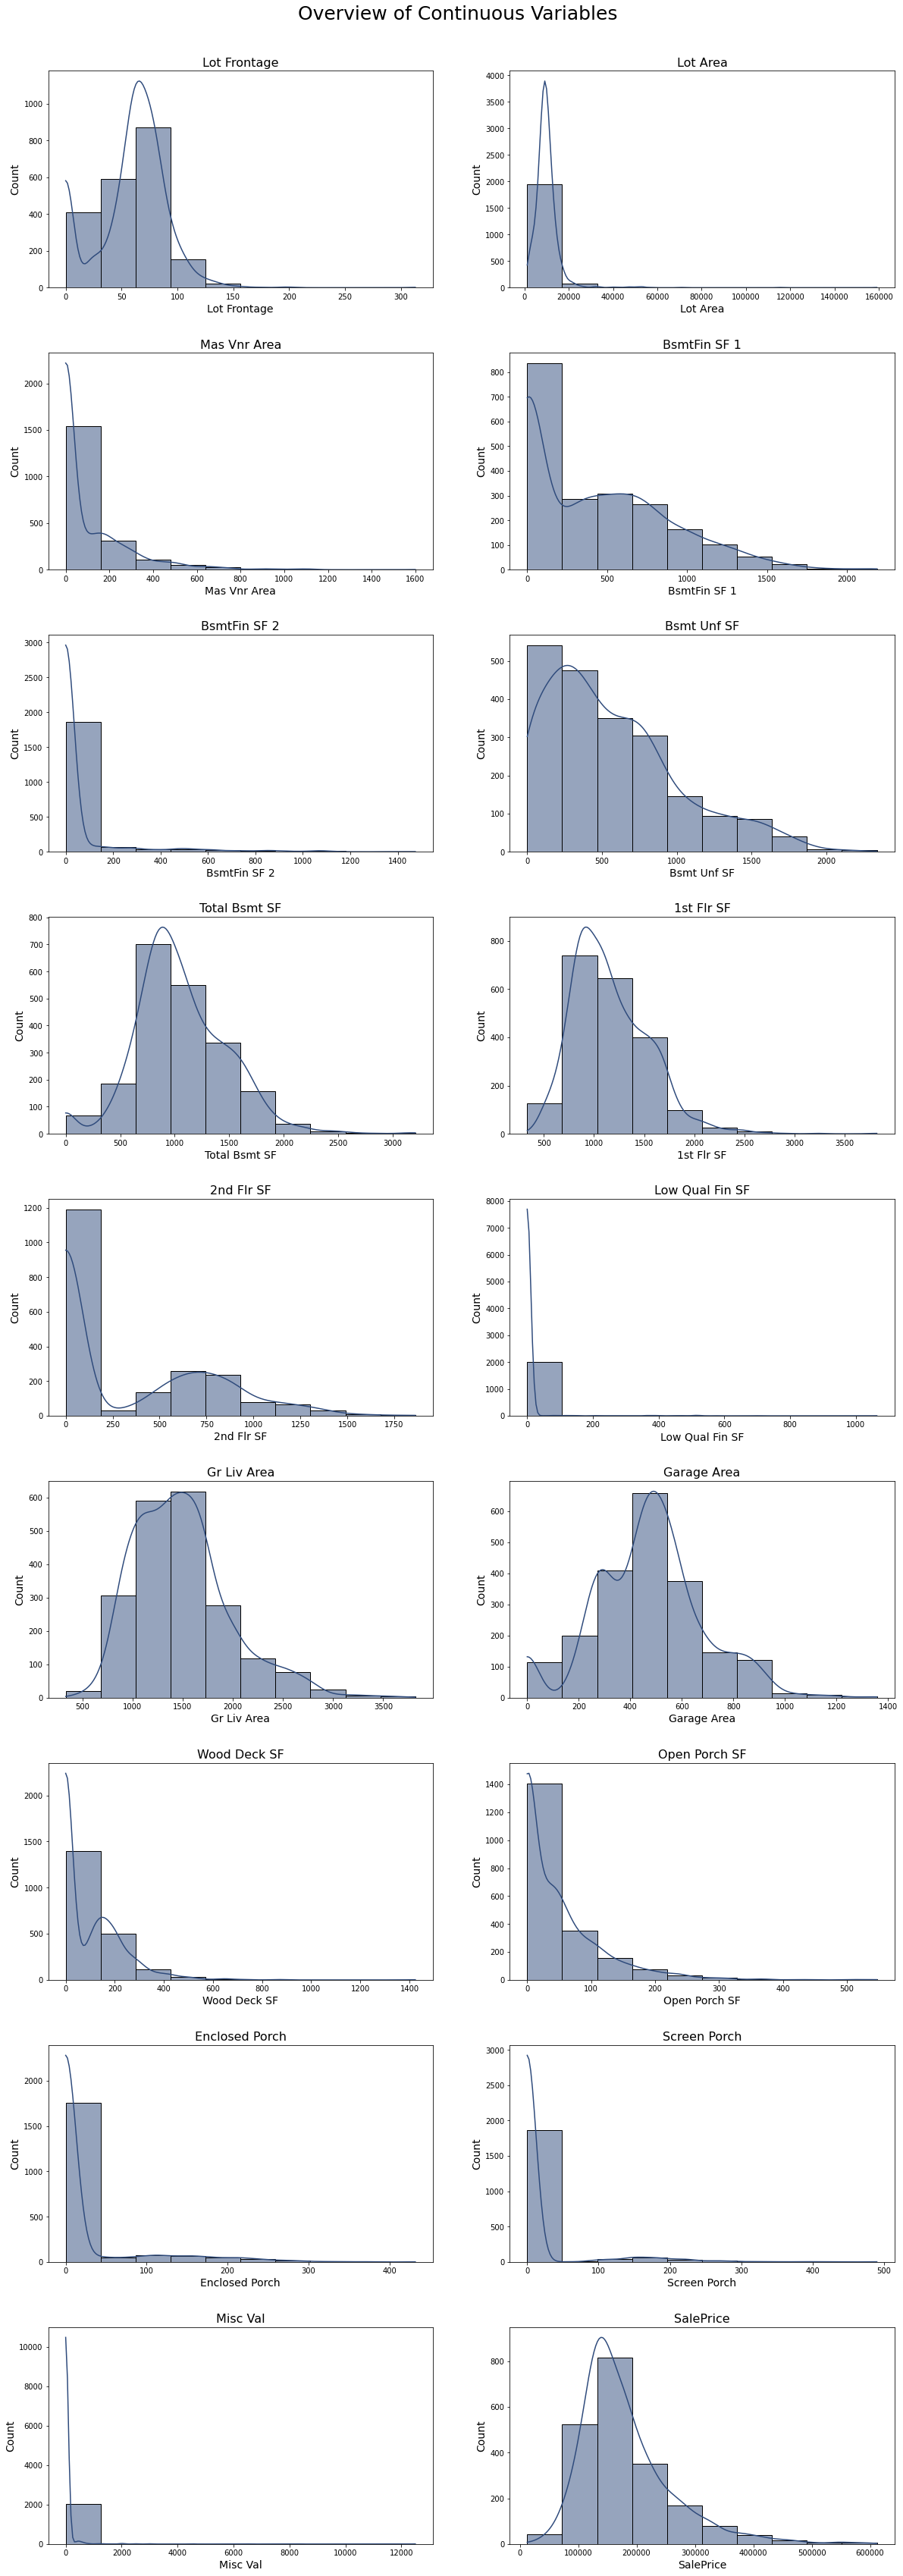

In [59]:
# To visualise continuous variables, histograms are a more appropriate tool

ax = plt.figure(figsize=(20,60))

plt.suptitle("Overview of Continuous Variables", fontsize = 25, y=0.90)
for i, col in enumerate(continuous_variables):
    ax.add_subplot(9, 2, i+1) 
    sns.histplot(df[col], bins=10, kde=True, color='#2f4b7c', )
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(xlabel=col, fontsize=14)
    plt.ylabel(ylabel= 'Count' , fontsize=14)
    plt.title(col, fontsize=16)
    plt.subplots_adjust(hspace = 0.3)

From the histograms above, we observe that some features resememble skewed normal distributions, namely: Lot Frontage, Lot Area, Total Basement SF, 1st Flr SF, Gr Liv Area, Garage Area and SalePrice. We also do note that for the remainder of the charts, the vast majority have a value of 0. 

Thus to obtain a better picture of the most important features, we'll apply a log transform to help us handle the skewed data. 

### Boxplot (Continuous variables): 

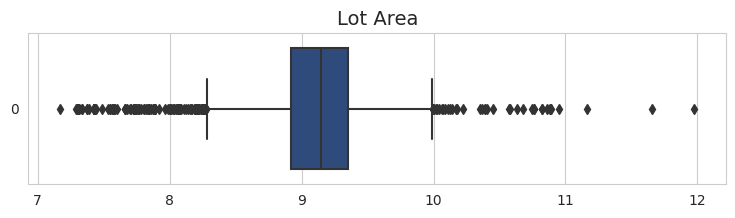

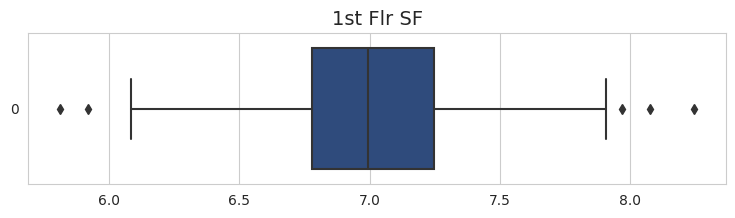

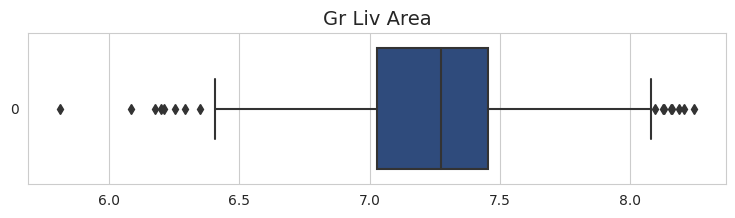

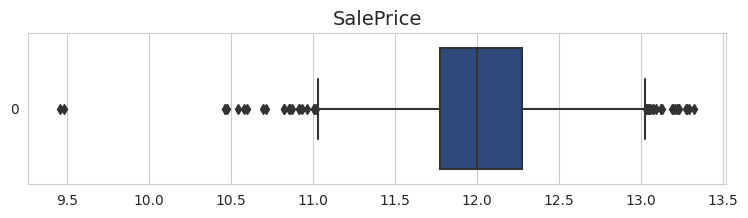

In [60]:
for feature in continuous_variables:
    df_cont = df.copy()
    if 0 in df_cont[feature].unique():         # pass over features with a significant number of '0's
        pass
    else:
        plt.figure(figsize=(9, 2), dpi=100)
        with sns.axes_style("whitegrid"):
            sns.boxplot(
            data = np.log(df_cont[feature]),   # apply log transform to handle skewed data 
            saturation = 2,
            color="#2f4b7c",
            orient = "h"
            )
        plt.title(feature, fontsize=14)
    plt.show()

From the above boxplots, the lot area and sale price had the highest number of outliers, followed by lot frontage and ground living area. Given the variety of home types (as explained below in BldgType) included in this data set, it is understandable that there would be a wide disparity in lot areas and consequently, sale prices. 

BldgType: Type of dwelling
- 1Fam Single-family Detached
- 2FmCon Two-family Conversion; originally built as one-family dwelling
- Duplx Duplex
- TwnhsE Townhouse End Unit
- TwnhsI Townhouse Inside Unit

With these 3 charts, we can now narrow down our list of continuous variables to be used in our modelling, i.e Combined Area only. Although 'Mas Vnr Area' has a relatively high coefficient of 0.51, the histogram shows a right-skewed distribution, meaning that a significant number of homes lie in the extreme-low end of the range. Thus we will only be keeping the Combined area and SalePrice.

In [61]:
for feature in continuous_variables:
    if feature == 'SalePrice':
        pass
    else: 
        removed_continuous_variables.append(feature)
removed_continuous_variables

['Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Misc Val']

### Discrete Variables

#### Correlation Heatmap 

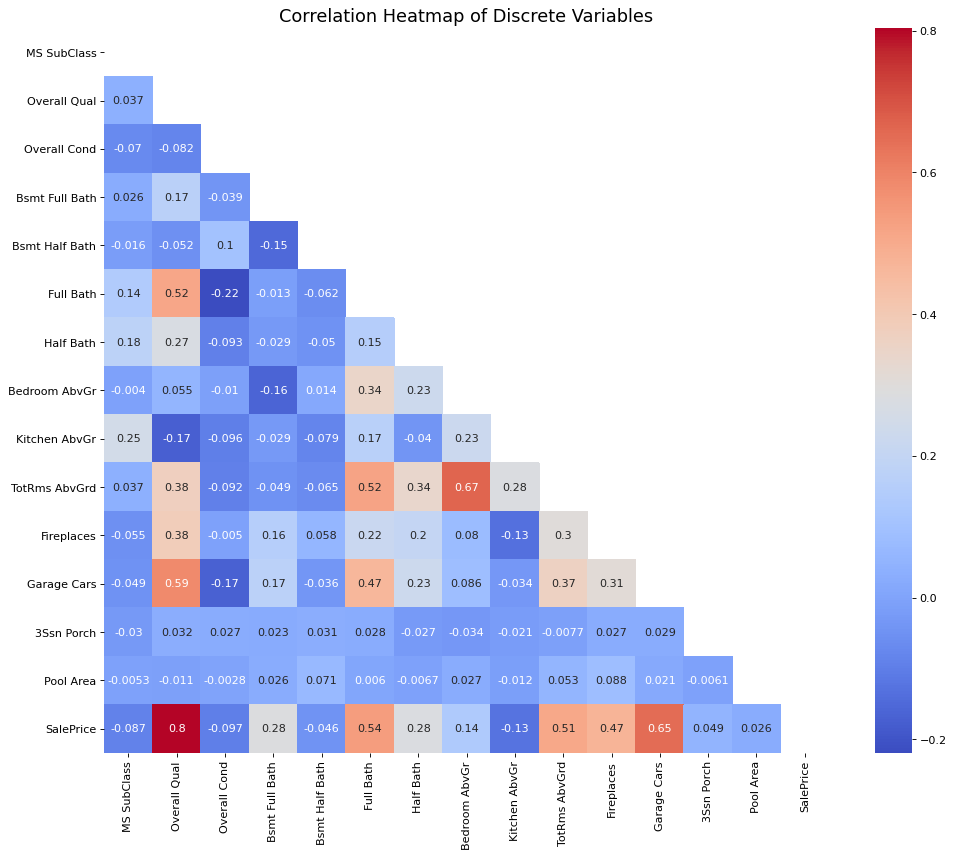

In [62]:
discrete_list = discrete_variables.copy()
discrete_list.append('SalePrice')

discrete_corr = df[discrete_list].corr()
mask_matrix = np.triu(discrete_corr)

plt.figure(figsize=(15,12), dpi=80)
plt.title('Correlation Heatmap of Discrete Variables', fontsize=16)
sns.heatmap(discrete_corr, cmap='coolwarm', mask=mask_matrix, square=True, annot=True);

#### Observations: 

In the earlier heatmap, we noted that the overall qual had a strong positive correlation with the sale price (0.8)

Here we look at other discrete variables with >0.5 correlation coefficient with sale price: 

- SalePrice vs Garage Cars (0.65)
- SalePrice vs TotsRms AbvGrd (0.51)
- SalePrice vs Full Bath (0.54)

We also look at other features with >0.5 correlation coefficient with each other. 
- Overall Qual vs Full Bath (0.8)
- Overall Qual vs Garage Cars (0.59)
- TotsRms AbvGrd vs Full Bath (0.54)
- TotsRms AbvGrd vs Bedroom AbvGr (0.67) 

These features do have some correlation with each other, as having more rooms above grade would correspond to more bedrooms above grade and therefore more full bathrooms. These would in turn, result in a higher sale price. Furthermore, being able to fit more cars in the garage usually indicates a larger garage area (0.89 coefficient) which we noted in our initial correlation analysis. 

### Bar Plots (Discrete variables)

In [63]:
def subplot_bars(list_of_columns):
    fig   = plt.figure(figsize = (25, 90))  
    count = 0                                          
    for column in list_of_columns:
        count += 1                                     
        ax = fig.add_subplot(20, 3, count)
        plt.title(column, size = 18)
        plt.ylabel("Sale Price", size = 12)
        plt.xlabel(column, size = 12)
        plt.xticks(size = 12, rotation=45)
        sns.barplot(x = column, y = "SalePrice", data = df,ci = None, color= '#2f4b7c')
#         palette=['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087','#f95d6a', '#ff7c43', '#ffa600']
        plt.subplots_adjust(hspace = 0.4)
        plt.tight_layout();

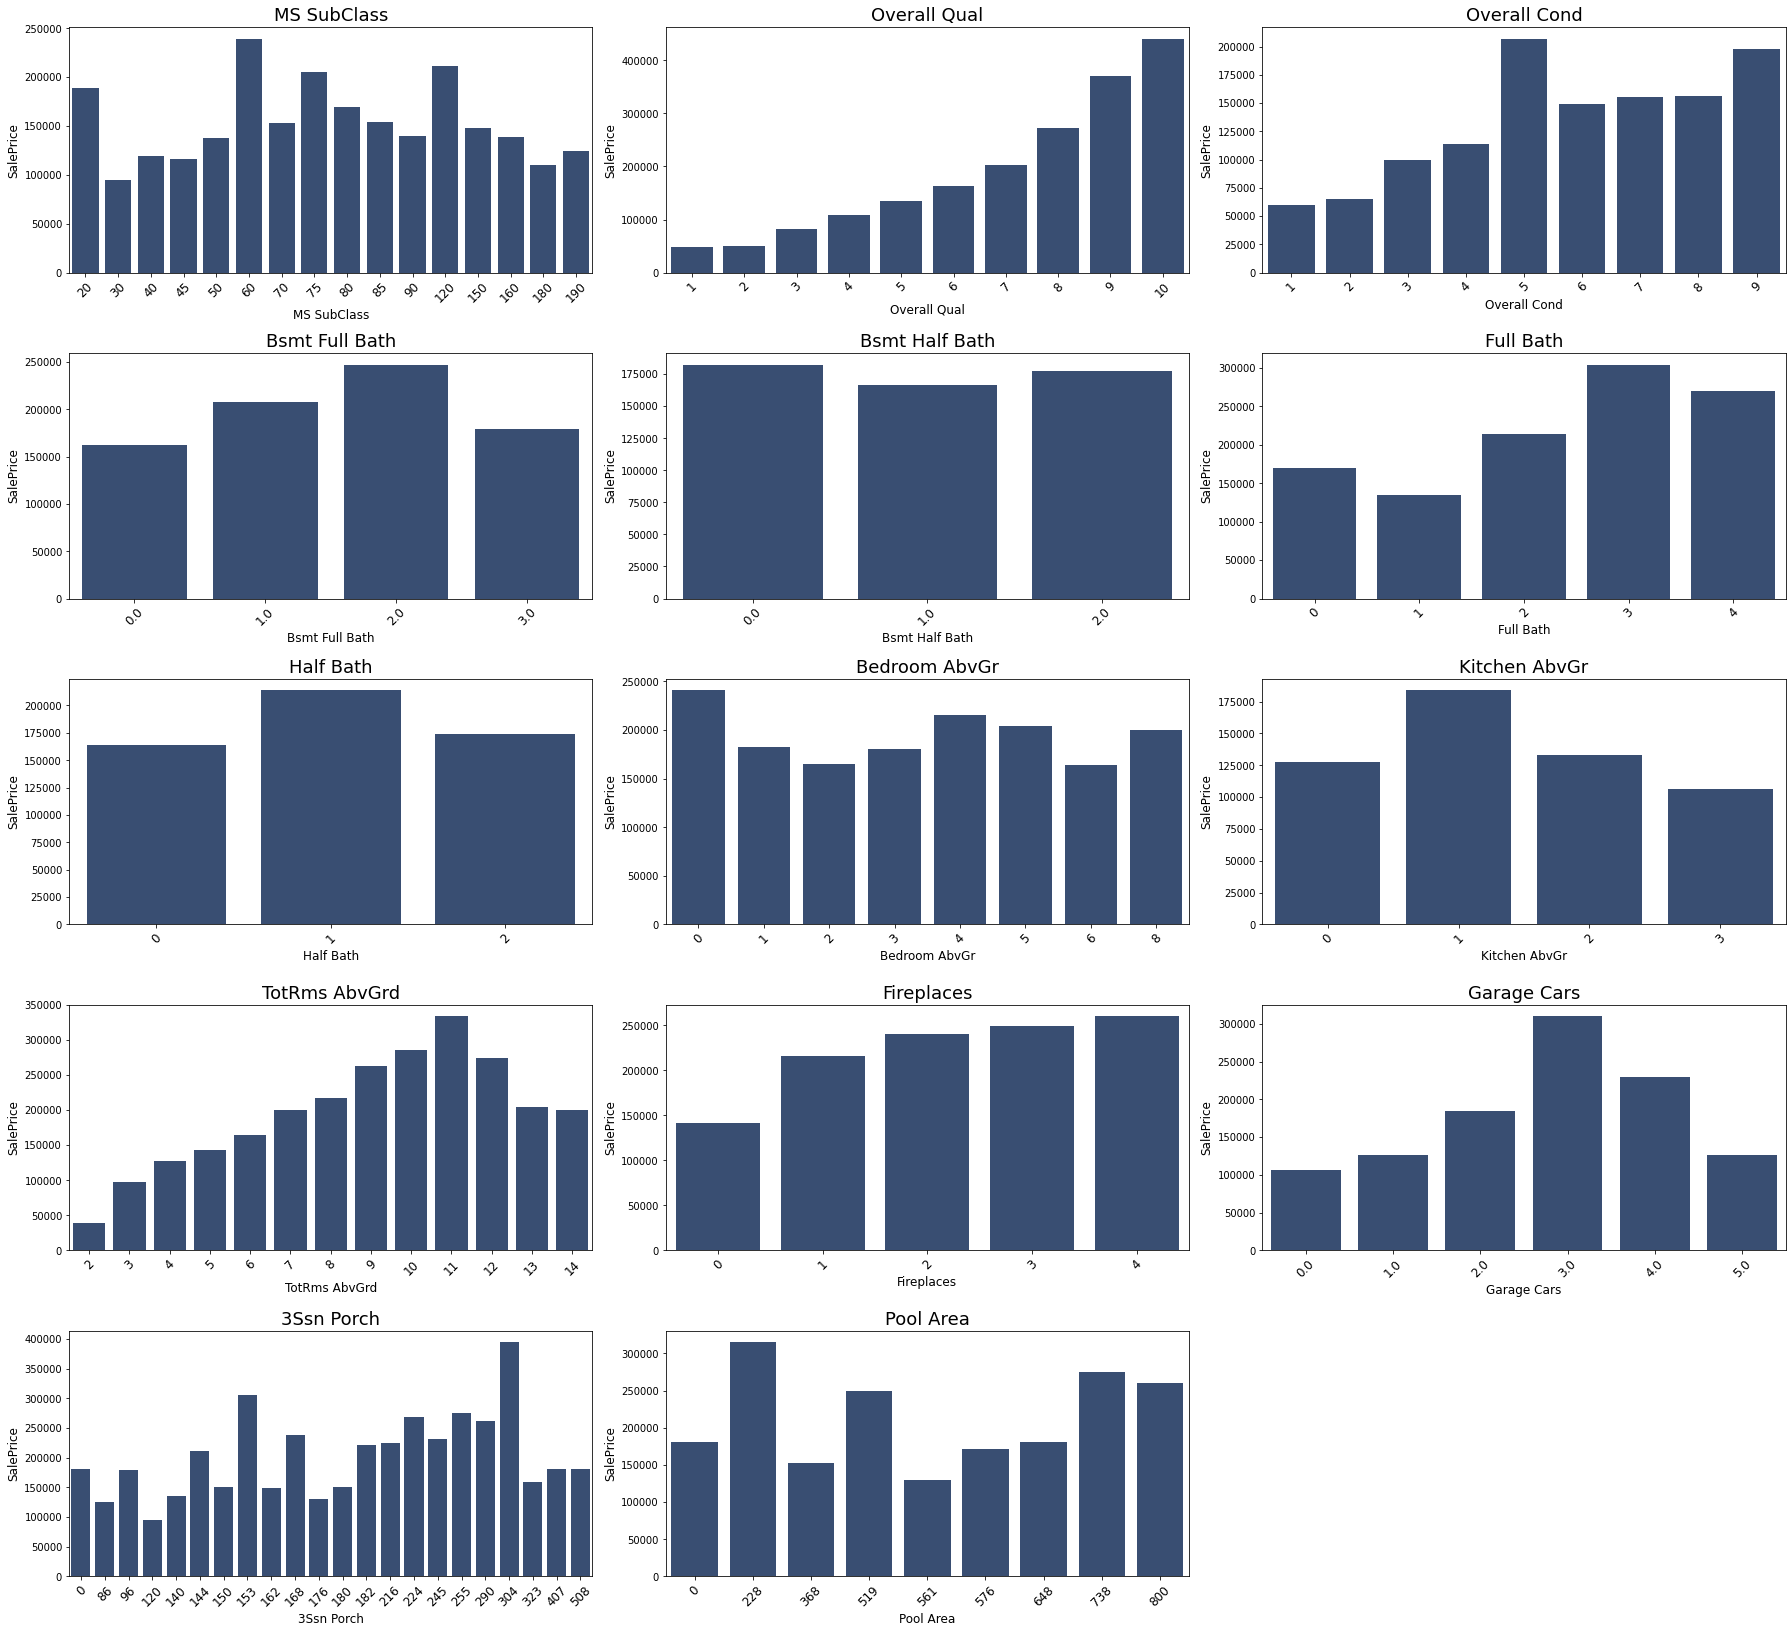

In [64]:
subplot_bars(discrete_variables)

Some relationships were observed between the discrete variables the sale price, most noticeably for the overall quality of the house and overall condition. These 2 variables were ranked on a scale of 1-10 and sales prices tended to increase with higher scores. In fact, the sales price increases exponentially with the overall quality of the house

We also observe that sales prices increase with the total number of rooms above ground, which makes sense as houses with more rooms tend to occupy a larger area and thus would cost more. 

#### Combining columns 

With these charts in mind, we will combine columns with overlapping data. 

In [65]:
# Discrete
# Combine bedrooms and bathrooms above grade. 
df['Total Rooms AbvGrd'] = df['TotRms AbvGrd'] + df['Full Bath'] + df['Half Bath']
df['Total Rooms AbvGrd'].describe()

count    2049.000000
mean        8.376281
std         2.105017
min         3.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        16.000000
Name: Total Rooms AbvGrd, dtype: float64

In [66]:
df[['Total Rooms AbvGrd', 'SalePrice']].corr()

Total Rooms AbvGrd  SalePrice
Total Rooms AbvGrd            1.000000   0.581953
SalePrice                     0.581953   1.000000

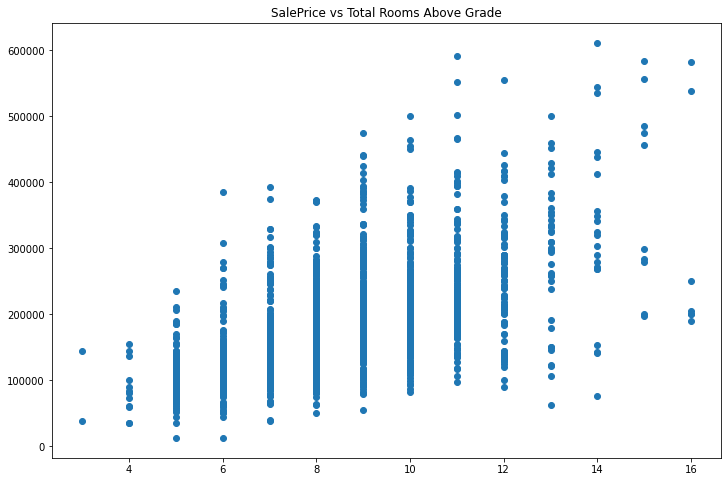

In [67]:
plt.figure(figsize=(12,8))
plt.title('SalePrice vs Total Rooms Above Grade')
plt.scatter(x='Total Rooms AbvGrd', y='SalePrice', data=df)
plt.show()

We will also be removing features which have a low correlation (<0.5) with the sale price. 

With the combined discrete features and 'Garage Cars' kept, the other features will be dropped. 

In [68]:
len(discrete_variables)

14

In [69]:
removed_discrete_variables = []
for feature in discrete_variables:
    if feature == 'Garage Cars':
        pass
    else:
        removed_discrete_variables.append(feature)
removed_discrete_variables

['MS SubClass',
 'Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 '3Ssn Porch',
 'Pool Area']

In [70]:
len(removed_discrete_variables)

13

In [71]:
features_to_drop.extend(removed_temporal_variables)
features_to_drop.extend(removed_discrete_variables)
features_to_drop.extend(removed_continuous_variables)

In [72]:
len(features_to_drop)

43

#### B) Ordinal Variables Visualisation

Here we can explore the correlation between the ordinal variables with the sale price. Here the 'Overall Qual' is also included as it is possible that some ordinal features may be correlated with it.

In [73]:
df[ordinal_variables + ['Overall Qual', 'SalePrice']].corr()

Lot Shape  Utilities  Land Slope  Exter Qual  Exter Cond  \
Lot Shape        1.000000   0.013892    0.108158   -0.232327    0.004329   
Utilities        0.013892   1.000000   -0.006397    0.037340    0.033338   
Land Slope       0.108158  -0.006397    1.000000    0.029642    0.022911   
Exter Qual      -0.232327   0.037340    0.029642    1.000000    0.035274   
Exter Cond       0.004329   0.033338    0.022911    0.035274    1.000000   
Bsmt Qual       -0.228803   0.049009   -0.022709    0.576127   -0.004333   
Bsmt Cond       -0.083822   0.048159    0.004739    0.193116    0.145163   
Bsmt Exposure   -0.176877   0.026427   -0.221281    0.314311    0.009369   
BsmtFin Type 1  -0.152086  -0.006109   -0.040689    0.256711    0.068407   
BsmtFin Type 2  -0.029465  -0.022642   -0.044851   -0.028747    0.104240   
Heating QC      -0.158954   0.015102    0.033207    0.525564    0.076382   
Electrical      -0.117493   0.065211   -0.001918    0.217395    0.120904   
Kitchen Qual    -0.197430  -0.006733    0.020192    0.729048    0.043769   
Functional      -0.023625   0.007643    0.078984    0.112431    0.102744   
Garage Finish   -0.273294   0.001820    0.002126    0.513278   -0.016085   
Garage Qual     -0.143643  -0.008104   -0.003584    0.224494    0.102876   
Garage Cond     -0.131331  -0.007860   -0.001405    0.206263    0.106745   
Paved Drive     -0.151043   0.027731    0.015036    0.227271    0.115717   
Overall Qual    -0.244060   0.030074    0.034713    0.738370    0.021115   
SalePrice       -0.296743   0.026408   -0.057967    0.715048    0.036393   

                Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
Lot Shape       -0.228803  -0.083822      -0.176877       -0.152086   
Utilities        0.049009   0.048159       0.026427       -0.006109   
Land Slope      -0.022709   0.004739      -0.221281       -0.040689   
Exter Qual       0.576127   0.193116       0.314311        0.256711   
Exter Cond      -0.004333   0.145163       0.009369        0.068407   
Bsmt Qual        1.000000   0.632529       0.439051        0.418575   
Bsmt Cond        0.632529   1.000000       0.270724        0.315759   
Bsmt Exposure    0.439051   0.270724       1.000000        0.352297   
BsmtFin Type 1   0.418575   0.315759       0.352297        1.000000   
BsmtFin Type 2   0.103817   0.220796       0.118880        0.110636   
Heating QC       0.434087   0.194546       0.161492        0.194290   
Electrical       0.281078   0.212680       0.143235        0.213469   
Kitchen Qual     0.524352   0.191120       0.292426        0.267948   
Functional       0.179407   0.203673       0.071440        0.125351   
Garage Finish    0.485891   0.165856       0.293644        0.265279   
Garage Qual      0.200087   0.141194       0.083008        0.176756   
Garage Cond      0.190687   0.137521       0.066906        0.163138   
Paved Drive      0.310601   0.235808       0.143733        0.279860   
Overall Qual     0.652878   0.300478       0.356647        0.290091   
SalePrice        0.613236   0.225096       0.426134        0.350728   

                BsmtFin Type 2  Heating QC  Electrical  Kitchen Qual  \
Lot Shape            -0.029465   -0.158954   -0.117493     -0.197430   
Utilities            -0.022642    0.015102    0.065211     -0.006733   
Land Slope           -0.044851    0.033207   -0.001918      0.020192   
Exter Qual           -0.028747    0.525564    0.217395      0.729048   
Exter Cond            0.104240    0.076382    0.120904      0.043769   
Bsmt Qual             0.103817    0.434087    0.281078      0.524352   
Bsmt Cond             0.220796    0.194546    0.212680      0.191120   
Bsmt Exposure         0.118880    0.161492    0.143235      0.292426   
BsmtFin Type 1        0.110636    0.194290    0.213469      0.267948   
BsmtFin Type 2        1.000000   -0.036114    0.063276      0.007405   
Heating QC           -0.036114    1.000000    0.227690      0.512565   
Electrical            0.063276    0.227690    1.000000      0.2

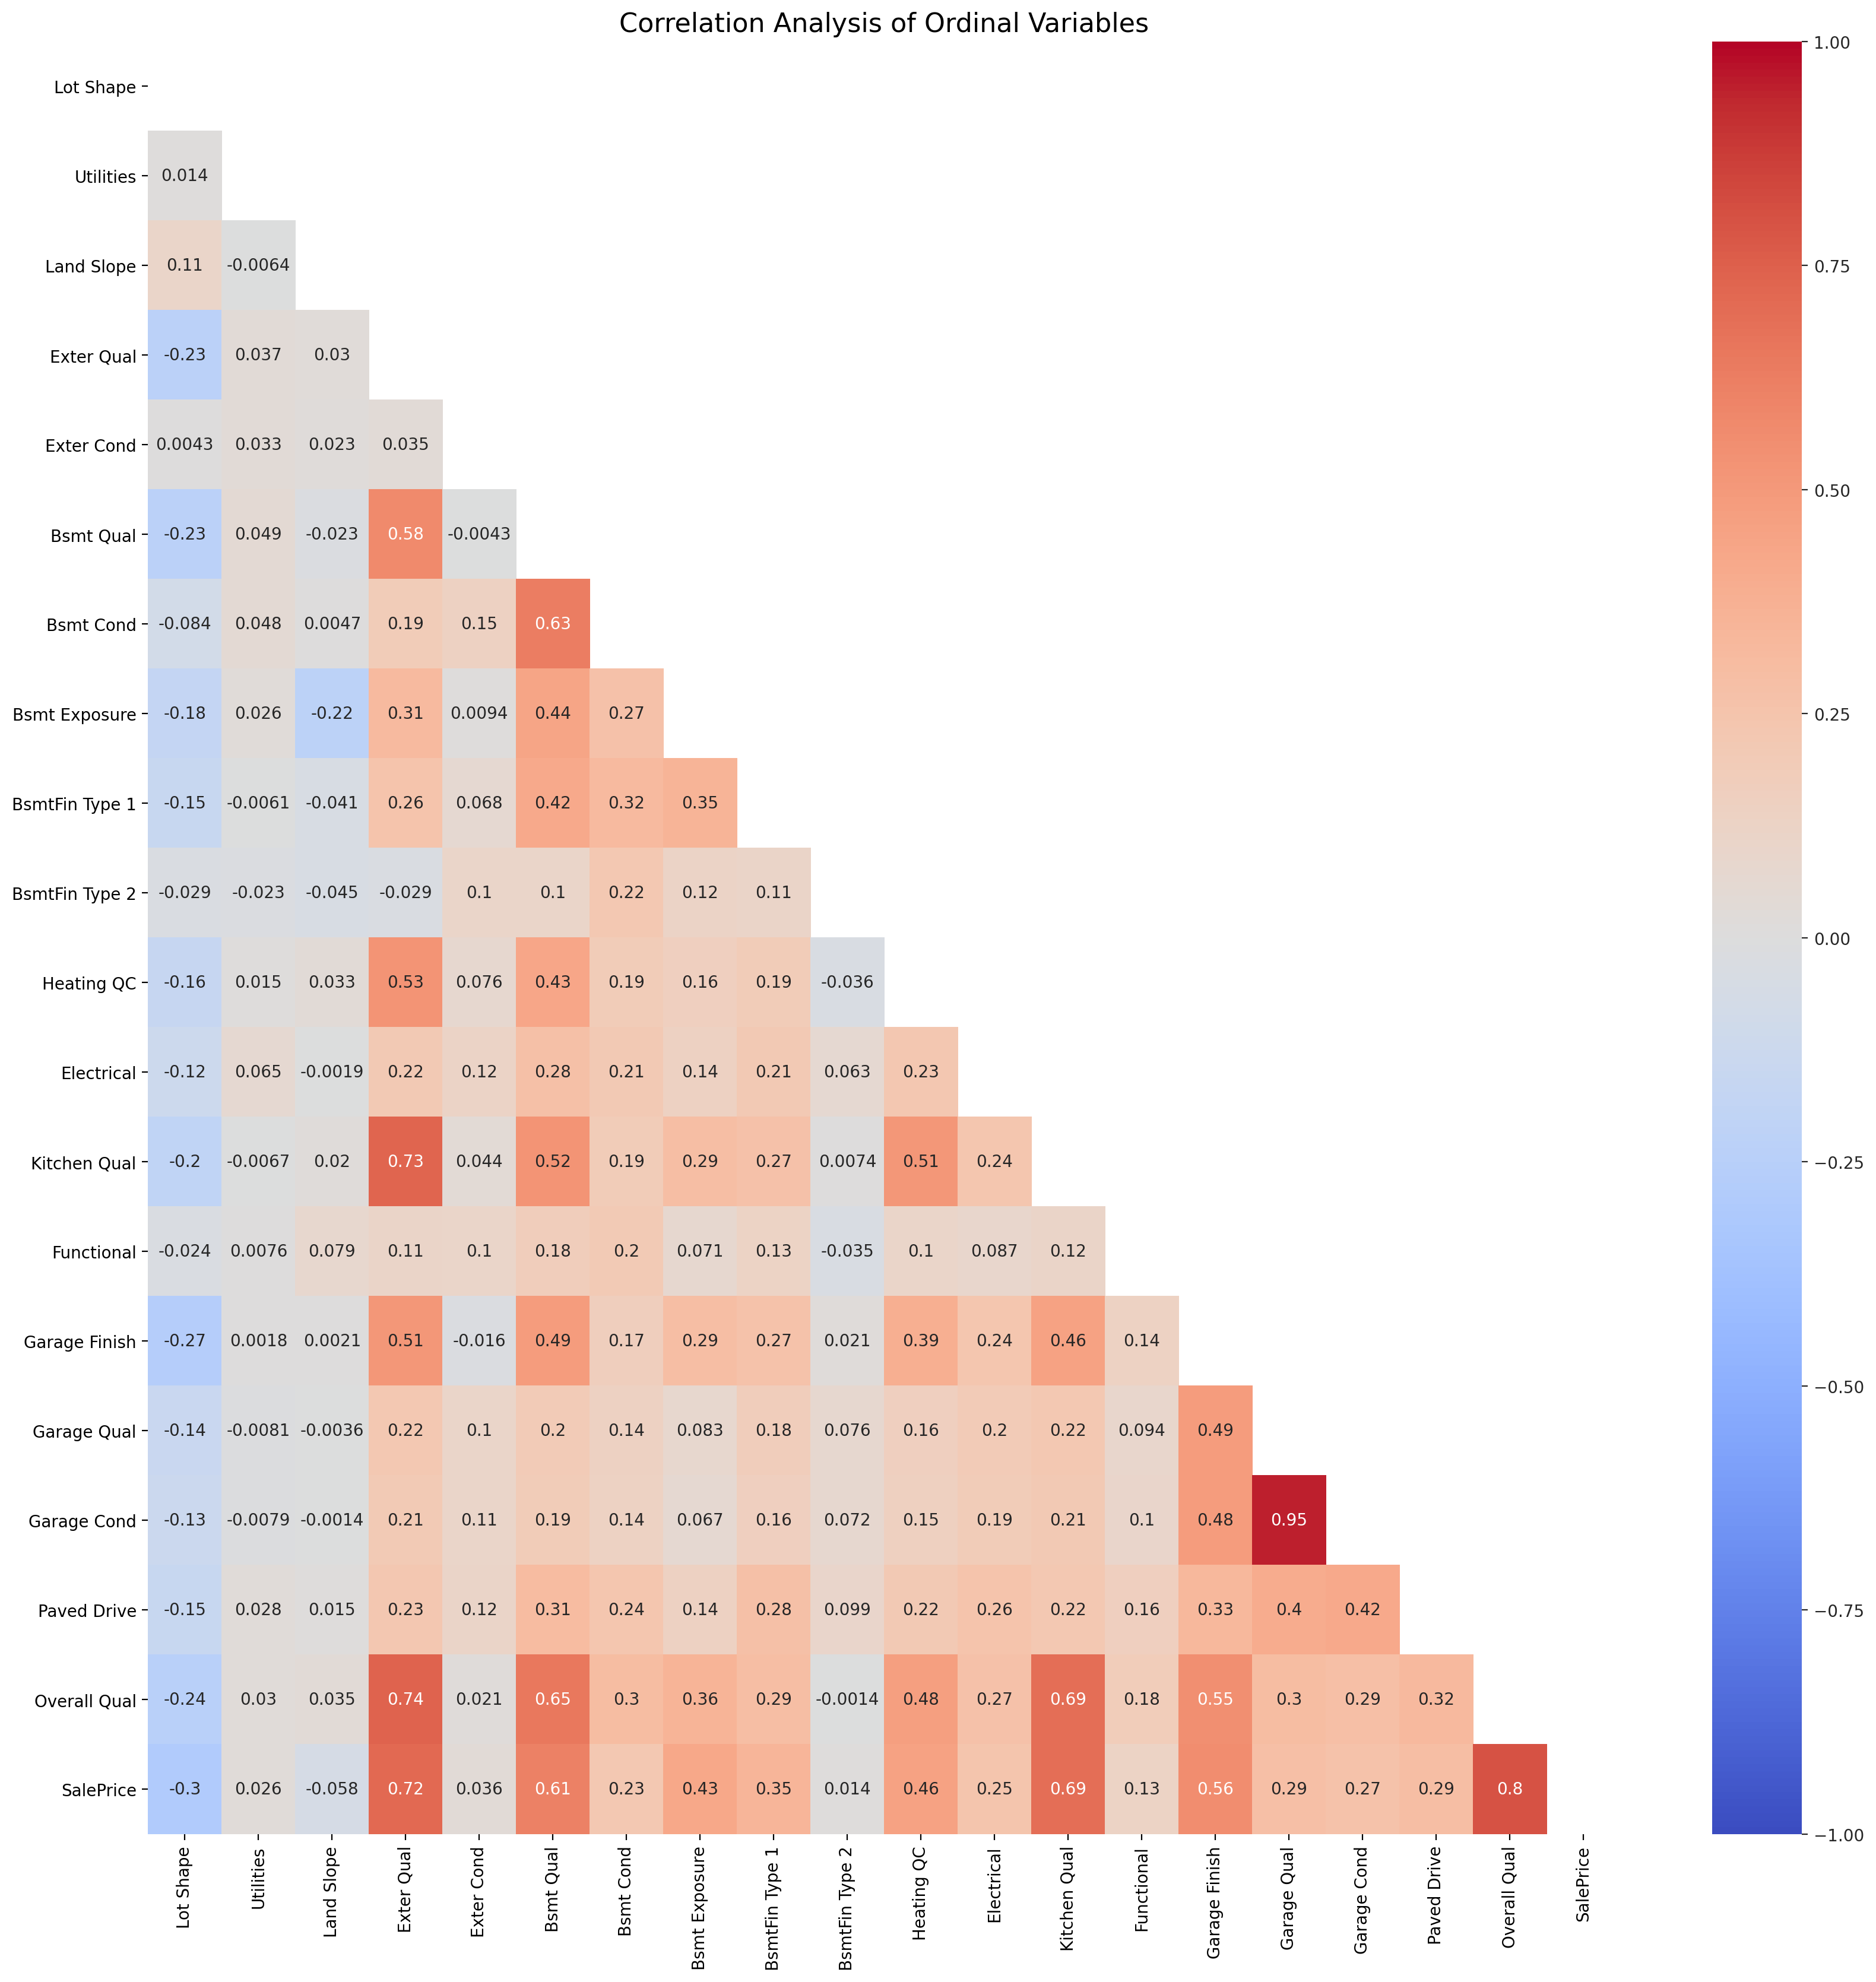

In [74]:
plt.figure(figsize=(20,20), dpi=200)
plt.title("Correlation Analysis of Ordinal Variables", fontsize=16)

matrix = np.triu(df[ordinal_variables + ['Overall Qual', 'SalePrice']].corr())

with sns.axes_style("white"):
    sns.heatmap(df[ordinal_variables + ['Overall Qual', 'SalePrice']].corr(), vmin=-1, vmax=1, center=0, linecolor='black', cmap="coolwarm", annot=True, mask=matrix)
    
plt.show()

#### Correlation Heatmap Observations (Ordinal variables):

We will explore the features with the highest correlation coefficients to sale price: 

- Overall Qual vs SalePrice (0.80)
- Exter Qual vs SalePrice (0.71)
- Bsmt Qual vs SalePrice (0.68)
- Kitchen Qual vs SalePrice (0.69)
- Garage Finish vs SalePrice (0.53)

This heatmap highlights 5 features with the highest correlation against the sale price; the external quality, basement quality,  kitchen quality and garage finish. These are meaningful findings to us because it is a strong indication that home buyers do have higher valuations for homes with higher quality features in the important areas of the house. These features will be combined, with the exception of garage finish as its coefficient of 0.53 is too distant from the next highest coefficient or 0.68. 

- Overall Qual vs Exter Qual (0.74)
- Overall Qual vs Bsmt Qual (0.68)
- Overall Qual vs Kitchen Qual (0.69)
- Overall Qual vs Garage Finish (0.52)
- Kitchen Qual vs Exter Qual (0.73)
- Bsmt Qual vs Exter Qual (0.68)

The above 6 features also have relatively strong positive correlations with one another, specifically between the overall quality and the quality of the external, basement and kitchen features. Similar to the observations of the numerical variables, we should be wary of putting these in our prediction models as they provide similar information to each other which could result in multicollinearity. We will thus be combining these features to give a 'total house score' in the next section. 

#### Combining ordinal variables 

In [75]:
# Combine features with above 0.6 coefficient
df['Combined House Qual'] = df['Overall Qual'] * df['Exter Qual'] * df['Bsmt Qual'] * df['Kitchen Qual']
df['Combined House Qual'].describe()

count    2049.000000
mean      303.145925
std       234.948215
min         0.000000
25%       135.000000
50%       216.000000
75%       448.000000
max      1250.000000
Name: Combined House Qual, dtype: float64

In [76]:
df['Combined House Qual']

0       288.0
1       448.0
2       180.0
3       180.0
4       108.0
        ...  
2046    512.0
2047    108.0
2048    162.0
2049    108.0
2050    252.0
Name: Combined House Qual, Length: 2049, dtype: float64

In [77]:
df[['Combined House Qual', 'SalePrice']].corr()

Combined House Qual  SalePrice
Combined House Qual             1.000000   0.846015
SalePrice                       0.846015   1.000000

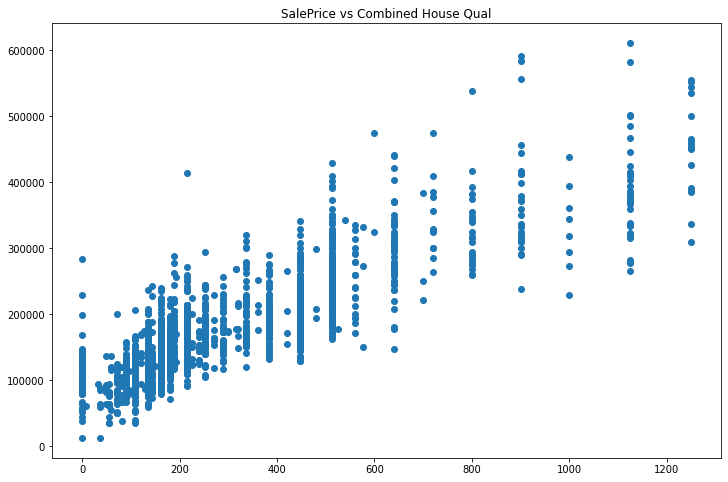

In [78]:
plt.figure(figsize=(12,8))
plt.title('SalePrice vs Combined House Qual')
plt.scatter(x='Combined House Qual', y='SalePrice', data=df)
plt.show()

With our combined features, the correlation with sale price improves from 0.69 - 0.74 to 0.837. 

For the remaining ordinal variables, we note there is a much weaker lower correlation with the sale price (<0.5), thus we will drop them from the data set as well. Garage finish will be kept. 

In [79]:
# keep garage finish (0.53)
removed_ordinal_variables = []
for feature in ordinal_variables: 
    if feature == 'Garage Finish':
        pass
    else: 
        removed_ordinal_variables.append(feature)
len(removed_ordinal_variables)

17

In [80]:
features_to_drop.extend(removed_ordinal_variables)

In [81]:
len(features_to_drop)

60

#### C) Nominal Variables

In [82]:
df[nominal_variables].head()

MS Zoning Foundation Heating Central Air Garage Type Street Land Contour  \
0        RL     CBlock    GasA           Y      Attchd   Pave          Lvl   
1        RL      PConc    GasA           Y      Attchd   Pave          Lvl   
2        RL     CBlock    GasA           Y      Detchd   Pave          Lvl   
3        RL      PConc    GasA           Y     BuiltIn   Pave          Lvl   
4        RL      PConc    GasA           Y      Detchd   Pave          Lvl   

  Lot Config Neighborhood Condition 1 Condition 2 Bldg Type House Style  \
0    CulDSac       Sawyer        RRAe        Norm      1Fam      2Story   
1    CulDSac      SawyerW        Norm        Norm      1Fam      2Story   
2     Inside        NAmes        Norm        Norm      1Fam      1Story   
3     Inside       Timber        Norm        Norm      1Fam      2Story   
4     Inside      SawyerW        Norm        Norm      1Fam      1.5Fin   

  Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Sale Type  
0      Gable   CompShg      HdBoard      Plywood      BrkFace       WD   
1      Gable   CompShg      VinylSd      VinylSd      BrkFace       WD   
2      Gable   CompShg      VinylSd      VinylSd         None       WD   
3      Gable   CompShg      VinylSd      VinylSd         None       WD   
4      Gable   CompShg      Wd Sdng      Plywood         None       WD

In [83]:
# We want to find out how many unique sub-categories each feature has. 
for feature in nominal_variables:
    sub_cat_count = df[feature].nunique()
    print(f"{feature} has {sub_cat_count} sub-categories.")
print(f"Total no. of nominal variables: {len(nominal_variables)}")

MS Zoning has 7 sub-categories.
Foundation has 6 sub-categories.
Heating has 5 sub-categories.
Central Air has 2 sub-categories.
Garage Type has 7 sub-categories.
Street has 2 sub-categories.
Land Contour has 4 sub-categories.
Lot Config has 5 sub-categories.
Neighborhood has 28 sub-categories.
Condition 1 has 9 sub-categories.
Condition 2 has 8 sub-categories.
Bldg Type has 5 sub-categories.
House Style has 8 sub-categories.
Roof Style has 6 sub-categories.
Roof Matl has 5 sub-categories.
Exterior 1st has 15 sub-categories.
Exterior 2nd has 15 sub-categories.
Mas Vnr Type has 5 sub-categories.
Sale Type has 9 sub-categories.
Total no. of nominal variables: 19


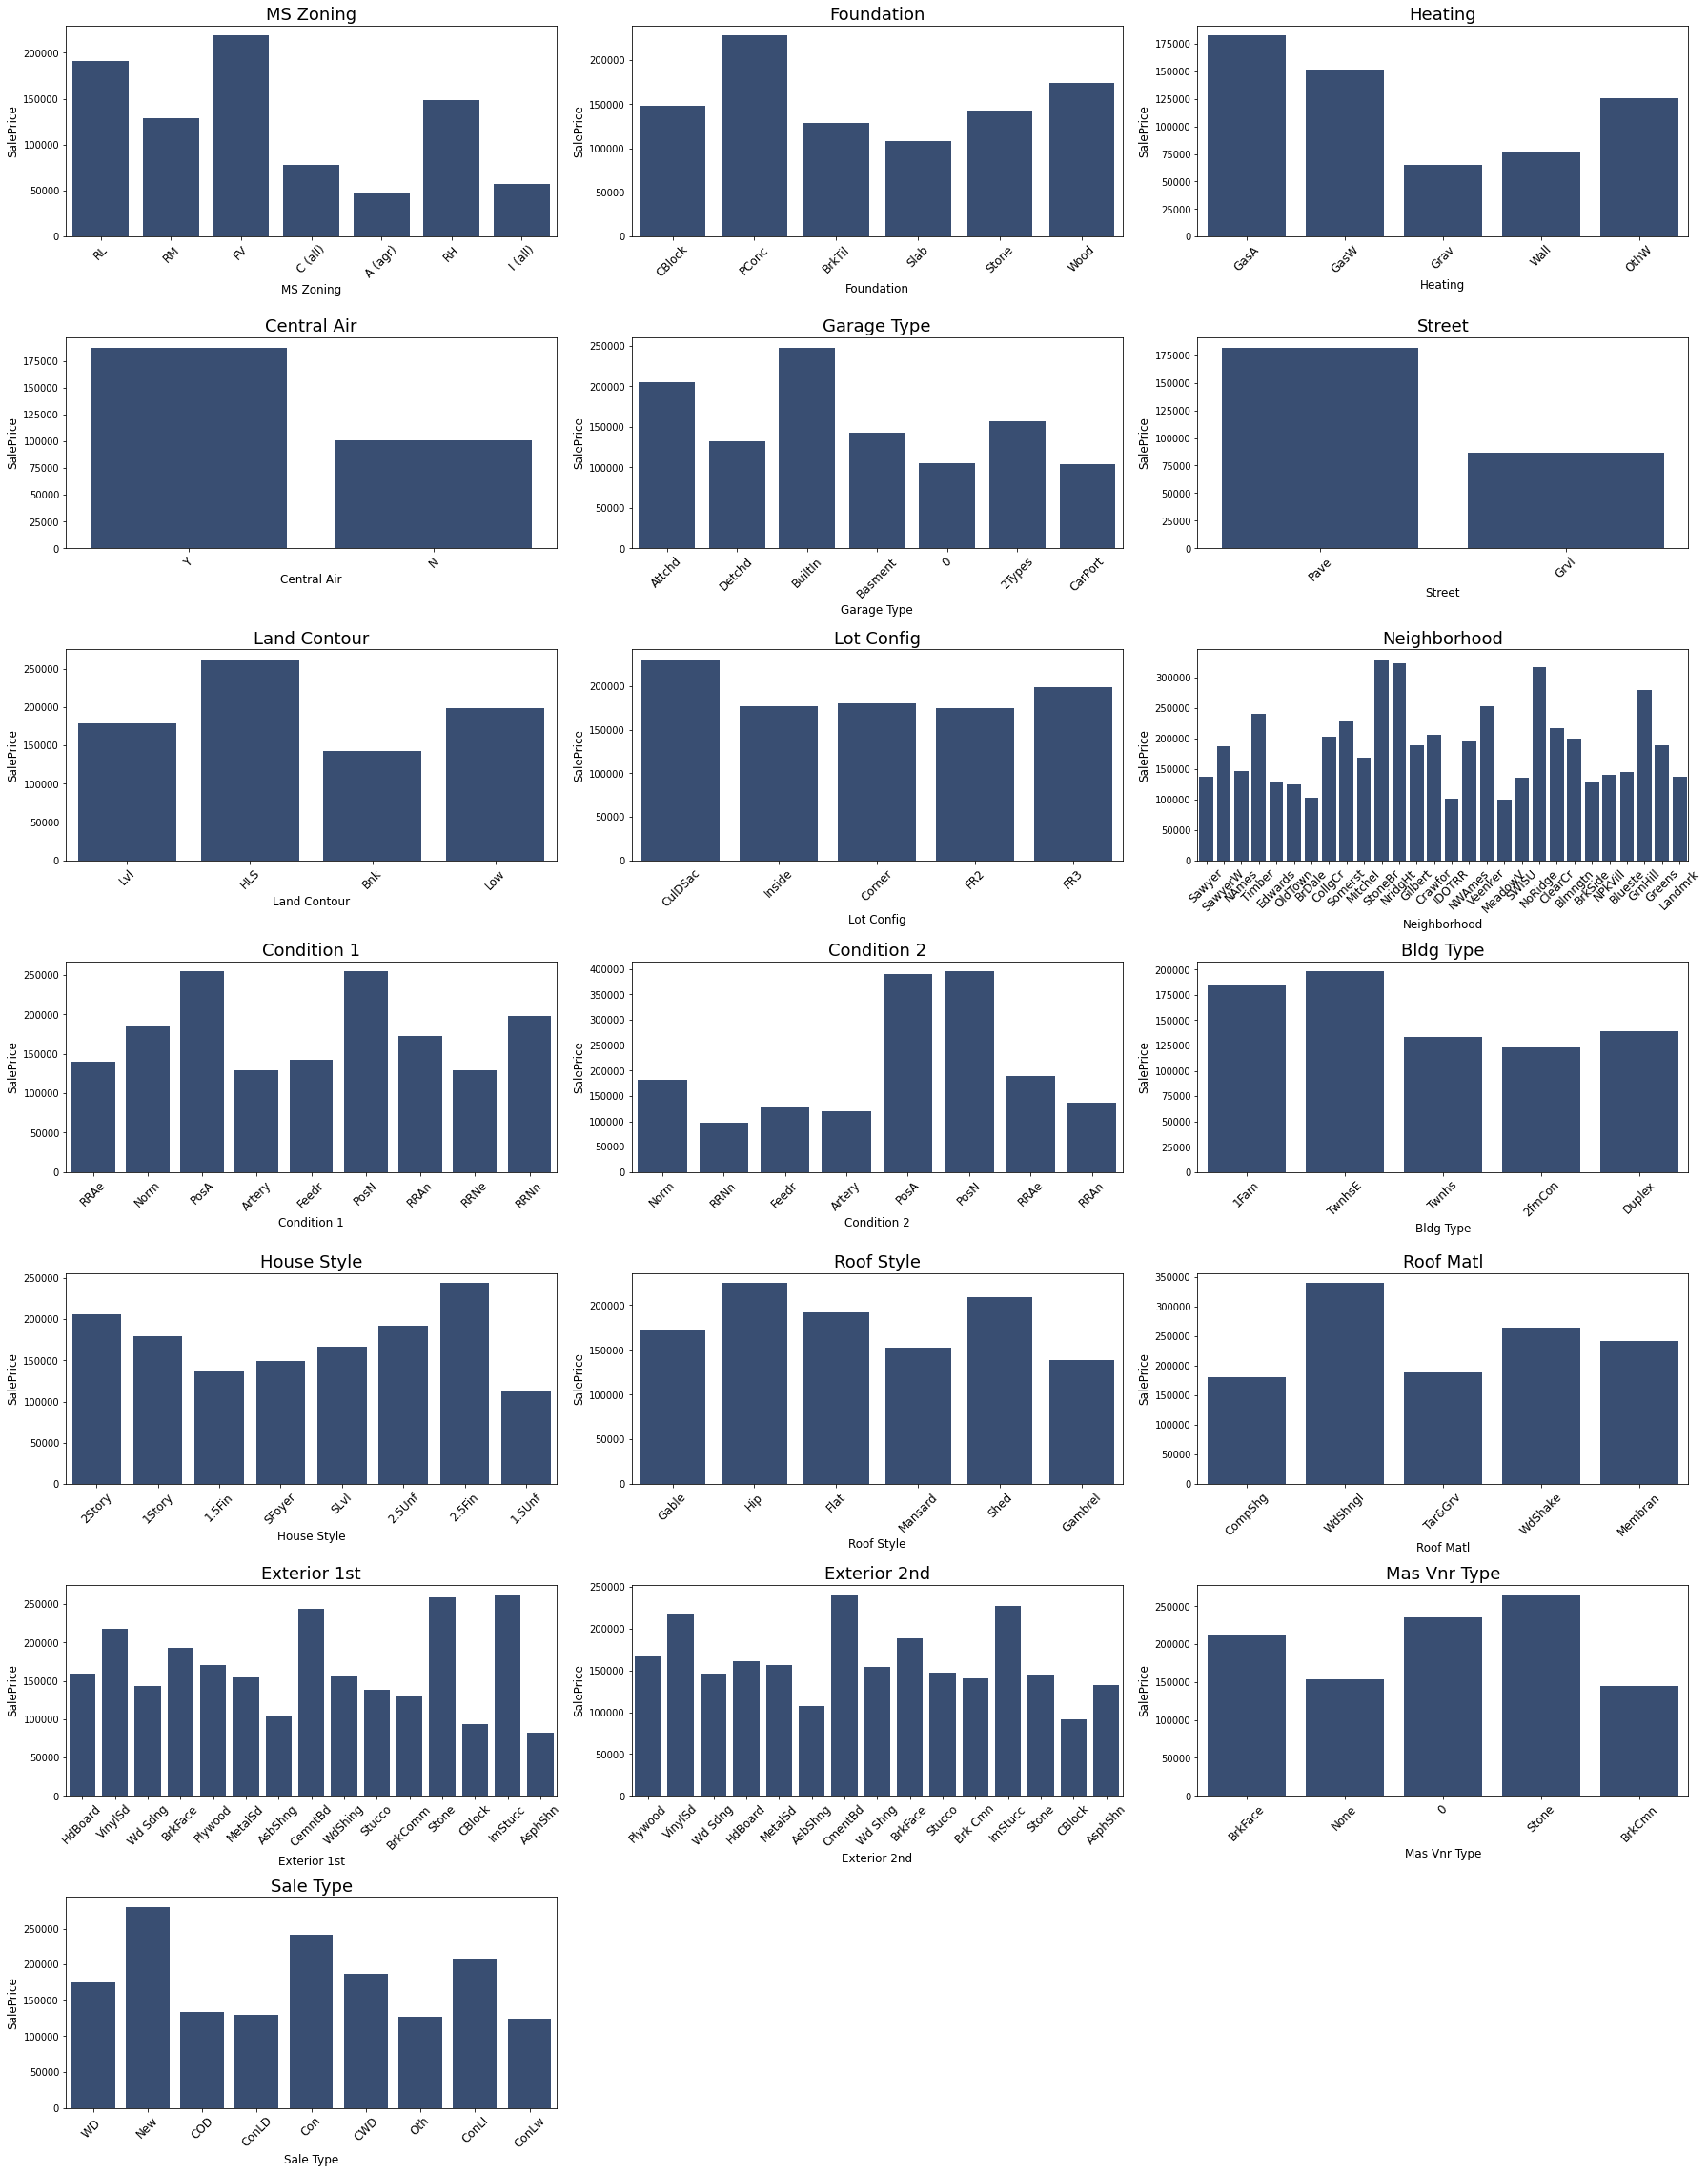

In [84]:
subplot_bars(nominal_variables)

#### Nominal Variables Observations and Interpretations

From the above bar plots, we identify trends across the categories and how they affect the median sale price. We'll also be  removing features similar to features explored in the earlier sections of this analysis to reduce multicollinearity. 

- MS Zoning: Wide range of median sale prices across the different zones. FV zones, or floating villages are special areas for retirement communities and have the highest median price. 
- Neighbourhood: There are 28 neighbourhoods in this data set and we'll be exploring this section later on in the analysis. We do note that Somerst, Noridge and NWAmes. 

Since these 2 have overlapping features, MS Zoning will be dropped in favour of neighbourhood as the neighbourhood feature is more informative. 

Similar house features: 
- Foundation
- Heating
- Roof Style
- Roof Material
- Exterior 1st 
- Exterior 2nd
- Central AC
- Garage Type
- Mas Vnr Type

Features to explore further: 
- Land Contour: Hillside houses tend to be associated with higher socioeconomic status and are thus, much higher priced compared to their lowland counterparts. 
- Lot Config: Cul-de-sac and FR 3 lots are almost tied at the top at around 200,000 while the remaining 3 are tied around 150,000 
- Condition 1: Homes near positive off-site features are valued higher. 
- Condition 2: Homes near positive off-site features are valued higher. 
- Building Type: Townhouse end units have a higher median sale price. 
- House Style: Homes with more floors have a higher median sale price. 
- Sale Type: Sale contracts with 15% downpayment and new homes had the highest median sale prices
- Street: Paved streets corresponded with higher sale prices of at least 50%


In [85]:
removed_nominal_variables = ['MS Zoning', 'Foundation', 'Heating', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                            'Exterior 2nd', 'Central Air', 'Garage Type', 'Mas Vnr Type']

In [86]:
for feature in removed_nominal_variables: 
    if feature in nominal_variables:
        nominal_variables.remove(feature)
nominal_variables

['Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Sale Type']

For the remaining features, we want to identify if there is an overwhelming number of properties with the same feature (i.e >50% of homes sold have central air conditioning) as they would not provide much variability for the regression models.

In [87]:
low_variability_features = []
for feature in nominal_variables:
    if df[feature].value_counts().max() > (df.shape[0]*0.5):
        low_variability_features.append(feature)
        print(f"{feature}'s highest variable count is {df[feature].value_counts().max()}")
low_variability_features

Street's highest variable count is 2042
Land Contour's highest variable count is 1843
Lot Config's highest variable count is 1502
Condition 1's highest variable count is 1766
Condition 2's highest variable count is 2023
Bldg Type's highest variable count is 1698
House Style's highest variable count is 1058
Sale Type's highest variable count is 1781


['Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Sale Type']

In [88]:
for feature in low_variability_features:
    if feature in nominal_variables:
        nominal_variables.remove(feature)
nominal_variables

['Neighborhood']

In [89]:
removed_nominal_variables.extend(low_variability_features) 
len(removed_nominal_variables)

18

In [90]:
features_to_drop.extend(removed_nominal_variables)

In [91]:
len(features_to_drop)

78

In [92]:
df.drop(columns=features_to_drop, inplace=True)

In [93]:
df.columns

Index(['Id', 'PID', 'Neighborhood', 'Garage Finish', 'Garage Cars',
       'SalePrice', 'Combined Area', 'House Age', 'Garage Age',
       'Years since Remod/Add', 'Total Rooms AbvGrd', 'Combined House Qual'],
      dtype='object')

In [94]:
df.shape

(2049, 12)

Final features before one hot encoding: 
Neighborhood, Garage Finish, Garage Cars, House Age, Garage Age, Years since Remod/Add, Total Rooms AbvGrd, Combined Area, Combined House Qual

### One Hot Encoding of 'Neighbourhood' Feature

In [95]:
df.head()

Id        PID Neighborhood  Garage Finish  Garage Cars  SalePrice  \
0  109  533352170       Sawyer            2.0          2.0     130500   
1  544  531379050      SawyerW            2.0          2.0     220000   
2  153  535304180        NAmes            1.0          1.0     109000   
3  318  916386060       Timber            3.0          2.0     174000   
4  255  906425045      SawyerW            1.0          2.0     138500   

   Combined Area  House Age  Garage Age  Years since Remod/Add  \
0         2679.0         34        34.0                      5   
1         3594.0         13        12.0                     12   
2         2360.0         57        57.0                      3   
3         2228.0          4         3.0                      3   
4         2605.0        110        53.0                     17   

   Total Rooms AbvGrd  Combined House Qual  
0                   9                288.0  
1                  11                448.0  
2                   6                180.0  
3                  10                180.0  
4                   8                108.0

In [96]:
df.shape

(2049, 12)

In [97]:
df = pd.get_dummies(df, columns=["Neighborhood"])

In [98]:
df.shape

(2049, 39)

#### Save cleaned, merged dataframe 

In [99]:
df.to_csv("../datasets/train_cleaned.csv", index=False)

# 4. Preprocessing

After cleaning our data and extracting the key features, we'll begin the final stage of preprocessing by performing a test-train-split procedure on the training data set to give us 2 subsets - a smaller training set and a validation set. 

Standard scaling will then be performed on the continuous variables in our data sets before we start training our models. 

In [100]:
df.iloc[:, 2:].head()

Garage Finish  Garage Cars  SalePrice  Combined Area  House Age  \
0            2.0          2.0     130500         2679.0         34   
1            2.0          2.0     220000         3594.0         13   
2            1.0          1.0     109000         2360.0         57   
3            3.0          2.0     174000         2228.0          4   
4            1.0          2.0     138500         2605.0        110   

   Garage Age  Years since Remod/Add  Total Rooms AbvGrd  Combined House Qual  \
0        34.0                      5                   9                288.0   
1        12.0                     12                  11                448.0   
2        57.0                      3                   6                180.0   
3         3.0                      3                  10                180.0   
4        53.0                     17                   8                108.0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   1                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    1                     0   
1     

In [101]:
y = df["SalePrice"]
X = df.iloc[:, 2:].drop(columns=['SalePrice'])

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3 ,random_state=42)

In [103]:
# X_train with features to scale only

features_to_scale = ['Combined Area', 'House Age', 'Garage Age', 'Years since Remod/Add', 'Total Rooms AbvGrd', 'Combined House Qual']
X_train_to_scale = X_train[features_to_scale]

In [104]:
# X_val with features to scale only

X_val_to_scale = X_val[features_to_scale]
X_val_to_scale.head()

Combined Area  House Age  Garage Age  Years since Remod/Add  \
1974         2273.0         69        69.0                     58   
694          4206.0         36        36.0                      5   
906          1758.0         37        37.0                     37   
544          3215.0        107        72.0                     57   
1847         1968.0         83        83.0                      5   

      Total Rooms AbvGrd  Combined House Qual  
1974                   6                135.0  
694                    7                336.0  
906                    7                162.0  
544                   10                108.0  
1847                   5                216.0

#### Standard Scaling 
Here we extract out only the continuous variables from both the training and validation sets for standard scaling

In [105]:
# Scale X_train features to scale 
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_to_scale)
X_val_scaled = ss.transform(X_val_to_scale)

#### Training Set 

In [106]:
# Convert X_train_scaled to df
df_train_scaled = pd.DataFrame(X_train_scaled, columns=features_to_scale)
df_train_scaled.head()

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0      -0.169636  -0.886443   -0.815986              -0.662176   
1       0.480019  -1.184007   -1.150116              -1.092036   
2      -0.512323   1.626317   -0.741735               1.534886   
3       0.012312  -1.084819   -1.038740              -0.948749   
4      -0.185263   0.237687    0.446284               0.961739   

   Total Rooms AbvGrd  Combined House Qual  
0           -0.625863            -0.123887  
1            0.788246             1.724523  
2            0.316876            -0.820264  
3            0.788246             0.641269  
4           -0.625863            -0.704201

In [107]:
# X_train non scaled features 
df_train_non_scaled = X_train.drop(columns=features_to_scale)   # Get X_train non scaled columns 
df_train_non_scaled.reset_index(drop=True, inplace=True)   # drop index non scaled columns 
df_train_non_scaled.head()

Garage Finish  Garage Cars  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0            3.0          2.0                     0                     0   
1            3.0          2.0                     0                     0   
2            1.0          1.0                     0                     0   
3            3.0          2.0                     0                     0   
4            1.0          2.0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_Greens  Neighborhood_GrnHill  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     1                    0                     0   
4                     0                    0                     0   

   Neighborhood_IDOTRR  Neighborhood_Landmrk  Neighborhood_MeadowV  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    1                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     1                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   1                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  
0                    0                     0  
1                    0                     0  
2                    0               

In [108]:
# Combined new X_train set 
X_train_combined = pd.concat([df_train_scaled, df_train_non_scaled], axis=1)
X_train_combined

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0         -0.169636  -0.886443   -0.815986              -0.662176   
1          0.480019  -1.184007   -1.150116              -1.092036   
2         -0.512323   1.626317   -0.741735               1.534886   
3          0.012312  -1.084819   -1.038740              -0.948749   
4         -0.185263   0.237687    0.446284               0.961739   
...             ...        ...         ...                    ...   
1429      -0.271214   0.865877    0.520535               1.630410   
1430      -0.546927  -0.291315   -0.147726               0.197544   
1431       1.157580  -0.126002    0.037902               0.436355   
1432      -1.279184   1.527130    1.225921               1.725935   
1433       0.657502  -1.018694   -0.964488              -0.853225   

      Total Rooms AbvGrd  Combined House Qual  Garage Finish  Garage Cars  \
0              -0.625863            -0.123887            3.0          2.0   
1               0.788246             1.724523            3.0          2.0   
2               0.316876            -0.820264            1.0          1.0   
3               0.788246             0.641269            3.0          2.0   
4              -0.625863            -0.704201            1.0          2.0   
...                  ...                  ...            ...          ...   
1429           -0.154494            -0.704201            1.0          1.0   
1430           -0.154494            -0.588138            3.0          2.0   
1431            2.202355            -0.356013            3.0          2.0   
1432           -1.568602            -0.975015            1.0          2.0   
1433           -0.154494             0.641269            2.0          2.0   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
1429                     0                     0                    0   
1430                     0                     0                    0   
1431                     0                     0                    0   
1432                     0                     0                    0   
1433                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1429                     0                     0                     0   
1430                     0                     0                     0   
1431                     0                     0                     0   
1432                     0                     0                     0   
1433                     0                     0                     1   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     1   
4                        0                     0                     0   
...                    ...                

#### Validation Set

In [109]:
# Convert X_val_scaled to df
df_val_scaled = pd.DataFrame(X_val_scaled, columns=features_to_scale)
df_val_scaled.head()

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0      -0.813709   1.064253    1.374423               1.630410   
1       1.343993  -0.026814    0.149279              -0.900987   
2      -1.388576   0.006248    0.186405               0.627404   
3       0.237794   2.320633    1.485800               1.582648   
4      -1.154164   1.527130    1.894181              -0.900987   

   Total Rooms AbvGrd  Combined House Qual  
0           -1.097233            -0.704201  
1           -0.625863             0.159823  
2           -0.625863            -0.588138  
3            0.788246            -0.820264  
4           -1.568602            -0.356013

In [110]:
# X val non scaled features 
df_val_non_scaled = X_val.drop(columns=features_to_scale)   # Get X_train non scaled columns 
df_val_non_scaled.reset_index(drop=True, inplace=True)   # drop index of X_train non scaled columns 
df_val_non_scaled.head()

Garage Finish  Garage Cars  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0            2.0          1.0                     0                     0   
1            1.0          2.0                     0                     0   
2            1.0          1.0                     0                     0   
3            1.0          2.0                     0                     0   
4            1.0          1.0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     1                     0   
1                    0                     0                     1   
2                    1                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_Greens  Neighborhood_GrnHill  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_IDOTRR  Neighborhood_Landmrk  Neighborhood_MeadowV  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     1                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  
0                    0                     0  
1                    0                     0  
2                    0               

In [111]:
# Combined new X_val set 
X_val_combined = pd.concat([df_val_scaled, df_val_non_scaled], axis=1)
X_val_combined.head()

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0      -0.813709   1.064253    1.374423               1.630410   
1       1.343993  -0.026814    0.149279              -0.900987   
2      -1.388576   0.006248    0.186405               0.627404   
3       0.237794   2.320633    1.485800               1.582648   
4      -1.154164   1.527130    1.894181              -0.900987   

   Total Rooms AbvGrd  Combined House Qual  Garage Finish  Garage Cars  \
0           -1.097233            -0.704201            2.0          1.0   
1           -0.625863             0.159823            1.0          2.0   
2           -0.625863            -0.588138            1.0          1.0   
3            0.788246            -0.820264            1.0          2.0   
4           -1.568602            -0.356013            1.0          1.0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    1   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     1                     0                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2   

In [112]:
column_list = list(X_train_combined.columns)
column_list

['Combined Area',
 'House Age',
 'Garage Age',
 'Years since Remod/Add',
 'Total Rooms AbvGrd',
 'Combined House Qual',
 'Garage Finish',
 'Garage Cars',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker']

## 5. Modelling 

In this section, 3 different models will be tested on our re-worked training and validation sets.
- 5.1 Linear Regression
- 5.2 Ridge Regression
- 5.3 Lasso Regression
- 5.4 Evaluation of Best Model

#### Baseline Score 

First, we find the baseline RMSE for comparison with the regression models. 

In [113]:
y_train

226     165000
1741    222000
1260    108000
1567    225000
861     132500
         ...  
1725    140000
1096    149500
1131    151400
1295     85000
860     235000
Name: SalePrice, Length: 1434, dtype: int64

In [114]:
df["Baseline mean"] = np.mean(y_train)
df["Baseline mean"] 

0       179637.002092
1       179637.002092
2       179637.002092
3       179637.002092
4       179637.002092
            ...      
2046    179637.002092
2047    179637.002092
2048    179637.002092
2049    179637.002092
2050    179637.002092
Name: Baseline mean, Length: 2049, dtype: float64

In [115]:
baseline_rmse = (metrics.mean_squared_error(y_true=y, y_pred=df["Baseline mean"])) ** 0.5
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 79297.95801181652


In [116]:
df.drop(columns=["Baseline mean"], inplace=True)

### 5.1 Linear Regression 

In [117]:
lr = LinearRegression()
lr.fit(X_train_combined, y_train)
lr_pred = lr.predict(X_val_combined)

In [118]:
lr_cv_rmse = (-cross_val_score(lr, X_train_combined, y_train, cv=10, scoring='neg_mean_squared_error').mean()) ** 0.5
lr_rmse = metrics.mean_squared_error(y_val, lr_pred) ** 0.5

print(f"Linear Regression RMSE on training set: {lr_cv_rmse}")
print(f"Linear Regression RMSE on validation set: {lr_rmse}")

Linear Regression RMSE on training set: 28030.71694558069
Linear Regression RMSE on validation set: 28501.25966790382


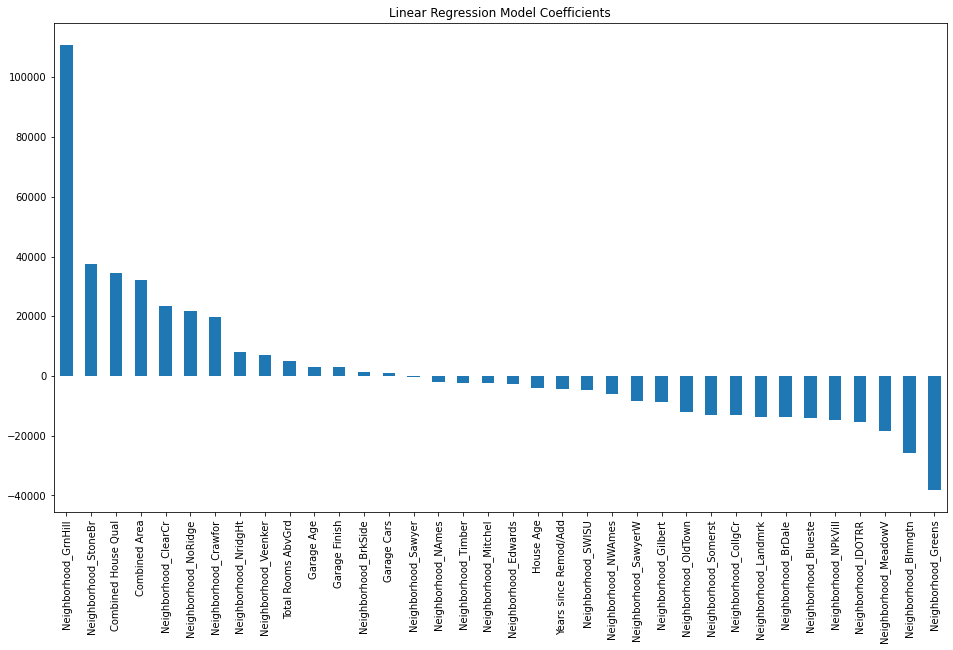

In [119]:
plt.figure(figsize=(16,9))
plt.title('Linear Regression Model Coefficients', fontsize=12)
pd.Series(lr.coef_, index=X_train_combined.columns).sort_values(ascending=False).plot.bar()

plt.show()

The linear regression model does have a relatively low RMSE score of around 28000. However, upon closer inspection of the model coefficients, one particular feature stood out - 'Neighborhood_GrnHill'. This is unlikely to be accurate as we do expect other features such as the combined house quality and combined area to be a stronger predictor of sale price. 

### 5.2 Ridge Regression

Thus, we will make use of regression with regularisation with the Ridge and Lasso Regression models. The model will be trained by performing 10-fold cross validation on the training set and predicting on the validation set. 

In [120]:
# Set alpha range
r_alphas = np.logspace(-5, 5, 200)

In [121]:
# Initialise RidgeCV and fit X_train
ridge_cv = RidgeCV(alphas=r_alphas, store_cv_values = True)          
ridge_cv.fit(X_train_combined, y_train)

RidgeCV(alphas=array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9.01101825e-05,
       1.01163798e-04, 1.13573336e-0...
       6.98587975e+03, 7.84282206e+03, 8.80488358e+03, 9.88495905e+03,
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
        store_cv_values=True)

In [122]:
# Scoring between training set and validation set 
optimal_ridge_alpha = ridge_cv.alpha_
optimal_ridge_alpha
ridge = Ridge(alpha=optimal_ridge_alpha)
ridge.fit(X_train_combined, y_train)
ridge_pred = ridge.predict(X_val_combined)

In [123]:
# cross validation 
ridge_cv_rmse = (-cross_val_score(ridge, X_train_combined, y_train, cv=10, scoring='neg_mean_squared_error').mean()) ** 0.5 
ridge_rmse = (metrics.mean_squared_error(y_true=y_val, y_pred=ridge_pred)) ** 0.5

print(f"Ridge RMSE of training set: {ridge_cv_rmse}")
print(f"Ridge RMSE of validation set: {ridge_rmse}")

Ridge RMSE of training set: 27958.05569177426
Ridge RMSE of validation set: 28803.697752580156


The ridge regression model performs slightly better on the training set but there is also a slightly larger RMSE on the validation set.

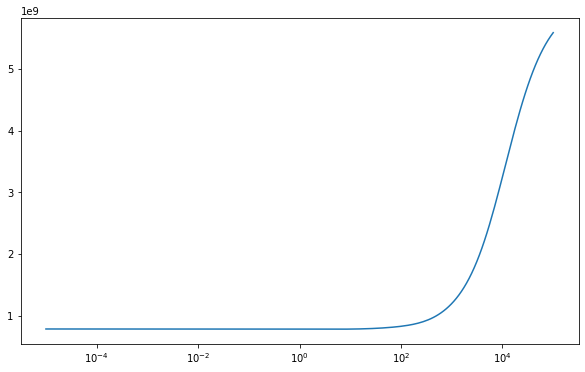

In [124]:
ridge_cv_means = [np.mean(cv_mse) for cv_mse in ridge_cv.cv_values_.T]

fig = plt.figure(figsize=(10,6))
ax = plt.gca()
ax.semilogx(ridge_cv.alphas, list((ridge_cv_means))) # reverse list if needed
plt.show()

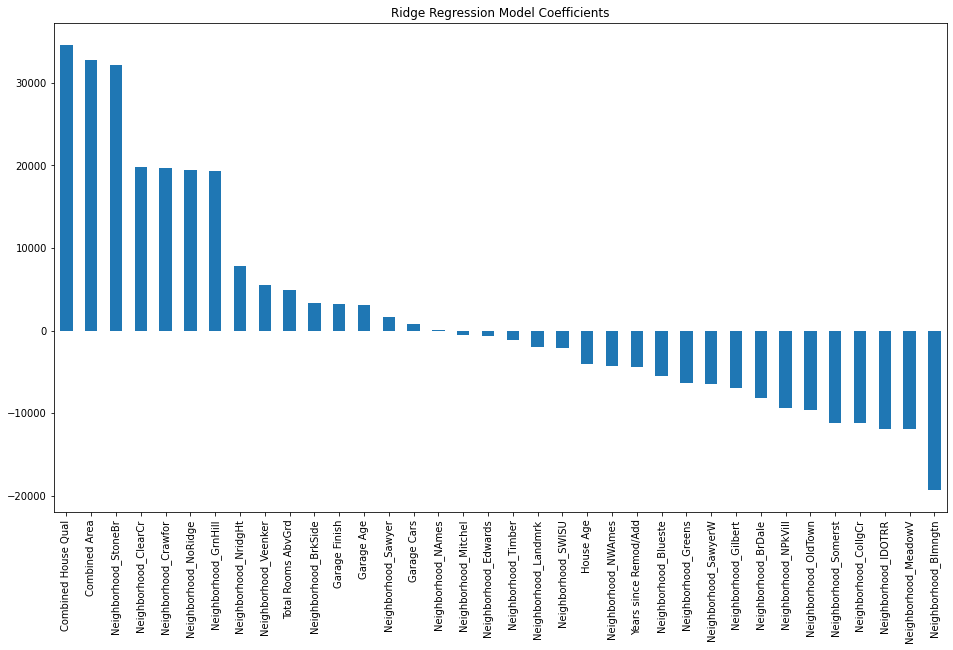

In [125]:
plt.figure(figsize=(16,9))
plt.title('Ridge Regression Model Coefficients', fontsize=12)
pd.Series(ridge.coef_, index=X_train_combined.columns).sort_values(ascending=False).plot.bar()

plt.show()

From the plot above, the best predictors of sale price are the combined house quality, combined area and the neighborhood stone brook. However, we do note that the overall coefficients for all these features are extremely high (10000+), indicating that their impact on the sale price is significant. 

### 5.3 Lasso Regression (L1)

In [126]:
# Instantiate LassoCV 
lasso_cv = LassoCV(n_alphas=1000, cv=10, max_iter=100000)
lasso_cv.fit(X_train_combined, y_train)

LassoCV(cv=10, max_iter=100000, n_alphas=1000)

In [127]:
# Instantiate Lasso model with optimal alpha 
optimal_lasso_alpha = lasso_cv.alpha_
lasso = Lasso(alpha=optimal_lasso_alpha)
lasso.fit(X_train_combined, y_train)
lasso_pred = lasso.predict(X_val_combined)

In [128]:
# Cross validate 
lasso_cv_rmse = (-cross_val_score(lasso, X_train_combined, y_train, cv=10, scoring='neg_mean_squared_error').mean()) ** 0.5
lasso_rmse = (metrics.mean_squared_error(y_true=y_val, y_pred=lasso_pred)) ** 0.5

print(f"Lasso RMSE of training set: {lasso_cv_rmse}")
print(f"Lasso RMSE of validation set is: {lasso_rmse}")

Lasso RMSE of training set: 28047.730151205702
Lasso RMSE of validation set is: 28848.08814436525


The lasso regression model performs similar to the linear regression model on the training set, but similar to the ridge model on the validation set. 

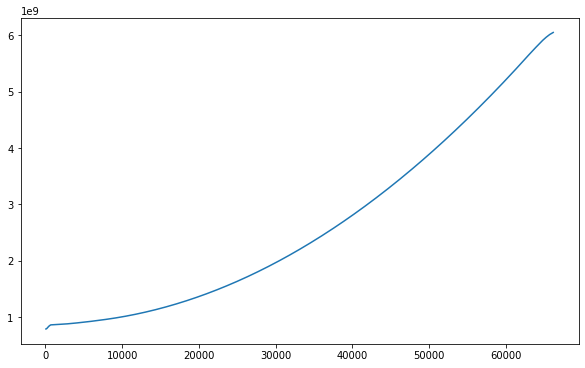

In [129]:
lasso_cv_means = [np.mean(lasso_mse) for lasso_mse in lasso_cv.mse_path_]
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(lasso_cv.alphas_, list(lasso_cv_means))
plt.show()

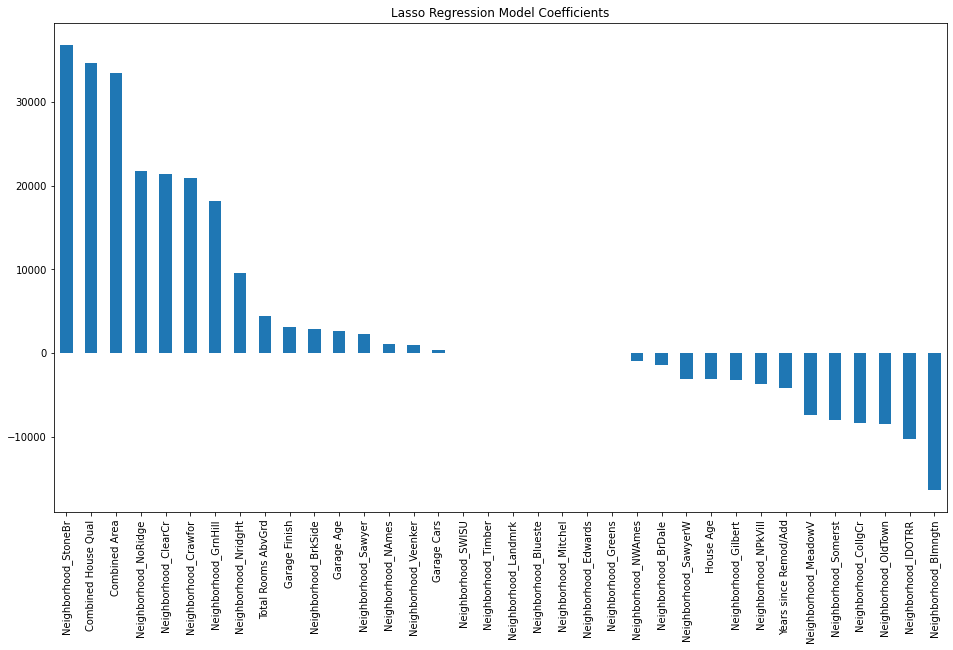

In [130]:
plt.figure(figsize=(16,9))
plt.title('Lasso Regression Model Coefficients', fontsize=12)
pd.Series(lasso.coef_, index=X_train_combined.columns).sort_values(ascending=False).plot.bar()

plt.show()

In [131]:
lasso_coeffs = pd.Series(lasso.coef_, index = X_train_combined.columns)
print("Lasso picked", sum(lasso_coeffs != 0),"features and zero-ed out the other",sum(lasso_coeffs == 0),"features.")

Lasso picked 29 features and zero-ed out the other 7 features.


From the lasso model coefficients plot above, the best predictors of sale price are the the neighborhood stone brook, combined house quality and combined area. Similar to the ridge regression, we do note that the overall coefficients for all these features are extremely high (10000+), indicating that their impact on the sale price is significant.

The lasso model has also zeroed out 7 features pertaining to the neighborhoods and the garage cars. 

### 5.4 Evaluation of Best Model

Due to the sheer number of features removed before the modelling process, the lasso model may be limited in its effectiveness in being the best predictor of sale price. 

Thus we will be using the ridge regression model as it has the lowest RMSE among the 3 models tested. 

In [132]:
rmse_improvement = round(((baseline_rmse - ridge_rmse) / baseline_rmse) * 100, 2)
print(f"The ridge model showed a {rmse_improvement}% over the baseline RMSE.")

The ridge model showed a 63.68% over the baseline RMSE.


In [133]:
ridge_train_pred = ridge.predict(X_train_combined)

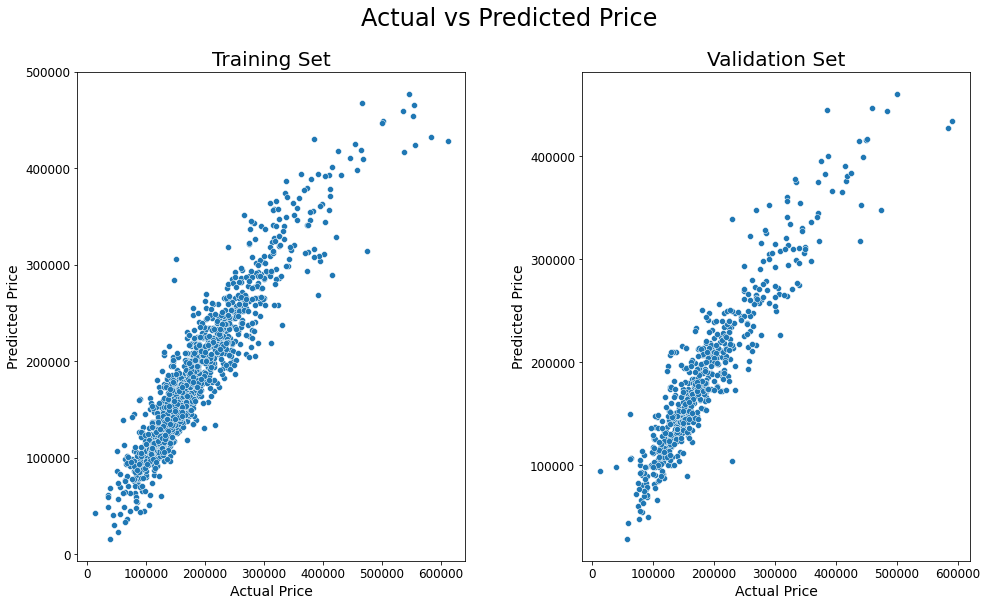

In [134]:
#Scatter plot of actual vs predicted price for test and validation sets.
plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3)

plt.suptitle("Actual vs Predicted Price", size=24)

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=ridge_train_pred)
plt.xlabel('Actual Price', size=14)
plt.ylabel('Predicted Price', size=14)
plt.title('Training Set', size=20)
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val, y=ridge_pred)
plt.xlabel('Actual Price', size=14)
plt.ylabel('Predicted Price', size=14)
plt.title('Validation Set', size=20)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

The above scatter plots reveal that the predictions of the model are close to the actual prices. There is a strong positive linear relationship, especially for the heavy concentration of data points where prices were below $300,000. 

However, we do see the less accurate predictions for homes whose actual price is above $300,000.

In [135]:
#Calculating residuals to look for scatter plot analysis
residuals_train = y_train - ridge_train_pred
residuals_val = y_val - ridge_pred

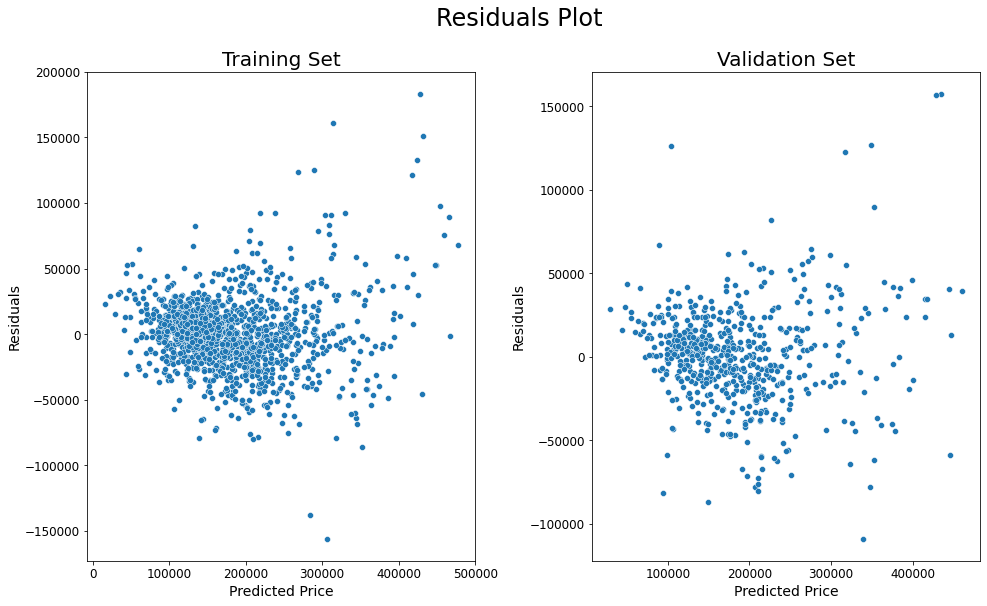

In [136]:
#Scatter plot of residuals for test and validation sets.
plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3)

plt.suptitle("Residuals Plot", size=24)
plt.subplot(1, 2, 1)
sns.scatterplot(x=ridge_train_pred, y=residuals_train)
plt.xlabel('Predicted Price', size=14)
plt.ylabel('Residuals', size=14)
plt.title('Training Set', size=20)
plt.xticks(size=12)
plt.yticks(size=12)


plt.subplot(1, 2, 2)
sns.scatterplot(x=ridge_pred, y=residuals_val)
plt.xlabel('Predicted Price', size=14)
plt.ylabel('Residuals', size=14)
plt.title('Validation Set', size=20)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

The residuals for the training set are more centered around 0 while the validation test set errors are slightly more heteroscedastic. 

In [137]:
ridge_coeffs = pd.DataFrame(ridge.coef_, columns=['Coeff'])
ridge_coeffs['Feature'] = X_train_combined.columns
ridge_coeffs['Abs Coeff'] = np.abs(ridge_coeffs['Coeff'])
ridge_coeffs.sort_values(by = 'Coeff', ascending = False).head(10)

Coeff               Feature     Abs Coeff
5   34555.735960   Combined House Qual  34555.735960
0   32833.354819         Combined Area  32833.354819
33  32177.029688  Neighborhood_StoneBr  32177.029688
12  19852.422848  Neighborhood_ClearCr  19852.422848
14  19674.624249  Neighborhood_Crawfor  19674.624249
26  19447.482008  Neighborhood_NoRidge  19447.482008
18  19331.215307  Neighborhood_GrnHill  19331.215307
27   7817.397084  Neighborhood_NridgHt   7817.397084
35   5494.588526  Neighborhood_Veenker   5494.588526
4    4968.619067    Total Rooms AbvGrd   4968.619067

In [138]:
# top / bottom 10 ridge coefficients
top_coeffs = ridge_coeffs[['Coeff', 'Feature']].sort_values('Coeff',ascending = False)[:10]
bottom_coeffs = ridge_coeffs[['Coeff', 'Feature']].sort_values('Coeff',ascending = False)[-10:]
combined_coeffs = pd.concat([top_coeffs, bottom_coeffs])
combined_coeffs

Coeff               Feature
5   34555.735960   Combined House Qual
0   32833.354819         Combined Area
33  32177.029688  Neighborhood_StoneBr
12  19852.422848  Neighborhood_ClearCr
14  19674.624249  Neighborhood_Crawfor
26  19447.482008  Neighborhood_NoRidge
18  19331.215307  Neighborhood_GrnHill
27   7817.397084  Neighborhood_NridgHt
35   5494.588526  Neighborhood_Veenker
4    4968.619067    Total Rooms AbvGrd
31  -6503.027352  Neighborhood_SawyerW
16  -6944.331435  Neighborhood_Gilbert
10  -8203.890949   Neighborhood_BrDale
24  -9399.983511  Neighborhood_NPkVill
28  -9658.053563  Neighborhood_OldTown
32 -11167.495965  Neighborhood_Somerst
13 -11224.039024  Neighborhood_CollgCr
19 -11937.263344   Neighborhood_IDOTRR
21 -11958.321287  Neighborhood_MeadowV
8  -19304.791936  Neighborhood_Blmngtn

From the above tables detailing the top and bottom ridge coefficients, we note that the coefficients are actually still extremely high. 

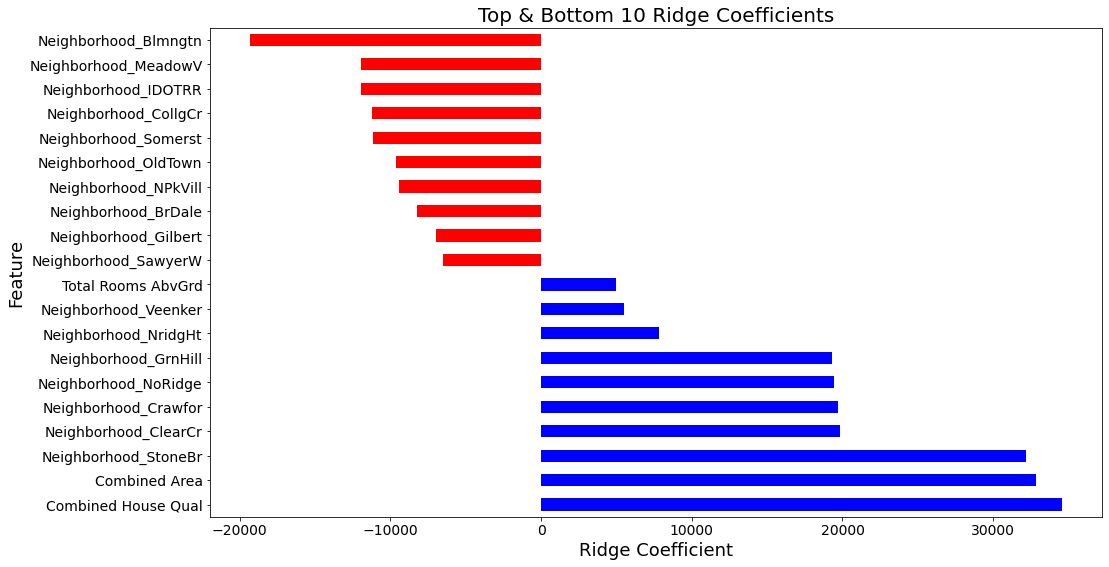

In [139]:
# Bar chart showing top/bottom 10 ridge coefficients.

colors = ['red' if c < 0 else 'blue' for c in combined_coeffs['Coeff']]

combined_coeffs.plot(kind='barh', x='Feature', y='Coeff', color=colors, legend=False, figsize=(16,9))
plt.xlabel('Ridge Coefficient', size=18)
plt.ylabel('Feature', size=18)
plt.title('Top & Bottom 10 Ridge Coefficients', size=20)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

As mentioned above in the ridge regression section, the top predictors of sale price were the combined house quality, combined area and neighborhood stone brook. However, we do note that a significant number of the best and worst performing coefficients were related to the neighborhoods. 

This indicates that too many features may have been cleared out during the EDA process, resulting in a lack of variety for the model to run on. 

### 5.5 Fitting Optimal Model on Entire Training Set 

In this section, the ridge model will be run on the entire training set. First we need to scale the continuous features.

In [140]:
X_train_combined.head()

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0      -0.169636  -0.886443   -0.815986              -0.662176   
1       0.480019  -1.184007   -1.150116              -1.092036   
2      -0.512323   1.626317   -0.741735               1.534886   
3       0.012312  -1.084819   -1.038740              -0.948749   
4      -0.185263   0.237687    0.446284               0.961739   

   Total Rooms AbvGrd  Combined House Qual  Garage Finish  Garage Cars  \
0           -0.625863            -0.123887            3.0          2.0   
1            0.788246             1.724523            3.0          2.0   
2            0.316876            -0.820264            1.0          1.0   
3            0.788246             0.641269            3.0          2.0   
4           -0.625863            -0.704201            1.0          2.0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    1   
3                    0                     0                    0   
4                    0                     0                    0   

   Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   1                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2   

In [141]:
y_full_train = df["SalePrice"]
X_full_train = df.iloc[:, 2:].drop(columns=['SalePrice'])

In [142]:
X_full_train[features_to_scale]

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0            2679.0         34        34.0                      5   
1            3594.0         13        12.0                     12   
2            2360.0         57        57.0                      3   
3            2228.0          4         3.0                      3   
4            2605.0        110        53.0                     17   
...             ...        ...         ...                    ...   
2046         4132.0          1         1.0                      1   
2047         2261.0         69        48.0                     59   
2048         3151.0         81        80.0                     59   
2049         2694.0         53        53.0                     53   
2050         3240.0         11        11.0                     11   

      Total Rooms AbvGrd  Combined House Qual  
0                      9                288.0  
1                     11                448.0  
2                      6                180.0  
3                     10                180.0  
4                      8                108.0  
...                  ...                  ...  
2046                   9                512.0  
2047                   5                108.0  
2048                  11                162.0  
2049                   7                108.0  
2050                  10                252.0  

[2049 rows x 6 columns]

In [143]:
ss = StandardScaler()
X_full_scaled = ss.fit_transform(X_full_train[features_to_scale])

In [144]:
# Convert FULL X training set to dataframe
X_full_scaled = pd.DataFrame(X_full_scaled, columns=features_to_scale)
X_full_scaled.head()

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0      -0.377571  -0.069626    0.105226              -0.885658   
1       0.631898  -0.765064   -0.720429              -0.552517   
2      -0.729506   0.692044    0.968412              -0.980841   
3      -0.875134  -1.063109   -1.058198              -0.980841   
4      -0.459211   2.447196    0.818293              -0.314559   

   Total Rooms AbvGrd  Combined House Qual  
0            0.296373            -0.064481  
1            1.246716             0.616687  
2           -1.129141            -0.524269  
3            0.771545            -0.524269  
4           -0.178798            -0.830794

In [145]:
X_full_train.update(X_full_scaled)
X_full_train

Garage Finish  Garage Cars  Combined Area  House Age  Garage Age  \
0               2.0          2.0      -0.377571  -0.069626    0.105226   
1               2.0          2.0       0.631898  -0.765064   -0.720429   
2               1.0          1.0      -0.729506   0.692044    0.968412   
3               3.0          2.0      -0.875134  -1.063109   -1.058198   
4               1.0          2.0      -0.459211   2.447196    0.818293   
...             ...          ...            ...        ...         ...   
2046            3.0          2.0       0.143161   1.486830    1.831597   
2047            1.0          2.0      -0.361022   0.559579    0.818293   
2048            1.0          2.0       0.241349  -0.831296   -0.757959   
2049            1.0          1.0    2694.000000  53.000000   53.000000   
2050            3.0          2.0    3240.000000  11.000000   11.000000   

      Years since Remod/Add  Total Rooms AbvGrd  Combined House Qual  \
0                 -0.885658            0.296373            -0.064481   
1                 -0.552517            1.246716             0.616687   
2                 -0.980841           -1.129141            -0.524269   
3                 -0.980841            0.771545            -0.524269   
4                 -0.314559           -0.178798            -0.830794   
...                     ...                 ...                  ...   
2046               1.684285            1.246716            -0.600900   
2047               1.398736           -0.653970            -0.830794   
2048              -0.600109            0.771545            -0.217743   
2049              53.000000            7.000000           108.000000   
2050              11.000000           10.000000           252.000000   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
2046                     0                     0                    0   
2047                     0                     0                    0   
2048                     0                     0                    0   
2049                     0                     0                    0   
2050                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2046                     0                     0                     0   
2047                     0                     0                     0   
2048                     0                     0                     0   
2049                     0                     0                     0   
2050                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                

In [146]:
# ensure columns are in same order
X_full_train = X_full_train[column_list]
X_full_train

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0         -0.377571  -0.069626    0.105226              -0.885658   
1          0.631898  -0.765064   -0.720429              -0.552517   
2         -0.729506   0.692044    0.968412              -0.980841   
3         -0.875134  -1.063109   -1.058198              -0.980841   
4         -0.459211   2.447196    0.818293              -0.314559   
...             ...        ...         ...                    ...   
2046       0.143161   1.486830    1.831597               1.684285   
2047      -0.361022   0.559579    0.818293               1.398736   
2048       0.241349  -0.831296   -0.757959              -0.600109   
2049    2694.000000  53.000000   53.000000              53.000000   
2050    3240.000000  11.000000   11.000000              11.000000   

      Total Rooms AbvGrd  Combined House Qual  Garage Finish  Garage Cars  \
0               0.296373            -0.064481            2.0          2.0   
1               1.246716             0.616687            2.0          2.0   
2              -1.129141            -0.524269            1.0          1.0   
3               0.771545            -0.524269            3.0          2.0   
4              -0.178798            -0.830794            1.0          2.0   
...                  ...                  ...            ...          ...   
2046            1.246716            -0.600900            3.0          2.0   
2047           -0.653970            -0.830794            1.0          2.0   
2048            0.771545            -0.217743            1.0          2.0   
2049            7.000000           108.000000            1.0          1.0   
2050           10.000000           252.000000            3.0          2.0   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
2046                     0                     0                    0   
2047                     0                     0                    0   
2048                     0                     0                    0   
2049                     0                     0                    0   
2050                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2046                     0                     0                     0   
2047                     0                     0                     0   
2048                     0                     0                     0   
2049                     0                     0                     0   
2050                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                

#### Ridge Model on Full Training Set

In [147]:
production_model = ridge
production_model.fit(X_full_train, y)  

Ridge(alpha=4.768611697714475)

In [148]:
y_val_pred = production_model.predict(X_val_combined)
metrics.mean_squared_error(y_val, y_val_pred) ** 0.5

44113.57414066199

## 6. Test Set Data Cleaning

Before predicting on our test set, the same data cleaning measures and feature engineering steps will be applied.

In [149]:
df_test = pd.read_csv("../datasets/test.csv")
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [150]:
df_test.shape

(879, 80)

### 6.1 Check for Null Values

In [151]:
print(df_test.isna().values.any())
print(df_test.isna().values.mean())

True
0.05937144482366325


In [152]:
# Get features with nan values 
# Make list of features which have missing values 
test_features_with_na = [feature for feature in df_test.columns if df_test[feature].isna().values.sum() > 0]
test_features_dropped = []
# Find proportion of missing values in each feature
for feature in test_features_with_na: 
    percentage_missing = round(df_test[feature].isnull().mean()*100, 2)
    print(f"{feature}, {percentage_missing}% -> proportion of values missing")
    if percentage_missing > 40.0: 
        test_features_dropped.append(feature)
test_features_dropped

Lot Frontage, 18.2% -> proportion of values missing
Alley, 93.4% -> proportion of values missing
Mas Vnr Type, 0.11% -> proportion of values missing
Mas Vnr Area, 0.11% -> proportion of values missing
Bsmt Qual, 2.84% -> proportion of values missing
Bsmt Cond, 2.84% -> proportion of values missing
Bsmt Exposure, 2.84% -> proportion of values missing
BsmtFin Type 1, 2.84% -> proportion of values missing
BsmtFin Type 2, 2.84% -> proportion of values missing
Electrical, 0.11% -> proportion of values missing
Fireplace Qu, 48.01% -> proportion of values missing
Garage Type, 5.01% -> proportion of values missing
Garage Yr Blt, 5.12% -> proportion of values missing
Garage Finish, 5.12% -> proportion of values missing
Garage Qual, 5.12% -> proportion of values missing
Garage Cond, 5.12% -> proportion of values missing
Pool QC, 99.54% -> proportion of values missing
Fence, 80.43% -> proportion of values missing
Misc Feature, 95.34% -> proportion of values missing


['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

In this test set, we look at the NaN proportions by features and similar to our training data set, features with more than 40% missing values will be dropped. 

In [153]:
df_test.shape

(879, 80)

In [154]:
# create list of numerical variables
test_numerical_variables = [feature for feature in df_test.columns if df_test[feature].dtypes != "O"]
print(f"No. of test numerical variables = {len(test_numerical_variables)}")

No. of test numerical variables = 38


In [155]:
# create list of categorical variables
test_categorical_variables = [feature for feature in df_test.columns if feature not in test_numerical_variables]
test_categorical_variables

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

### 6.2 Numerical Variables

With the 3 data types (object, int, float) in the housing data set, we first split them up into numerical and non-numerical variables by considering only integer and floats data types. Numerical variables will be further sub-divided into continuous, discrete and temporal (year) variables 

In [156]:
# Missing numerical variables 
df_test[test_numerical_variables].isnull().sum().sort_values(ascending=False)

Lot Frontage       160
Garage Yr Blt       45
Mas Vnr Area         1
Id                   0
Wood Deck SF         0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Open Porch SF        0
Full Bath            0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Half Bath            0
Bsmt Half Bath       0
PID                  0
BsmtFin SF 1         0
MS SubClass          0
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
BsmtFin SF 2         0
Bsmt Full Bath       0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Yr Sold              0
dtype: int64

#### Observations: 

3 features here contain null variables and we need to explore the meaning behind them by looking through the data dictionary.

- Lot Frontage: Represents linear feet of street connected to property, NA most likely means there is no street connected to the property and should be replaced with 0
- Garage Yr Blt: Represents year garage was built, NA most likely means the house has no garage. 
- Mas Vnr Area: Represents year garage was built, NA most likely means the house has no garage and should be replaced with 0

With this in mind, we'll replace all null values with 0.

In [157]:
df_test[['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']] = df_test[['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']].fillna(0)

In [158]:
df_test[test_numerical_variables].isnull().sum().sort_values(ascending=False)

Id                 0
Garage Area        0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Wood Deck SF       0
PID                0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Full Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Yr Sold            0
dtype: int64

Now we will combine and rename the relevant features the same way we did for the training set 

#### Temporal variables 

In [159]:
test_temporal_variables = [feature for feature in test_numerical_variables if "Yr" in feature or "Year" in feature]
test_temporal_variables

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

In [160]:
df_test[test_temporal_variables].describe()

Year Built  Year Remod/Add  Garage Yr Blt      Yr Sold
count   879.000000      879.000000     879.000000   879.000000
mean   1970.533561     1984.444824    1875.594994  2007.824801
std      30.403527       20.454546     436.640608     1.327396
min    1880.000000     1950.000000       0.000000  2006.000000
25%    1954.000000     1967.000000    1957.000000  2007.000000
50%    1972.000000     1992.000000    1977.000000  2008.000000
75%    2000.000000     2003.000000    2000.000000  2009.000000
max    2010.000000     2010.000000    2010.000000  2010.000000

In [161]:
renamed_test_temporal_variables = ['House Age', 'Garage Age', 'Years since Remod/Add']
df_test['House Age'] = df_test['Yr Sold'] - df_test['Year Built']
df_test['Garage Age'] = df_test['Yr Sold'] - df_test['Garage Yr Blt']
df_test['Years since Remod/Add']  = df_test['Yr Sold'] - df_test['Year Remod/Add']

In [162]:
df_test[test_temporal_variables].head()

Year Built  Year Remod/Add  Garage Yr Blt  Yr Sold
0        1910            1950         1910.0     2006
1        1977            1977         1977.0     2006
2        2006            2006         2006.0     2006
3        1923            2006         1935.0     2007
4        1963            1963         1963.0     2009

In [163]:
test_removed_temporal_variables = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

#### Discrete variables

In [164]:
test_discrete_variables = [feature for feature in test_numerical_variables if df_test[feature].nunique() < 25 and feature not in test_temporal_variables+['Id']+['PID']]
print(f"No. of discrete variables = {len(discrete_variables)}")

No. of discrete variables = 14


In [165]:
test_discrete_variables

['MS SubClass',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 '3Ssn Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold']

In [166]:
# Combine bedrooms and bathrooms above grade. 
df_test['Total Rooms AbvGrd'] = df_test['TotRms AbvGrd'] + df_test['Full Bath'] + df_test['Half Bath']
df_test['Total Rooms AbvGrd'].describe()

count    879.000000
mean       8.400455
std        2.194692
min        4.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       16.000000
Name: Total Rooms AbvGrd, dtype: float64

In [167]:
# We only kept the combined features and garage cars in the test set 
test_removed_discrete_variables = []
for feature in test_discrete_variables:
    if feature == 'Garage Cars':
        pass
    else:
        test_removed_discrete_variables.append(feature)
test_removed_discrete_variables

['MS SubClass',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 '3Ssn Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold']

#### Continuous variables

In [168]:
test_continuous_variables = [feature for feature in test_numerical_variables if feature not in test_temporal_variables+test_discrete_variables+['Id']+['PID']]
test_continuous_variables

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch']

In [169]:
# Total built up area of house, including Gr Liv Area, Basement and garage area

df_test['Combined Area'] = df_test['Gr Liv Area'] + df_test['Total Bsmt SF'] + df_test['Garage Area']
df_test['Combined Area'].describe()

count     879.000000
mean     3008.114903
std       928.772376
min       912.000000
25%      2352.000000
50%      2892.000000
75%      3516.000000
max      8698.000000
Name: Combined Area, dtype: float64

As noted in our training set, the only continuous variables kept were the combined area and saleprice (the latter is not relevant in this case). Thus we will now add the continuous variables to our list for removal.

In [170]:
# for feature in test_continuous_variables:
#     test_removed_continuous_variables.append(feature)
test_removed_continuous_variables = test_continuous_variables

In [171]:
test_features_dropped.extend(test_removed_temporal_variables)
test_features_dropped.extend(test_removed_discrete_variables)
test_features_dropped.extend(test_removed_continuous_variables)

### 6.3 Categorical Variables

#### Missing values in categorical variables

In [172]:
df_test[test_categorical_variables].isnull().sum().sort_values(ascending=False)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Garage Cond        45
Garage Qual        45
Garage Finish      45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
Electrical          1
Mas Vnr Type        1
Functional          0
Kitchen Qual        0
Central Air         0
Heating QC          0
Heating             0
Paved Drive         0
MS Zoning           0
Street              0
Condition 2         0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Bldg Type           0
Foundation          0
House Style         0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Exter Qual          0
Exter Cond          0
Sale Type           0
dtype: int64

#### Observations
10 of the features here contain null variables and we need to explore the meaning behind them by looking through the data dictionary.  

- Garage Finish: Represents interior finish of garage, NA means no garage 
- Garage Cond: Represents garage condition, NA means no garage.
- Garage Qual: Represents garage quality, NA means no garage
- Garage Type: Represents garage location, NA means no garage
- Bsmt Exposure: Represents walkout or garden level basement walls, NA means no basement
- BsmtFin Type 2: Represents quality of second finished area (if present), NA means no basement
- Bsmt Cond: Represents condition of basement, NA means no basement
- BsmtFin Type 1: Represents quality of basement finished area, NA means no basement
- Bsmt Qual: Represents height  of basement, NA means no basement
- Electrical: Represents electrical system, NA has no interpretation
- Mas Vnr Type: Represents masonry veneer type, NA means 0 


In [173]:
# test_features_dropped = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
for feature in test_features_dropped:
    if feature in test_categorical_variables:
        test_categorical_variables.remove(feature)
len(test_categorical_variables)

37

There is a null value in the 'Electrical' feature which didn't occur in the original training set, so we need to determine why. 

For the remaining 10 columns dealing with the specifics of the garage, basement, and masonry veneer type, NaN values will be filled with '0' just like in our training set. 

In [174]:
df_test[df_test['Electrical'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
635  1578  916386080           80        RL          73.0      9735   Pave   

    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
635   NaN       Reg          Lvl    AllPub     Inside        Gtl       Timber   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
635        Norm        Norm      1Fam        SLvl             5             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
635        2006            2007      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
635      VinylSd         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
635        Gd        TA            No            Unf             0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
635            Unf             0          384            384    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
635         Gd           Y        NaN         754         640   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
635                0         1394               0               0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
635          1              3              1           Gd              7   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
635        Typ           0          NaN     BuiltIn         2007.0   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
635           Fin            2          400          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
635           Y           100              0               0           0   

     Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
635             0          0     NaN   NaN          NaN         0        5   

     Yr Sold Sale Type  House Age  Garage Age  Years since Remod/Add  \
635     2008       WD           2         1.0                      1   

     Total Rooms AbvGrd  Combined Area  
635                  10           2178

In [175]:
df_test['Electrical'].mode()

0    SBrkr
dtype: object

By looking at the features of this particular house, we do see that this house has both central air conditioning and heating, thus it must have some form of electrical system. Thus we will impute this value with the mode of the data set. 

In [176]:
df_test.loc[635, 'Electrical'] = 'SBrkr'

In [177]:
df_test.loc[635, 'Electrical']

'SBrkr'

In [178]:
# Fill NaN with 0 
df_test[test_categorical_variables] = df_test[test_categorical_variables].fillna(0)

In [179]:
df_test[test_categorical_variables].isnull().sum().sort_values(ascending=False)

MS Zoning         0
Foundation        0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Bsmt Qual         0
Exter Cond        0
Street            0
Exter Qual        0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Sale Type         0
dtype: int64

In [180]:
print(len(categorical_variables))

37


#### Ordinal Variables

In [181]:
# We can further sub-divide categorical variables into nominal and ordinal variables 
test_nominal_variables = ['MS Zoning', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Street', 'Land Contour',
                      'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 
                     'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Sale Type']
len(test_nominal_variables)

19

In [182]:
test_ordinal_variables = []
for feature in test_categorical_variables:
    if feature not in test_nominal_variables:
        test_ordinal_variables.append(feature)
print(len(test_ordinal_variables))
test_ordinal_variables

18


['Lot Shape',
 'Utilities',
 'Land Slope',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

With ordinal variables, we assign values according to their descriptions
i.e external quality: Po, Fa, Ta, Gd, Ex -> convert to a scale of 1-5 

In [183]:
# Create dictionary of ordinal variables
test_ord_dict = {'Lot Shape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, 
            'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
            'Land Slope': {'Sev': 1, 'Mod': 2, 'Gtl': 3}, 
            'Exter Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Exter Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Bsmt Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Bsmt Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Bsmt Exposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
            'BsmtFin Type 1': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
            'BsmtFin Type 2': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
            'Heating QC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}, 
            'Kitchen Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
            'Garage Finish': {'Unf': 1, 'RFn': 2, 'Fin': 3},
            'Garage Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Garage Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Paved Drive': {'N': 1, 'P': 2, 'Y': 3}
}

In [184]:
# map to each ordinal variable in the dataframe
for feature in df_test[test_ordinal_variables]:
    df_test[feature] = df_test[feature].map(test_ord_dict[feature])

In [185]:
df_test[test_ordinal_variables].head()

Lot Shape  Utilities  Land Slope  Exter Qual  Exter Cond  Bsmt Qual  \
0          4          4           3           3           2        2.0   
1          3          4           3           3           3        4.0   
2          3          4           3           4           3        4.0   
3          4          4           3           4           3        3.0   
4          3          4           3           3           3        4.0   

   Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Heating QC  \
0        3.0            1.0             1.0             1.0           4   
1        3.0            1.0             1.0             1.0           3   
2        4.0            3.0             6.0             1.0           5   
3        3.0            1.0             1.0             1.0           3   
4        3.0            1.0             4.0             1.0           4   

   Electrical  Kitchen Qual  Functional  Garage Finish  Garage Qual  \
0           2             2           8            1.0          1.0   
1           5             3           8            3.0          3.0   
2           5             4           8            2.0          3.0   
3           5             3           8            1.0          2.0   
4           5             3           8            2.0          3.0   

   Garage Cond  Paved Drive  
0          1.0            3  
1          3.0            3  
2          3.0            3  
3          3.0            1  
4          3.0            3

In [186]:
df_test[test_ordinal_variables].dtypes

Lot Shape           int64
Utilities           int64
Land Slope          int64
Exter Qual          int64
Exter Cond          int64
Bsmt Qual         float64
Bsmt Cond         float64
Bsmt Exposure     float64
BsmtFin Type 1    float64
BsmtFin Type 2    float64
Heating QC          int64
Electrical          int64
Kitchen Qual        int64
Functional          int64
Garage Finish     float64
Garage Qual       float64
Garage Cond       float64
Paved Drive         int64
dtype: object

In [187]:
df_test[test_ordinal_variables] = df_test[test_ordinal_variables].fillna(0)

In [188]:
df_test[test_ordinal_variables].isnull().sum().sort_values(ascending=False)

Lot Shape         0
Utilities         0
Garage Cond       0
Garage Qual       0
Garage Finish     0
Functional        0
Kitchen Qual      0
Electrical        0
Heating QC        0
BsmtFin Type 2    0
BsmtFin Type 1    0
Bsmt Exposure     0
Bsmt Cond         0
Bsmt Qual         0
Exter Cond        0
Exter Qual        0
Land Slope        0
Paved Drive       0
dtype: int64

In [189]:
# Combine features with above 0.6 coefficient
df_test['Combined House Qual'] = df_test['Overall Qual'] * df_test['Exter Qual'] * df_test['Bsmt Qual'] * df_test['Kitchen Qual']
df_test['Combined House Qual'].describe()

count     879.000000
mean      291.350398
std       227.065498
min         0.000000
25%       135.000000
50%       189.000000
75%       448.000000
max      1250.000000
Name: Combined House Qual, dtype: float64

In [190]:
test_removed_ordinal_variables = []
for feature in test_ordinal_variables: 
    if feature == 'Garage Finish':
        pass
    else: 
        test_removed_ordinal_variables.append(feature)
len(test_removed_ordinal_variables)

17

In [191]:
test_removed_ordinal_variables

['Lot Shape',
 'Utilities',
 'Land Slope',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

In [192]:
test_features_dropped.extend(test_removed_ordinal_variables)

#### Nominal Variables

In the training set, we removed all nominal variables except for the 'Neighborhood' column, which we used one hot encoding for.

In [193]:
df_test[test_nominal_variables].head()

MS Zoning Foundation Heating Central Air Garage Type Street Land Contour  \
0        RM      Stone    GasA           N      Detchd   Pave          Lvl   
1        RL     CBlock    GasA           Y      Attchd   Pave          Lvl   
2        RL      PConc    GasA           Y      Attchd   Pave          Lvl   
3        RM     CBlock    GasA           Y      Detchd   Pave          Lvl   
4        RL     CBlock    GasA           Y      Attchd   Pave          Lvl   

  Lot Config Neighborhood Condition 1 Condition 2 Bldg Type House Style  \
0     Inside      OldTown        Norm        Norm    2fmCon      2Story   
1     Inside       Sawyer        Norm        Norm    Duplex      1Story   
2     Inside      Gilbert        Norm        Norm      1Fam      2Story   
3     Inside      OldTown        Norm        Norm      1Fam      1Story   
4     Inside        NAmes        Norm        Norm      1Fam      1Story   

  Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Sale Type  
0      Gable   CompShg      AsbShng      AsbShng         None       WD   
1      Gable   CompShg      Plywood      Plywood         None       WD   
2      Gable   CompShg      VinylSd      VinylSd         None       New  
3      Gable   CompShg      Wd Sdng      Wd Sdng         None       WD   
4      Gable   CompShg      Plywood      Plywood      BrkFace       WD

In [194]:
test_removed_nominal_variables = []
for feature in test_nominal_variables: 
    if feature == 'Neighborhood':
        pass
    else:
        test_removed_nominal_variables.append(feature)
test_removed_nominal_variables

['MS Zoning',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Sale Type']

In [195]:
test_features_dropped.extend(test_removed_nominal_variables)

#### Dropping all features 

In [196]:
len(test_features_dropped)

75

In [197]:
df_test.drop(axis=1, columns=test_features_dropped, inplace=True)

Final features before one hot encoding: 
Neighborhood, Garage Finish, Garage Cars, House Age, Garage Age, Years since Remod/Add, Total Rooms AbvGrd, Combined Area, Combined House Qual

#### One Hot Encoding of Neighborhood

In [198]:
df_test = pd.get_dummies(df_test, columns=['Neighborhood'])

In [199]:
df_test.shape

(879, 36)

In [200]:
df.shape

(2049, 39)

The number of features in the test set and training set is different, so we need to identify which features exist in the training set but do not exist in the test set, and vice versa. 

In [201]:
missing_train_features_in_test = []
for feature in df.columns:
    if feature in df_test.columns: 
        pass
    else: 
        missing_train_features_in_test.append(feature)
missing_train_features_in_test

['SalePrice', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk']

In [202]:
missing_test_features = []
for test_feature in df_test.columns:
    if test_feature in df.columns: 
        pass
    else: 
        missing_test_features.append(test_feature)
missing_test_features

[]

Thus we need to add 'Neighborhood_GrnHill', 'Neighborhood_Landmrk' to the test set with '0' values throughout

In [203]:
df_to_add = pd.DataFrame(columns=['Neighborhood_GrnHill', 'Neighborhood_Landmrk'])
df_to_add

Empty DataFrame
Columns: [Neighborhood_GrnHill, Neighborhood_Landmrk]
Index: []

In [204]:
df_test_combined = pd.concat([df_test, df_to_add], axis=1)
df_test_combined

Id        PID  Garage Finish  Garage Cars  House Age  Garage Age  \
0    2658  902301120            1.0            1         96        96.0   
1    2718  905108090            3.0            2         29        29.0   
2    2414  528218130            2.0            2          0         0.0   
3    1989  902207150            1.0            2         84        72.0   
4     625  535105100            2.0            2         46        46.0   
..    ...        ...            ...          ...        ...         ...   
874  1662  527377110            1.0            2         33        33.0   
875  1234  535126140            2.0            2         42        42.0   
876  1373  904100040            1.0            1         40        40.0   
877  1672  527425140            1.0            2         36        33.0   
878  1939  535327160            1.0            1         52        52.0   

     Years since Remod/Add  Total Rooms AbvGrd  Combined Area  \
0                       56                  11           3388   
1                       29                  12           4514   
2                        0                  10           2576   
3                        1                   6           2416   
4                       46                   8           3302   
..                     ...                 ...            ...   
874                     33                  11           3449   
875                      9                  12           3572   
876                     40                   6           2485   
877                     36                   6           2256   
878                     52                   6           2238   

     Combined House Qual  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                   72.0                     0                     0   
1                  180.0                     0                     0   
2                  448.0                     0                     0   
3                  180.0                     0                     0   
4                  216.0                     0                     0   
..                   ...                   ...                   ...   
874                162.0                     0                     0   
875                288.0                     0                     0   
876                135.0                     0                     0   
877                108.0                     0                     0   
878                135.0                     0                     0   

     Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   
..                   ...                   ...                   ...   
874                    0                     0                     0   
875                    0                     0                     0   
876                    0                     0                     0   
877                    0                     0                     0   
878                    0                     0                     0   

     Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
..                    ...                   ...                   ...   
874                     0                     0                     0   
875        

In [205]:
df_test_combined.isnull().sum().sort_values(ascending=False)

Neighborhood_Landmrk     879
Neighborhood_GrnHill     879
Neighborhood_OldTown       0
Neighborhood_MeadowV       0
Neighborhood_Mitchel       0
Neighborhood_NAmes         0
Neighborhood_NPkVill       0
Neighborhood_NWAmes        0
Neighborhood_NoRidge       0
Neighborhood_NridgHt       0
Neighborhood_SWISU         0
PID                        0
Neighborhood_Sawyer        0
Neighborhood_SawyerW       0
Neighborhood_Somerst       0
Neighborhood_StoneBr       0
Neighborhood_Timber        0
Neighborhood_Veenker       0
Neighborhood_IDOTRR        0
Id                         0
Neighborhood_Gilbert       0
Neighborhood_Edwards       0
Garage Finish              0
Garage Cars                0
House Age                  0
Garage Age                 0
Years since Remod/Add      0
Total Rooms AbvGrd         0
Combined Area              0
Combined House Qual        0
Neighborhood_Blmngtn       0
Neighborhood_Blueste       0
Neighborhood_BrDale        0
Neighborhood_BrkSide       0
Neighborhood_C

Fill the 2 new columns with '0' as they are not represented on the test set

In [206]:
df_test_combined = df_test_combined.fillna(0)

In [207]:
df_test_combined.shape

(879, 38)

#### Saving cleaned test data set

In [208]:
df_test_combined.to_csv("../datasets/test_cleaned.csv", index=False)

## 7. Preprocessing Test Set Data

#### Scaling continuous variables

In [209]:
df_test_combined['Garage Age'].describe()

count     879.000000
mean      132.229807
std       436.714472
min         0.000000
25%         8.000000
50%        32.000000
75%        51.000000
max      2010.000000
Name: Garage Age, dtype: float64

In [210]:
features_to_scale

['Combined Area',
 'House Age',
 'Garage Age',
 'Years since Remod/Add',
 'Total Rooms AbvGrd',
 'Combined House Qual']

In [211]:
X_test_scaled = ss.transform(df_test_combined[features_to_scale])

In [212]:
df_test_scaled_features = pd.DataFrame(X_test_scaled, columns=features_to_scale)
df_test_scaled_features

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0         0.404630   1.983571    2.432074               1.541511   
1         1.646883  -0.235207   -0.082423               0.256539   
2        -0.491205  -1.195573   -1.170787              -1.123616   
3        -0.667724   1.586178    1.531359              -1.076024   
4         0.309751   0.327767    0.555584               1.065595   
..             ...        ...         ...                    ...   
874       0.471928  -0.102742    0.067697               0.446905   
875       0.607627   0.195302    0.405465              -0.695292   
876      -0.591600   0.129070    0.330405               0.780046   
877      -0.844243  -0.003394    0.067697               0.589680   
878      -0.864102   0.526463    0.780763               1.351145   

     Total Rooms AbvGrd  Combined House Qual  
0              1.246716            -0.984057  
1              1.721888            -0.524269  
2              0.771545             0.616687  
3             -1.129141            -0.524269  
4             -0.178798            -0.371006  
..                  ...                  ...  
874            1.246716            -0.600900  
875            1.721888            -0.064481  
876           -1.129141            -0.715847  
877           -1.129141            -0.830794  
878           -1.129141            -0.715847  

[879 rows x 6 columns]

In [213]:
df_test_combined.update(df_test_scaled_features)
df_test_combined.head()

Id        PID  Garage Finish  Garage Cars  House Age  Garage Age  \
0  2658  902301120            1.0            1   1.983571    2.432074   
1  2718  905108090            3.0            2  -0.235207   -0.082423   
2  2414  528218130            2.0            2  -1.195573   -1.170787   
3  1989  902207150            1.0            2   1.586178    1.531359   
4   625  535105100            2.0            2   0.327767    0.555584   

   Years since Remod/Add  Total Rooms AbvGrd  Combined Area  \
0               1.541511            1.246716       0.404630   
1               0.256539            1.721888       1.646883   
2              -1.123616            0.771545      -0.491205   
3              -1.076024           -1.129141      -0.667724   
4               1.065595           -0.178798       0.309751   

   Combined House Qual  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0            -0.984057                     0                     0   
1            -0.524269                     0                     0   
2             0.616687                     0                     0   
3            -0.524269                     0                     0   
4            -0.371006                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_Greens  Neighborhood_IDOTRR  \
0                     0                    0                    0   
1                     0                    0                    0   
2                     1                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   1   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     1                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     1                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    1                     0                     0   
2                    0                    

In [214]:
X_test_final = df_test_combined.drop(columns=['Id', 'PID'], axis=1)
X_test_final.head()

Garage Finish  Garage Cars  House Age  Garage Age  Years since Remod/Add  \
0            1.0            1   1.983571    2.432074               1.541511   
1            3.0            2  -0.235207   -0.082423               0.256539   
2            2.0            2  -1.195573   -1.170787              -1.123616   
3            1.0            2   1.586178    1.531359              -1.076024   
4            2.0            2   0.327767    0.555584               1.065595   

   Total Rooms AbvGrd  Combined Area  Combined House Qual  \
0            1.246716       0.404630            -0.984057   
1            1.721888       1.646883            -0.524269   
2            0.771545      -0.491205             0.616687   
3           -1.129141      -0.667724            -0.524269   
4           -0.178798       0.309751            -0.371006   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   1                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     1                   0                    0   
1                     0                   0                    1   
2                     0                   0                    0   
3                     1                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2            

In [215]:
X_full_train

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0         -0.377571  -0.069626    0.105226              -0.885658   
1          0.631898  -0.765064   -0.720429              -0.552517   
2         -0.729506   0.692044    0.968412              -0.980841   
3         -0.875134  -1.063109   -1.058198              -0.980841   
4         -0.459211   2.447196    0.818293              -0.314559   
...             ...        ...         ...                    ...   
2046       0.143161   1.486830    1.831597               1.684285   
2047      -0.361022   0.559579    0.818293               1.398736   
2048       0.241349  -0.831296   -0.757959              -0.600109   
2049    2694.000000  53.000000   53.000000              53.000000   
2050    3240.000000  11.000000   11.000000              11.000000   

      Total Rooms AbvGrd  Combined House Qual  Garage Finish  Garage Cars  \
0               0.296373            -0.064481            2.0          2.0   
1               1.246716             0.616687            2.0          2.0   
2              -1.129141            -0.524269            1.0          1.0   
3               0.771545            -0.524269            3.0          2.0   
4              -0.178798            -0.830794            1.0          2.0   
...                  ...                  ...            ...          ...   
2046            1.246716            -0.600900            3.0          2.0   
2047           -0.653970            -0.830794            1.0          2.0   
2048            0.771545            -0.217743            1.0          2.0   
2049            7.000000           108.000000            1.0          1.0   
2050           10.000000           252.000000            3.0          2.0   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
2046                     0                     0                    0   
2047                     0                     0                    0   
2048                     0                     0                    0   
2049                     0                     0                    0   
2050                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2046                     0                     0                     0   
2047                     0                     0                     0   
2048                     0                     0                     0   
2049                     0                     0                     0   
2050                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                

In [216]:
X_test_final = X_test_final[column_list]
X_test_final

Combined Area  House Age  Garage Age  Years since Remod/Add  \
0         0.404630   1.983571    2.432074               1.541511   
1         1.646883  -0.235207   -0.082423               0.256539   
2        -0.491205  -1.195573   -1.170787              -1.123616   
3        -0.667724   1.586178    1.531359              -1.076024   
4         0.309751   0.327767    0.555584               1.065595   
..             ...        ...         ...                    ...   
874       0.471928  -0.102742    0.067697               0.446905   
875       0.607627   0.195302    0.405465              -0.695292   
876      -0.591600   0.129070    0.330405               0.780046   
877      -0.844243  -0.003394    0.067697               0.589680   
878      -0.864102   0.526463    0.780763               1.351145   

     Total Rooms AbvGrd  Combined House Qual  Garage Finish  Garage Cars  \
0              1.246716            -0.984057            1.0            1   
1              1.721888            -0.524269            3.0            2   
2              0.771545             0.616687            2.0            2   
3             -1.129141            -0.524269            1.0            2   
4             -0.178798            -0.371006            2.0            2   
..                  ...                  ...            ...          ...   
874            1.246716            -0.600900            1.0            2   
875            1.721888            -0.064481            2.0            2   
876           -1.129141            -0.715847            1.0            1   
877           -1.129141            -0.830794            1.0            2   
878           -1.129141            -0.715847            1.0            1   

     Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                       0                     0                    0   
1                       0                     0                    0   
2                       0                     0                    0   
3                       0                     0                    0   
4                       0                     0                    0   
..                    ...                   ...                  ...   
874                     0                     0                    0   
875                     0                     0                    0   
876                     0                     0                    0   
877                     0                     0                    0   
878                     0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
..                    ...                   ...                   ...   
874                     0                     0                     0   
875                     0                     0                     0   
876                     0                     0                     0   
877                     0                     0                     0   
878                     0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     1   
3                       0                     0                     0   
4                       0                     0                     0   
..                    ...                   ...                   ...   
874                   

In [217]:
train_cols = list(X_full_train.columns)
test_cols = list(X_test_final.columns)
train_cols == test_cols

True

## 8. Predicting Target SalePrice & Kaggle Submission

#### Predicting target SalePrice with Optimised Lasso Model

In [218]:
X_train_combined.columns

Index(['Combined Area', 'House Age', 'Garage Age', 'Years since Remod/Add',
       'Total Rooms AbvGrd', 'Combined House Qual', 'Garage Finish',
       'Garage Cars', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [219]:
X_test_final.columns

Index(['Combined Area', 'House Age', 'Garage Age', 'Years since Remod/Add',
       'Total Rooms AbvGrd', 'Combined House Qual', 'Garage Finish',
       'Garage Cars', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [220]:
y_test_pred = production_model.predict(X_test_final)
y_test_pred.mean()

216463.3663517964

#### Combining target SalePrice with ID

In [221]:
test_ID = pd.DataFrame(df_test_combined['Id'])
test_ID.head()

Id
0  2658
1  2718
2  2414
3  1989
4   625

In [222]:
target_SalePrice = pd.DataFrame(y_test_pred, columns=['SalePrice'])
target_SalePrice.head()

SalePrice
0  134703.808869
1  192297.747681
2  179326.782610
3  148457.324650
4  168652.542579

In [223]:
kaggle_submission = pd.concat([test_ID, target_SalePrice], axis=1)
kaggle_submission

Id      SalePrice
0    2658  134703.808869
1    2718  192297.747681
2    2414  179326.782610
3    1989  148457.324650
4     625  168652.542579
..    ...            ...
874  1662  185922.687833
875  1234  188113.807141
876  1373  108120.862338
877  1672  140732.027417
878  1939  114096.460758

[879 rows x 2 columns]

In [224]:
kaggle_submission.to_csv("../datasets/kaggle_submission.csv", index=False)

## 9. Conclusion & Recommendations

Through extensive cleaning, exploratory data analysis, preprocessing and running various models on the training set, we were able to build a model to help current and future homeowners, as well as investors with their decisions in the Ames, Iowa housing market. 

We used the ridge regression model, as it had the best performance on the training data set with an RMSE of 27972, a 63.6% improvement over the baseline RMSE. The best predictors of sale price are: 
- Combined house quality: A score comprising the overall quality, external quality, kitchen quality and basement quality. We do expect this as future home buyers would be influenced by the current quality / condition of the house in its current state, and that alone would have a major psychological impact on home valuations.


- Combined area: The sum of the above ground living area, total basement area and garage area. These contribute to the total built up area of the house and allows the current homeowner to demand a higher sale price. 


- Neighborhood (Stonebrook): Upon further research, <a href='https://www.stonebrooke.org/'>Stonebrook</a> is home to a strong residential community with multiple amenities including a swimming pool and a clubhouse. It also has one of the best locations in Ames with its close proximity to the North Grand shopping mall and Iowa State University, which is the <a href='https://www.flickr.com/photos/fourstarcashiernathan/sets/72157624665613300/page3/?view=lg'>largest university</a> in Iowa. Given its prime location, it's no wonder that homes in this neighborhood have a significant impact on the house sale price. 

Some surprising features which were not included in the top 3 are the house age and the years since the house was remodelled / added on to. It was expected that these had a major influence on the sale price, but it is also worth noting that it may not just be the age of the house that matters, but the overall quality of the house. 

With these top features identified, our recommendation to future homeowners and investors is to pay close attention to the combined quality and built up area of the house, as well as the neighborhood where the home is located in. We also do note the extenuating circumstances of the housing market during the 2006 - 2010 years where the US housing market bubble popped, causing a capitulation in housing prices. Thus it is equally important to be wary of external economic conditions and recessions which are a massive factor in housing prices. 


## 10. Interpretations & Reflections on Kaggle Results

The root mean squared error for the Kaggle test submission was approximately $47000. 

Despite a low RMSE score on the training sets, the ridge regression model did not have an equally strong performance on the Kaggle test set. This was likely due to the regression model being fitted with only 36 features. In addition, there was much deviation from actual sale prices above \\$300,000, which could mean that this model is more suited towards predicing sale prices below \\$300,000. 

On hindsight, this is likely an indication that too few features were included in the model, as a result of over-zealous feature removal during the EDA and feature engineering processes. Removed features which were deemed similar to the features kept, such as MS Zoning or external housing materials, could have allowed the model to perform better on the test set. As such, greater care should be taken in future projects to prevent underfitting of the model, which could result in better predictions

